# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

![Alt Text](https://cdn.upgrad.com/UpGrad/temp/189f213d-fade-4fe4-b506-865f1840a25a/XNote_201901081613670.jpg)
<p style="text-align: center;"><b>Lead Conversion Process - Demonstrated as a funnel</b></p>

There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, it is required to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

---------------------------------------------------------------------------------------------------------------------------

# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import warnings   # To suppress warnings
warnings.filterwarnings("ignore")

---------------------------------------------------------------------------------------------------------------------------

# Importing the dataset

In [2]:
ld = pd.read_csv("Lead Scoring Assignment/Leads.csv")
ld

Prospect ID  Lead Number  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1     2a272436-5132-4136-86fa-dcc88c88f482       660728   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4     3256f628-e534-4826-9d63-4a8b88782852       660681   
...                                    ...          ...   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
2     Landing Page Submission  Direct Traffic           No          No   
3     Landing Page Submission  Direct Traffic           No          No   
4     Landing Page Submission          Google           No          No   
...                       ...             ...          ...         ...   
9235  Landing Page Submission  Direct Traffic          Yes          No   
9236  Landing Page Submission  Direct Traffic           No          No   
9237  Landing Page Submission  Direct Traffic          Yes          No   
9238  Landing Page Submission          Google           No          No   
9239  Landing Page Submission  Direct Traffic           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit  ... Get updates on DM Content    Lead Profile  \
0                     0.00  ...                        No          Select   
1                     2.50  ...                        No          Select   
2                     2.00  ...                        No  Potential Lead   
3                     1.00  ...                        No          Select   
4                     1.00  ...                        No          Select   
...                    ...  ...                       ...             ...   
9235                  2.67  ...                        No  Potential Lead   
9236                  2.00  ...                        No  Potential Lead   
9237                  2.00  ...                        No  Potential Lead   
9238                  3.00  ...                        No             NaN   
9239                  3.00  ...                        No  Potential Lead   

                    City Asymmetrique Activity Index  \
0                 Select                   02.Medium   
1                 Select                   02.Medium   
2                 Mumbai                   02.Medium   
3                 Mumbai                   02.Medium   
4                 Mumbai                   02.Medium   
...                  ...                         ...   
9235              Mumbai                   02.Medium   
9236              Mumbai                   02.Medium   
9237              Mumbai                   02.Medium   
9238  Other Metro Cities                   02.Medium   
9239        Other Cities                   02.Medium   

     Asymmetrique Profile Index Asymmetrique Activity Score  \
0                     02.Medium        

---------------------------------------------------------------------------------------------------------------------------

# Understaning the Data

In [3]:
ld.shape #Number of rows and columns in the dataset

(9240, 37)

In [4]:
ld.info("all") #Checking information of all the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

There are 37 columns having various data types like object, int, float and 9240 rows.

In [5]:
ld.describe() # Checking the numeric variables of the dataframes

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

---------------------------------------------------------------------------------------------------------------------------

# Checking for duplicates in Data

In [6]:
ld.duplicated(subset = ['Prospect ID']).sum() #Checking for duplicates in Prospect ID

0

In [7]:
ld.duplicated(subset = ['Lead Number']).sum() #Checking for duplicates in Prospect ID

0

There are no duplicates in Prospect ID and Lead Number

In [8]:
# Creating a copy of original dataframe for duplicate check
ld_d = ld

# Checking for duplicates and dropping the entire duplicate row if any
ld_d.drop_duplicates(subset=None, inplace=True)
ld_d.shape

(9240, 37)

After executing the drop duplicate command, the shape matches the original dataframe. 
As a result, it can be said that the dataset was free of duplicate values. 

---------------------------------------------------------------------------------------------------------------------------

# Data Cleaning

### Missing Values

In [9]:
mv = pd.DataFrame({'Missing Percentage': ((ld.isna().mean())*100), '  Data Type': ld.dtypes})
sort_mv = mv.sort_values(by='Missing Percentage', ascending = False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(sort_mv) #Checking the percentage of null values in each column

                                               Missing Percentage   Data Type
Lead Quality                                            51.590909      object
Asymmetrique Activity Index                             45.649351      object
Asymmetrique Profile Score                              45.649351     float64
Asymmetrique Activity Score                             45.649351     float64
Asymmetrique Profile Index                              45.649351      object
Tags                                                    36.287879      object
Lead Profile                                            29.318182      object
What matters most to you in choosing a course           29.318182      object
What is your current occupation                         29.112554      object
Country                                                 26.634199      object
How did you hear about X Education                      23.885281      object
Specialization                                          15.56277

<Axes: title={'center': 'Number of Missing Values'}>

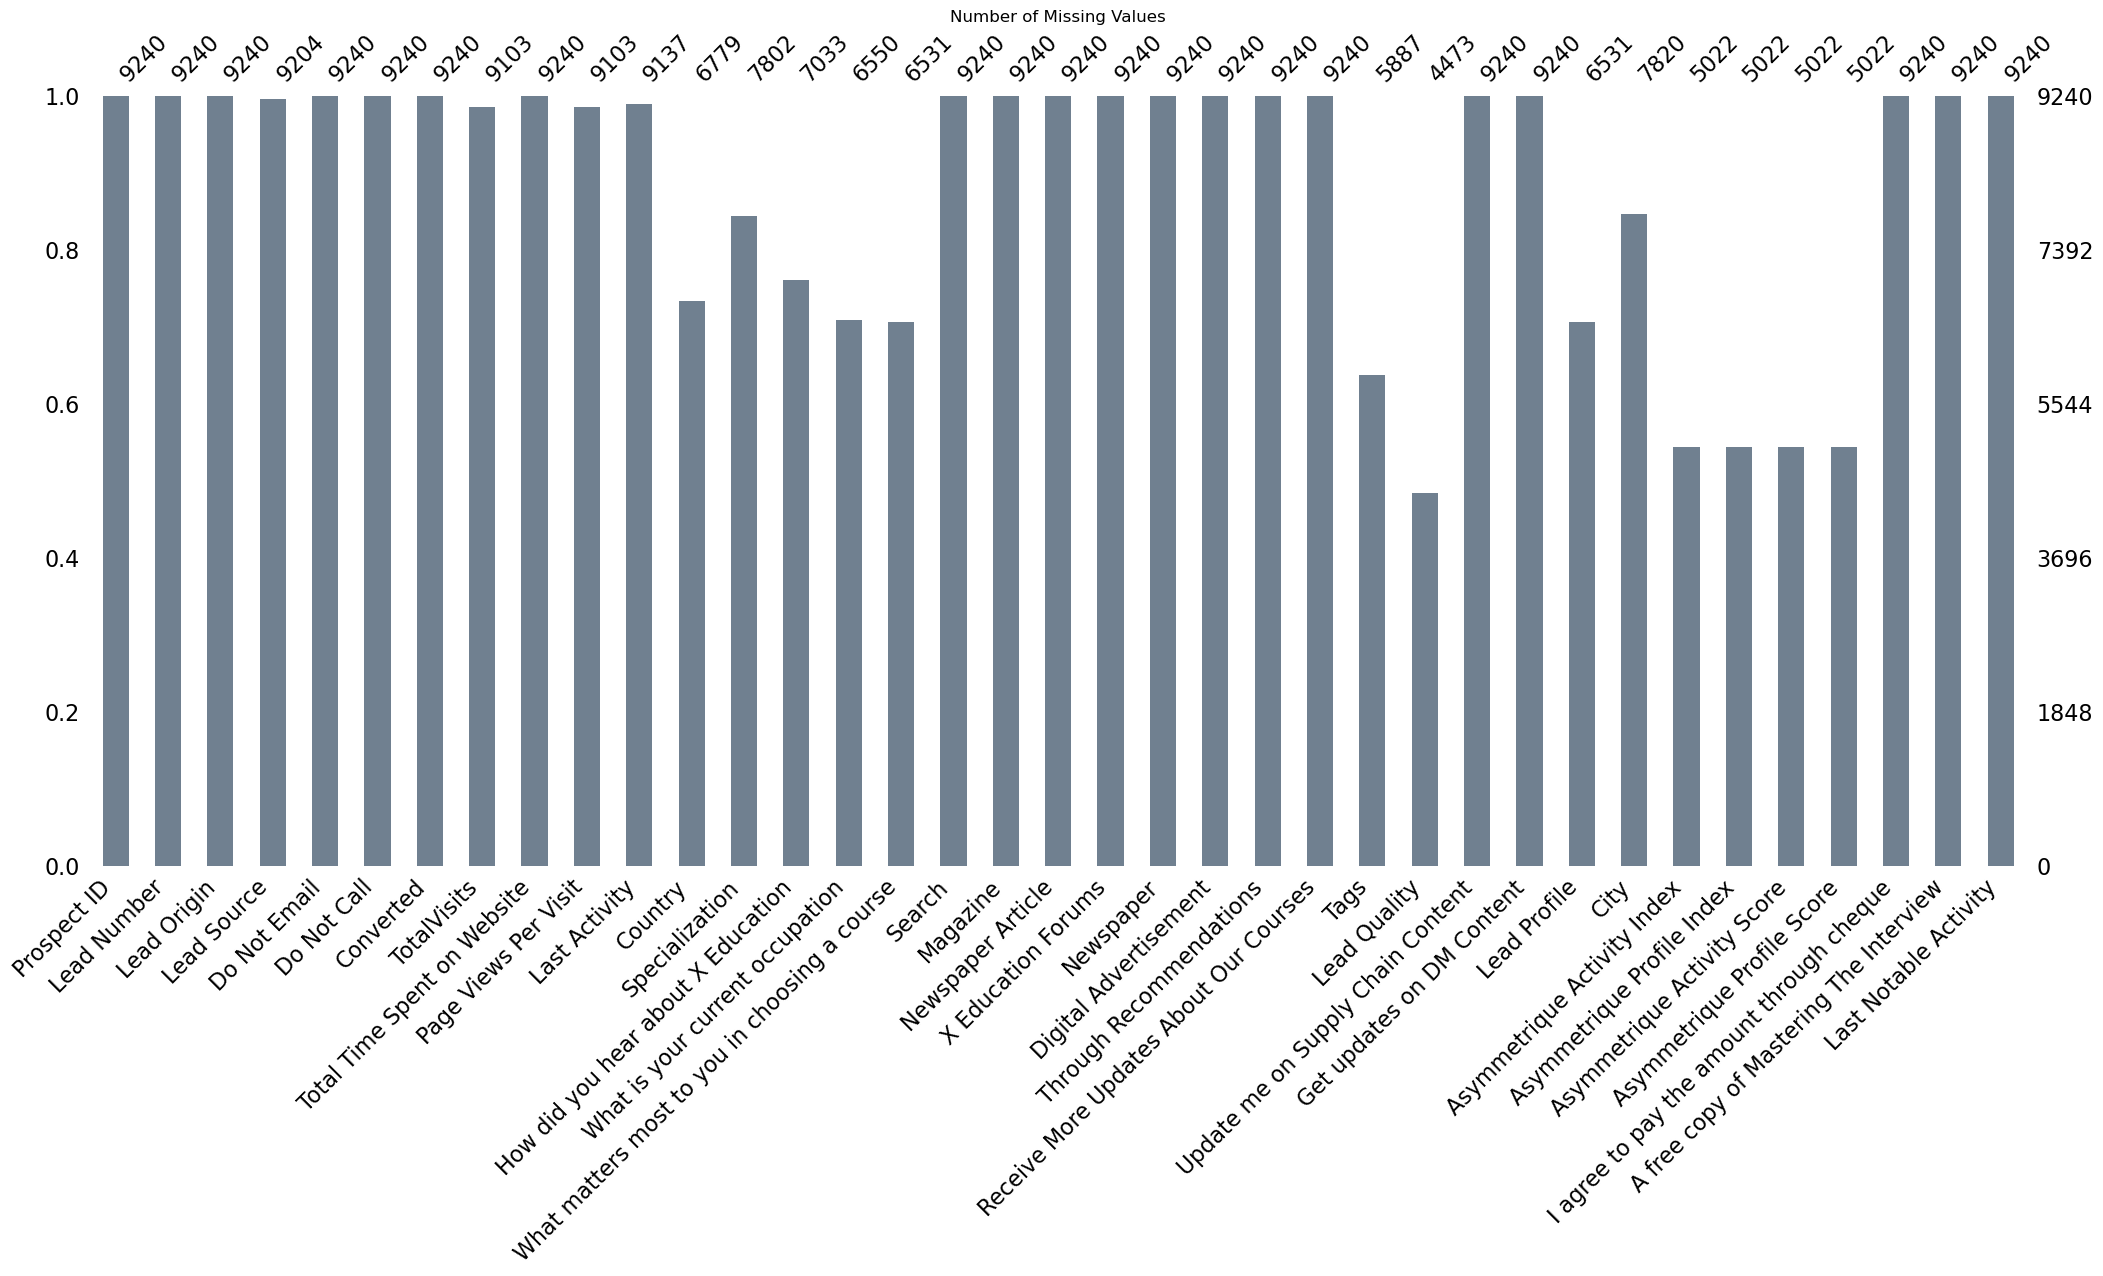

In [10]:
# Using missingno to determine any missing values and find out  
# any pattern if there are any missing values present in the dataset
plt.title("Number of Missing Values")
mn.bar(ld, color = 'slategrey')


<Axes: >

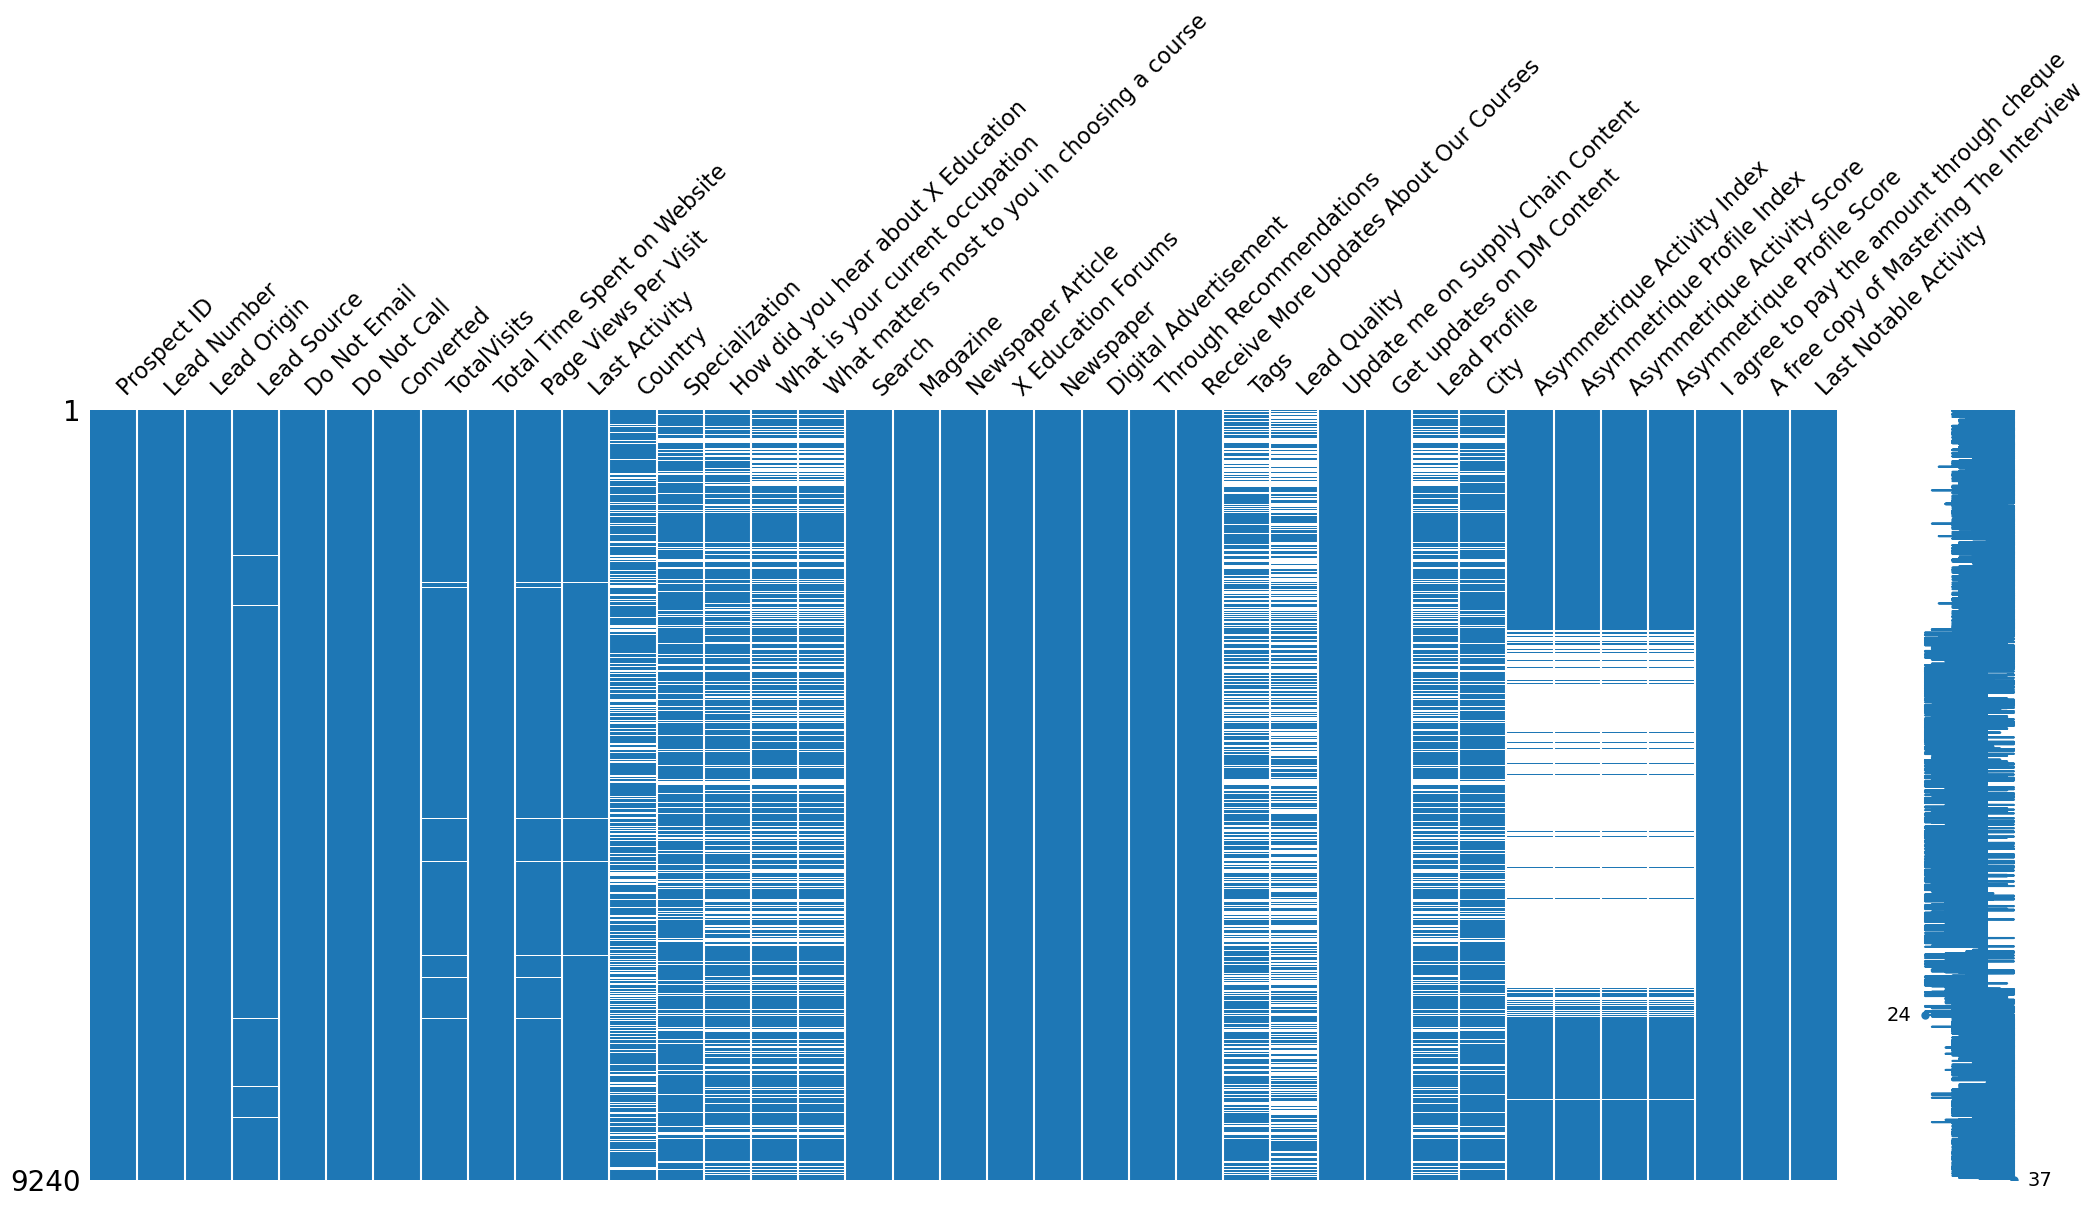

In [11]:
#Determining relations among variables using matrix and heatmap
mn.matrix(ld, color = (0.12, 0.47, 0.71))

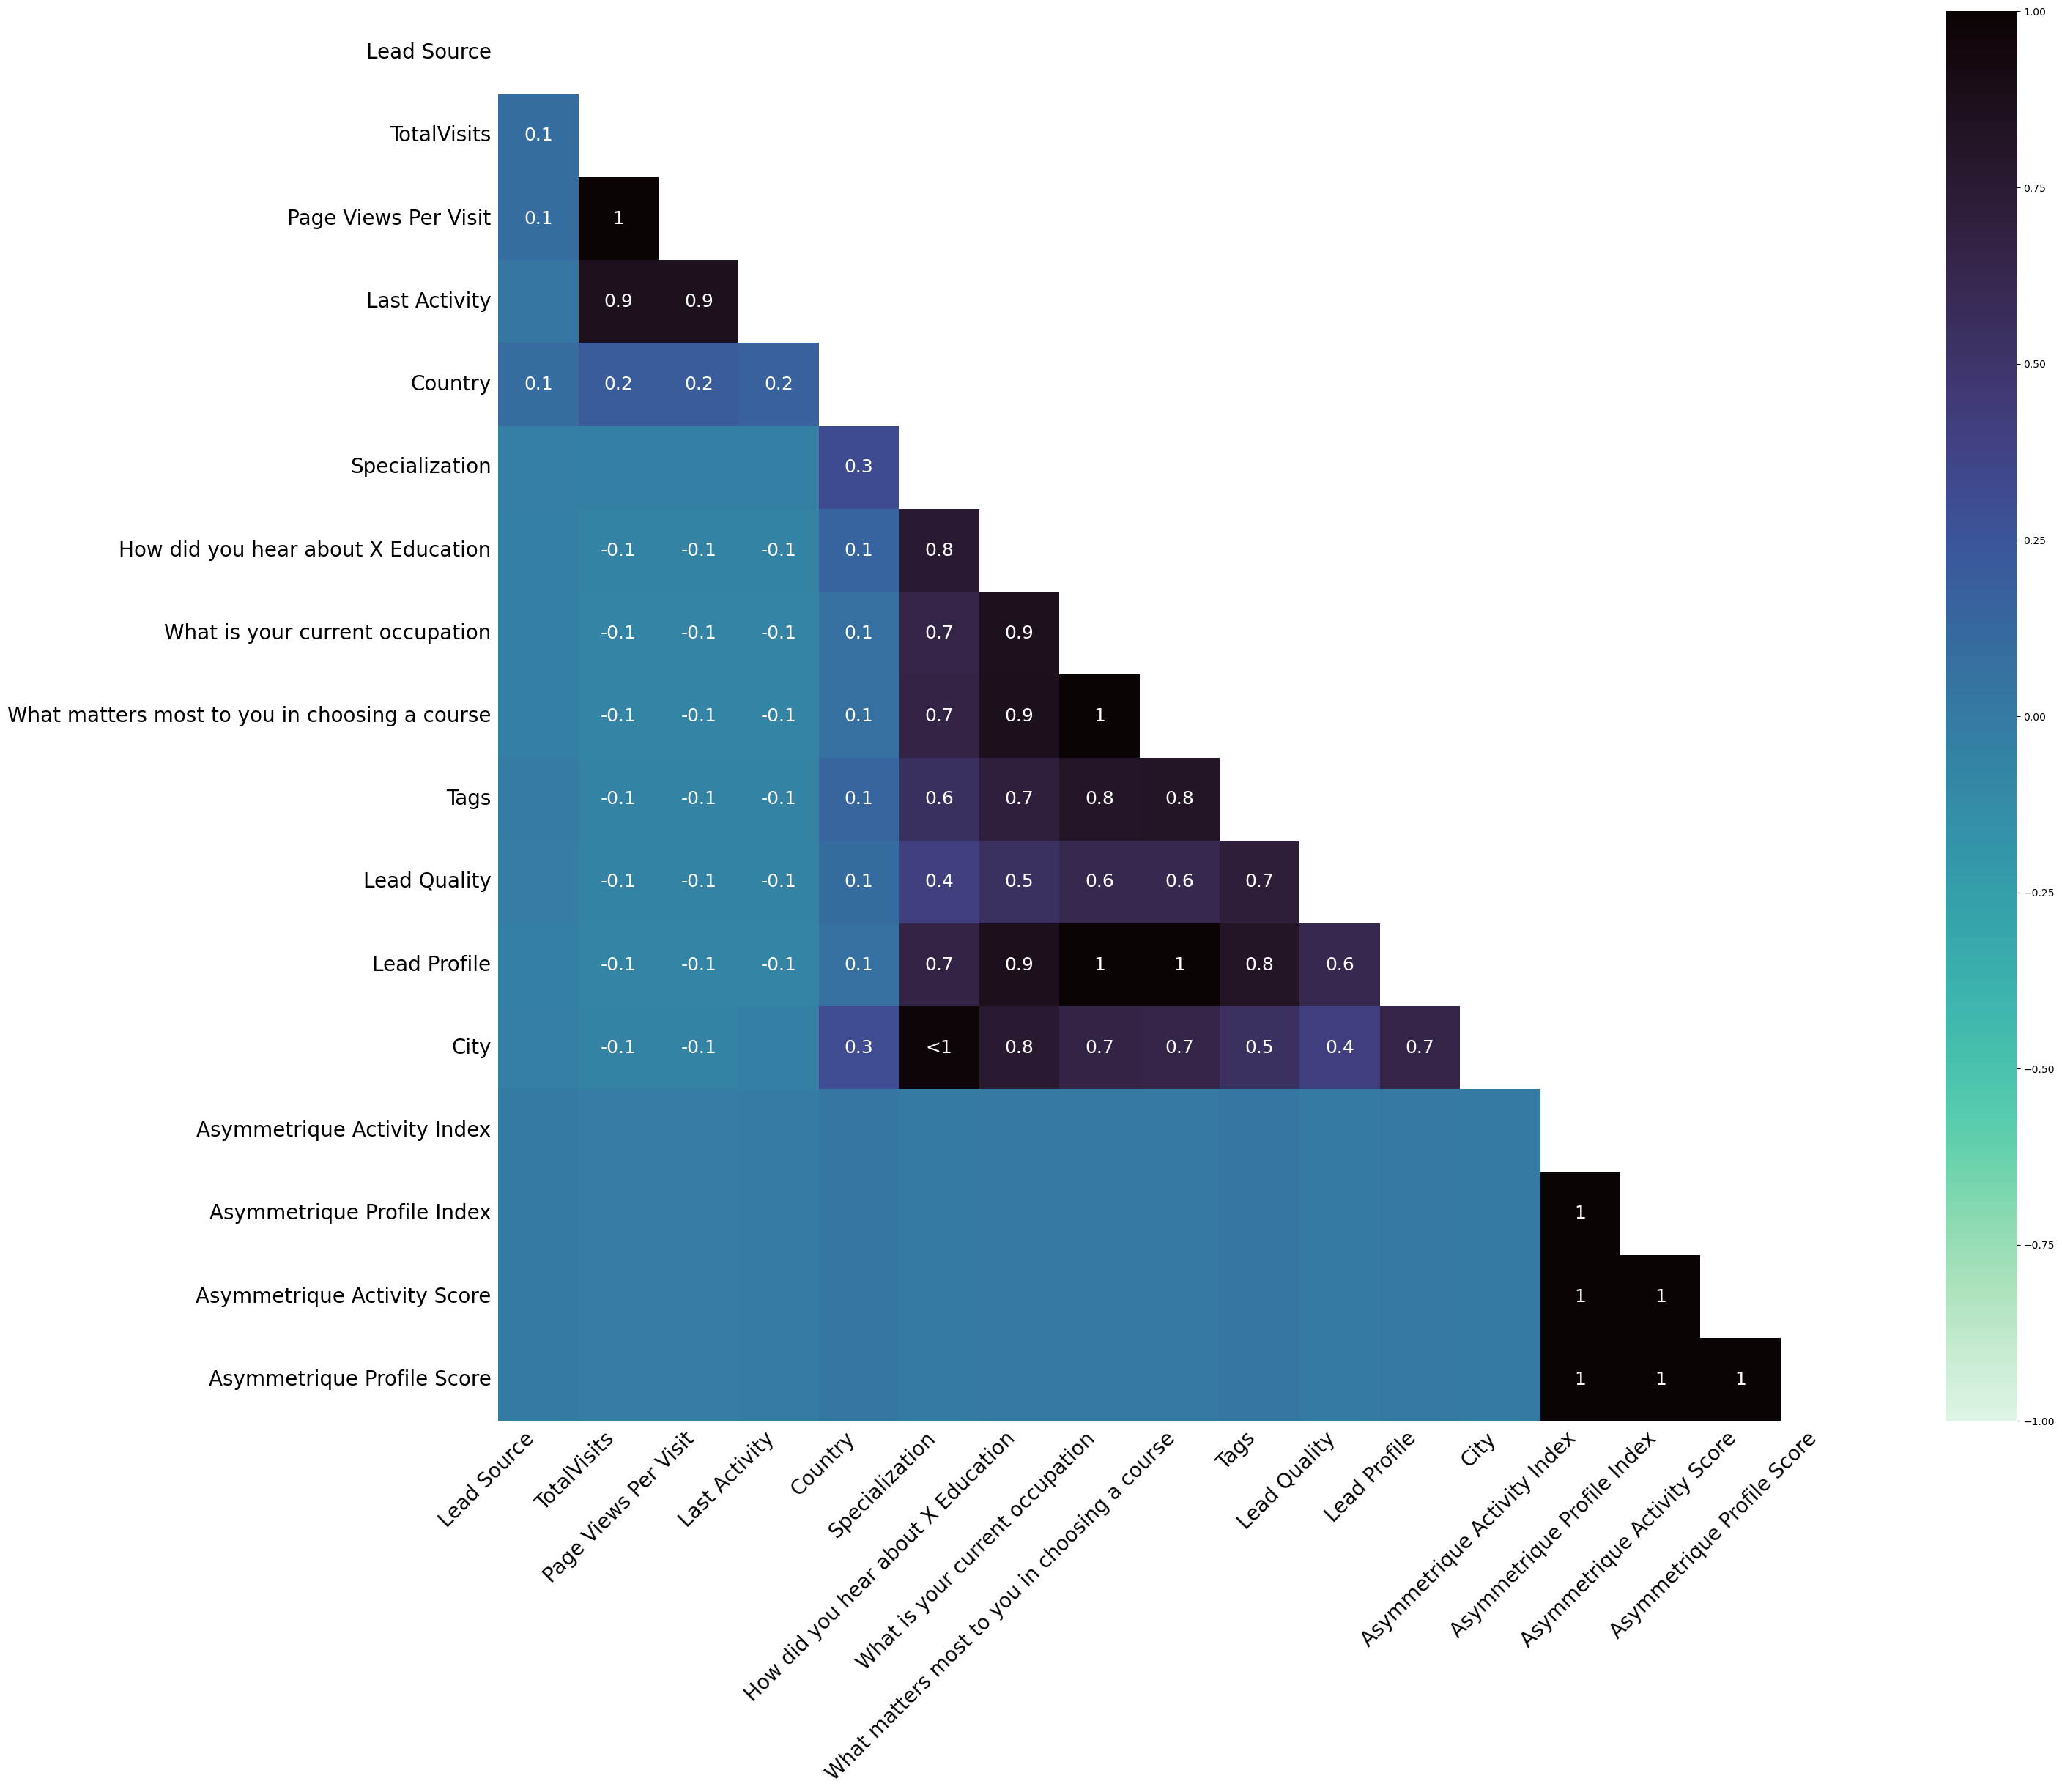

In [12]:
mn.heatmap(ld, cmap="mako_r", figsize=(30,25), fontsize=20);

Most of the columns with missing values are of categorical data type. It would be ideal to remove columns with more than 40% missing values.

### Handling 'Select' Values in Categorical Variables

In [13]:
# List of columns having 'Select' as value

sel_col = [col for col in ld.columns if len(ld[col].isin(['Select']).unique())>1]
print(sel_col)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [14]:
# Converting 'Select' values to NaN.
ld = ld.replace('Select', np.nan)

In [15]:
mv = pd.DataFrame({'Missing Percentage': ((ld.isna().mean())*100), '  Data Type': ld.dtypes})
sort_mv = mv.sort_values(by='Missing Percentage', ascending = False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(sort_mv) #Checking the percentage of null values in each column

                                               Missing Percentage   Data Type
How did you hear about X Education                      78.463203      object
Lead Profile                                            74.188312      object
Lead Quality                                            51.590909      object
Asymmetrique Profile Score                              45.649351     float64
Asymmetrique Activity Score                             45.649351     float64
Asymmetrique Activity Index                             45.649351      object
Asymmetrique Profile Index                              45.649351      object
City                                                    39.707792      object
Specialization                                          36.580087      object
Tags                                                    36.287879      object
What matters most to you in choosing a course           29.318182      object
What is your current occupation                         29.11255

### Assessing the Efficacy of Imputation and Interpolation for Columns with Over 40% Missing Values

In [16]:
#Checking for variables dtype
col = (ld.isna().mean())*100 
drop_col = col[col.values > 40] # Storing columns with more than 40% of missing columns
drop_col_1 = pd.DataFrame({'Missing Percentage': drop_col, '  Data Type': ld.dtypes[drop_col.index]})
sort_drop_col = drop_col_1.sort_values(by='Missing Percentage',ascending = False)
sort_drop_col

Missing Percentage   Data Type
How did you hear about X Education           78.463203      object
Lead Profile                                 74.188312      object
Lead Quality                                 51.590909      object
Asymmetrique Activity Index                  45.649351      object
Asymmetrique Profile Index                   45.649351      object
Asymmetrique Activity Score                  45.649351     float64
Asymmetrique Profile Score                   45.649351     float64

'Asymmetrique Activity Score' and 'Asymmetrique Profile Score' are the only variables with numerical data type. 'Asymmetrique Activity Index' and 'Asymmetrique Profile Index' are columns to maintain the index.

##### Asymmetrique Activity Score and Asymmetrique Profile Score

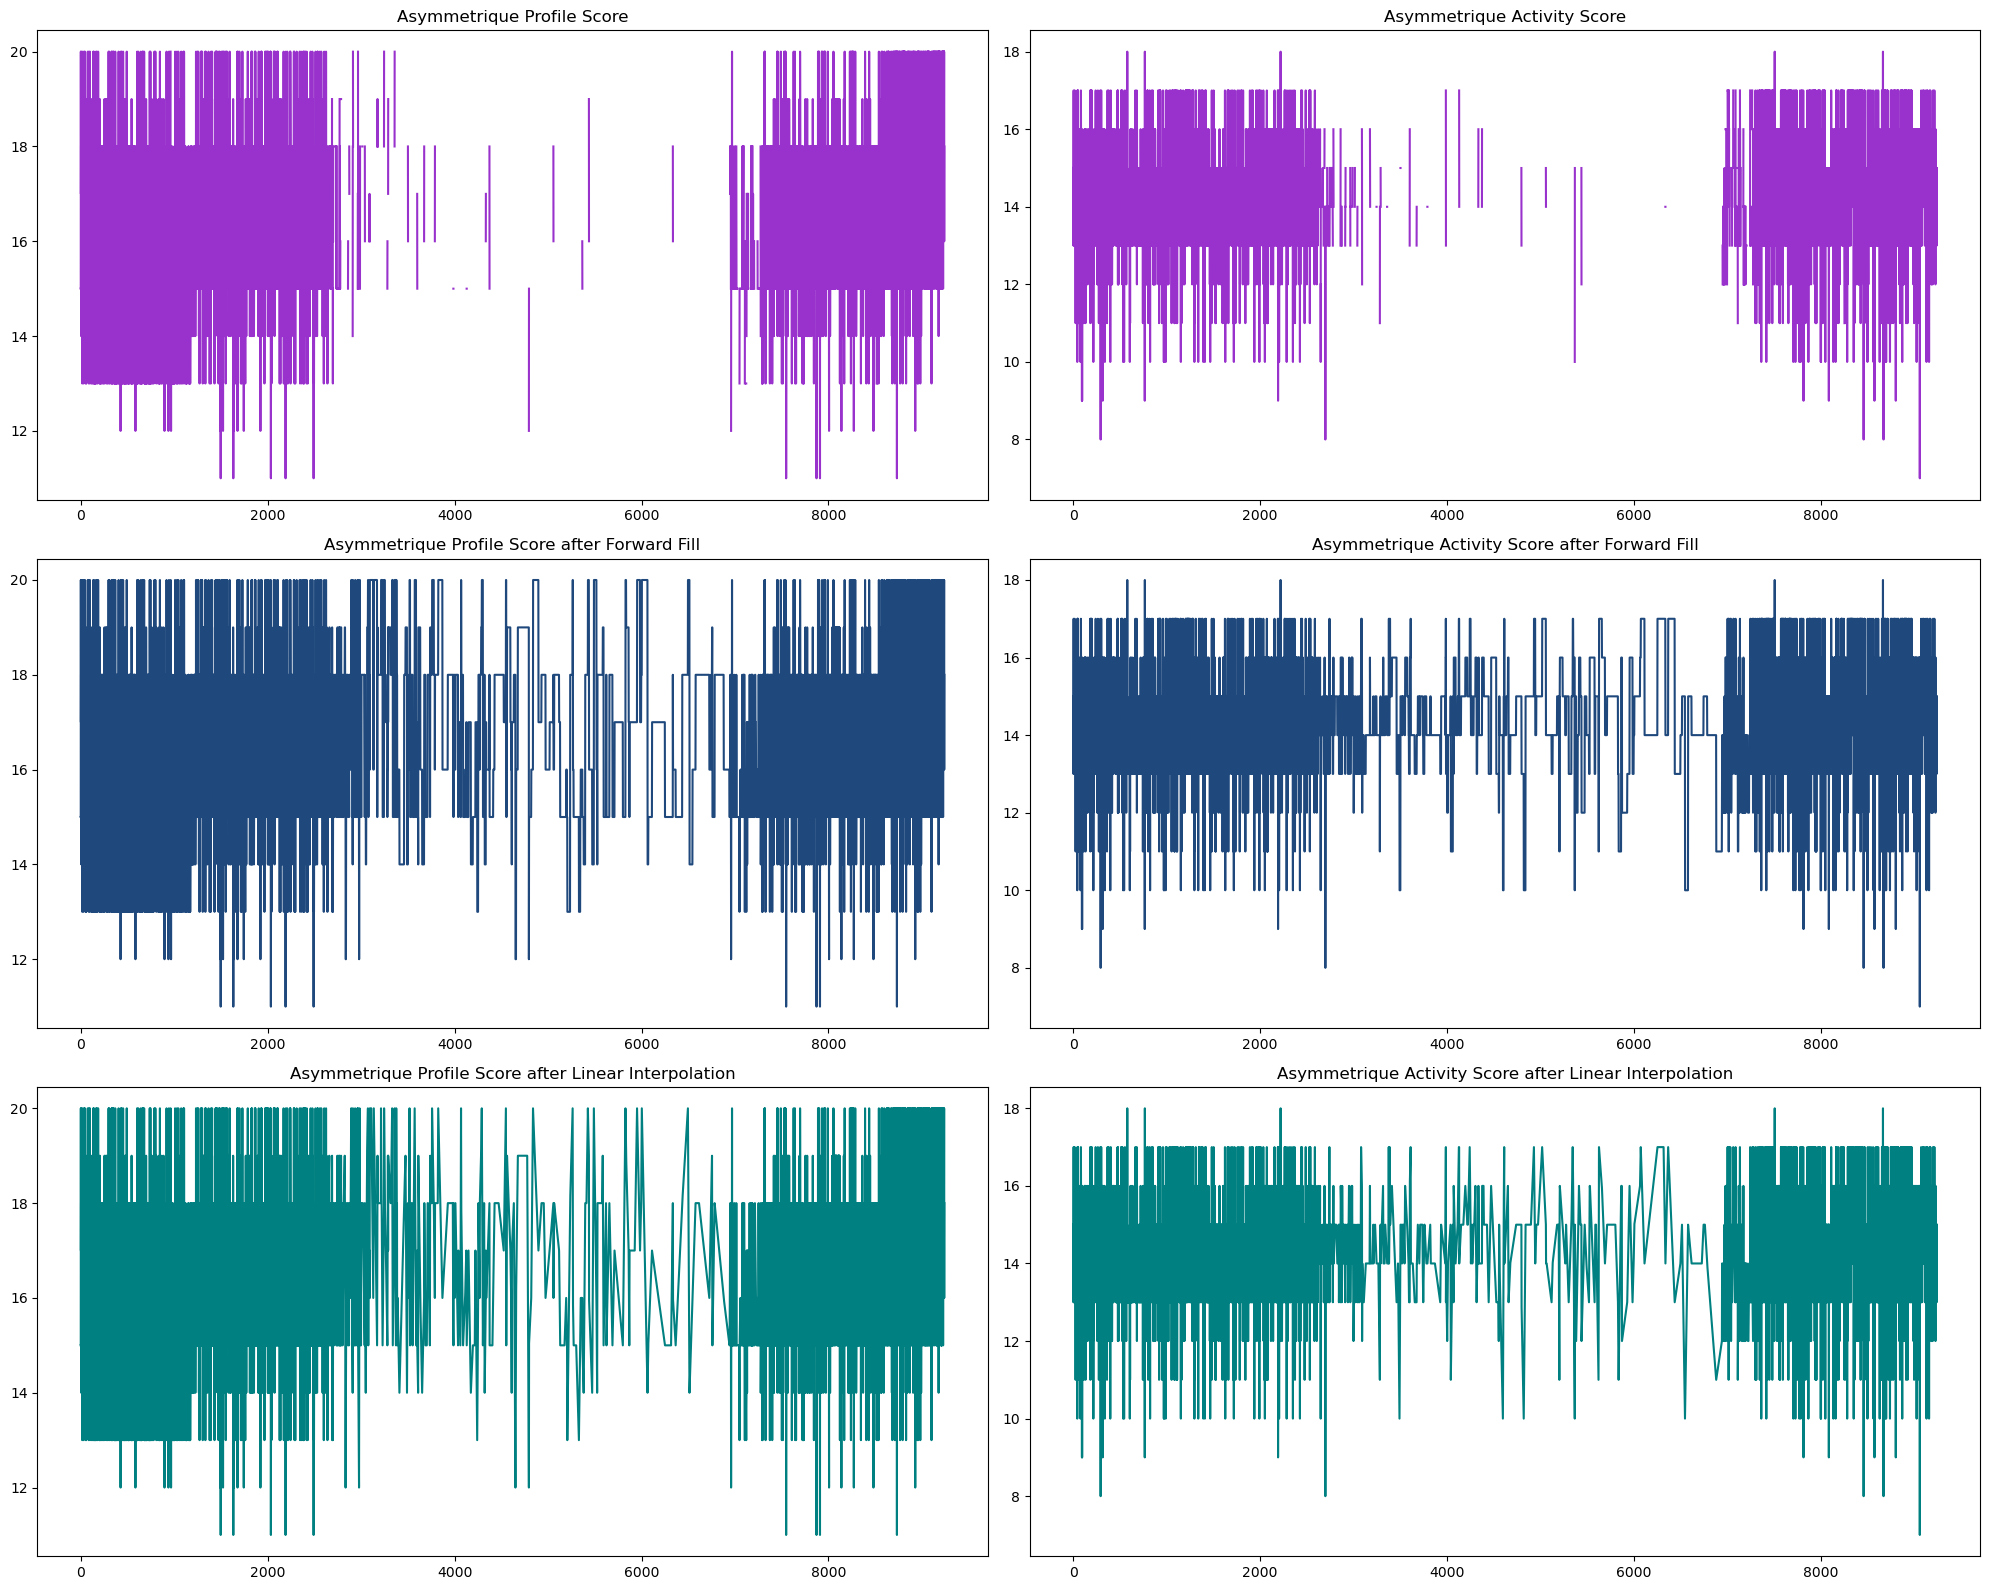

In [17]:
plt.figure(figsize=(20,16))
plt.subplot(321)
plt.title("Asymmetrique Profile Score")
plt.plot(ld["Asymmetrique Profile Score"], color = '#9932CC')
plt.subplot(322)
plt.title("Asymmetrique Activity Score")
plt.plot(ld["Asymmetrique Activity Score"], color = '#9932CC')
plt.subplot(323)
plt.title("Asymmetrique Profile Score after Forward Fill")
plt.plot(ld["Asymmetrique Profile Score"].fillna(method = 'ffill'), color = '#1f497d')
plt.subplot(324)
plt.title("Asymmetrique Activity Score after Forward Fill")
plt.plot(ld["Asymmetrique Activity Score"].fillna(method = 'ffill'), color = '#1f497d')
plt.subplot(325)
plt.title("Asymmetrique Profile Score after Linear Interpolation")
plt.plot(ld["Asymmetrique Profile Score"].interpolate(), color = '#008080')
plt.subplot(326)
plt.title("Asymmetrique Activity Score after Linear Interpolation")
plt.plot(ld["Asymmetrique Activity Score"].interpolate(), color = '#008080')
plt.tight_layout()

Imputing values in these columns is causing bias and distortion. This could distort the underlying patterns and relationships present in the original data, leading to misleading or inaccurate analysis.

##### How did you hear about X Education 

In [18]:
#Checking unique values in How did you hear about X Education 
vc = ld['How did you hear about X Education'].value_counts(dropna=False)

# Calculate percentages
prc = (vc / len(ld)) * 100

# Combine counts and percentages into a DataFrame
res = pd.DataFrame({'Counts': vc, 'Percentages': prc})

# Sort the DataFrame by counts in descending order
res = res.sort_values(by='Counts', ascending=False)
res

Counts  Percentages
NaN                      7250    78.463203
Online Search             808     8.744589
Word Of Mouth             348     3.766234
Student of SomeSchool     310     3.354978
Other                     186     2.012987
Multiple Sources          152     1.645022
Advertisements             70     0.757576
Social Media               67     0.725108
Email                      26     0.281385
SMS                        23     0.248918

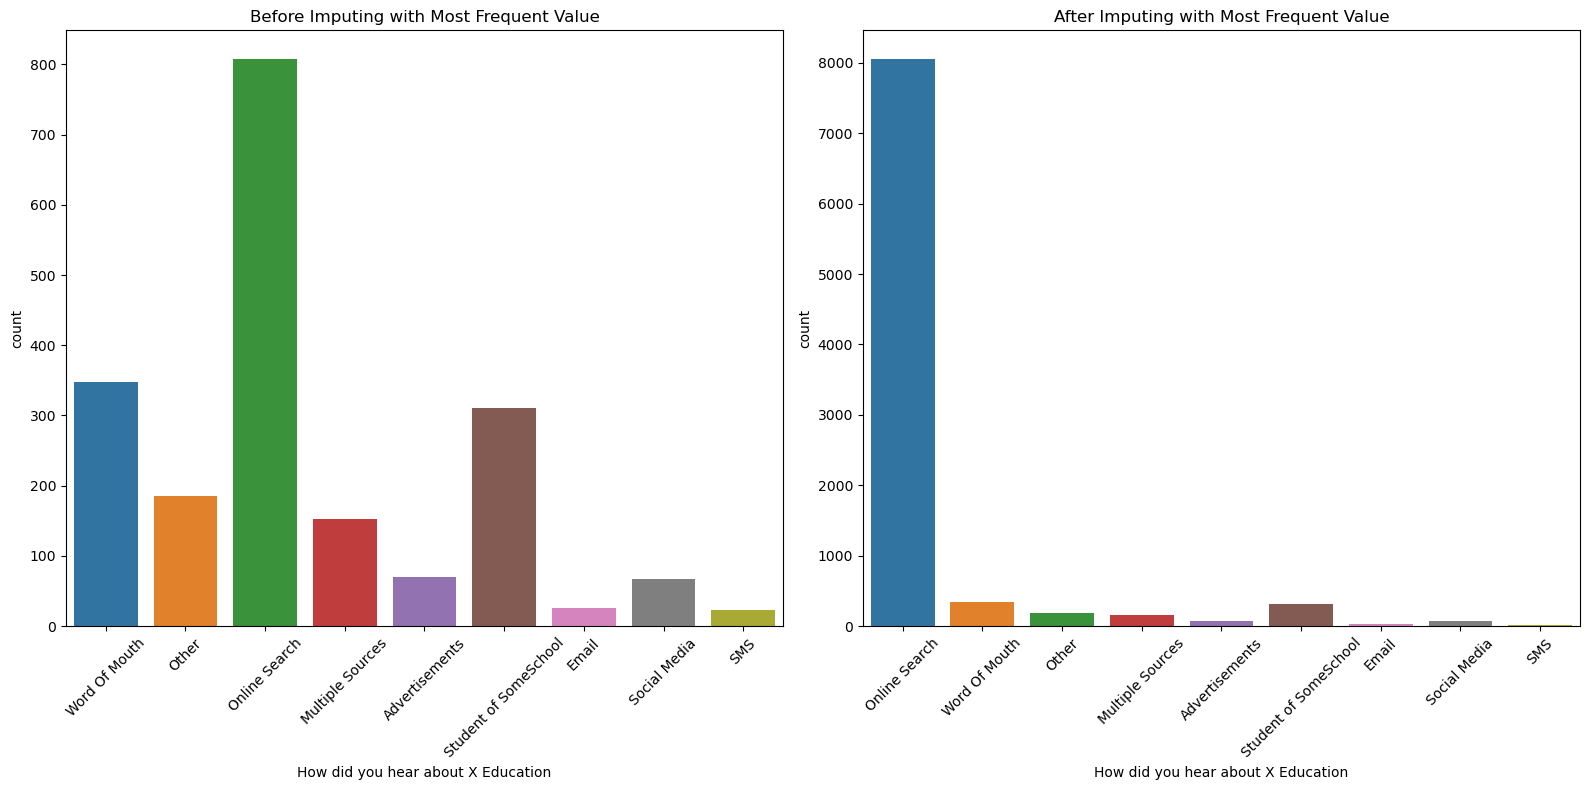

In [19]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.title("Before Imputing with Most Frequent Value")
sns.countplot(data = ld, x = 'How did you hear about X Education')
plt.xticks(rotation=45)
plt.subplot(122)
plt.title("After Imputing with Most Frequent Value")
sns.countplot(data = ld.fillna(value = ld['How did you hear about X Education'].mode()[0]),
              x = 'How did you hear about X Education')
plt.xticks(rotation=45)
plt.tight_layout()

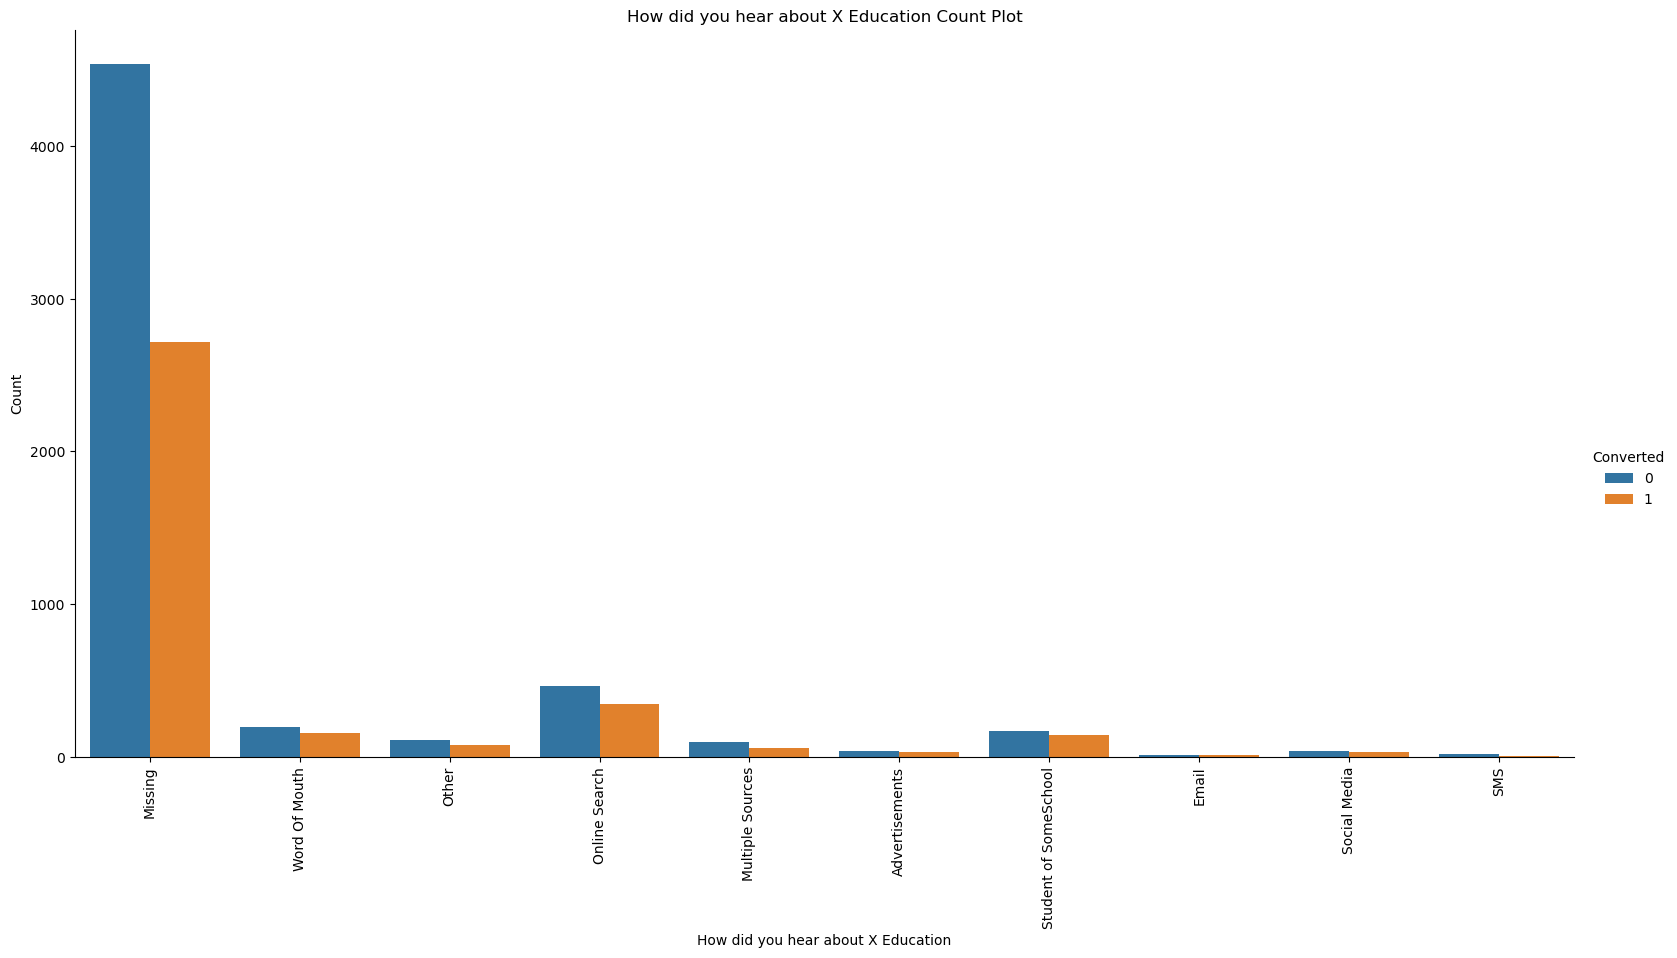

In [20]:
# Create a copy of the original DataFrame
ld_copy = ld.copy()

# Replace missing values (e.g., NaN) in the 'Lead Source' column with 'Missing'
ld_copy['How did you hear about X Education'].fillna('Missing', inplace=True)

sns.catplot(data=ld_copy, x='How did you hear about X Education', kind='count', hue = 'Converted',
            aspect = 2, height=8).set(title = 'How did you hear about X Education Count Plot')
plt.xticks(rotation=90)
plt.xlabel('How did you hear about X Education')
plt.ylabel('Count')
plt.show()

If imputed with mode, 'How did you hear about X Education' is creating a bias which disregards any underlying patterns or relationships that might exist within the data.

##### Lead Profile

In [21]:
#Checking unique values in Lead Profile
vc = ld["Lead Profile"].value_counts(dropna=False)
prc = (vc / len(ld)) * 100
res = pd.DataFrame({'Counts': vc, 'Percentages': prc})
res = res.sort_values(by='Counts', ascending=False)
res

Counts  Percentages
NaN                            6855    74.188312
Potential Lead                 1613    17.456710
Other Leads                     487     5.270563
Student of SomeSchool           241     2.608225
Lateral Student                  24     0.259740
Dual Specialization Student      20     0.216450

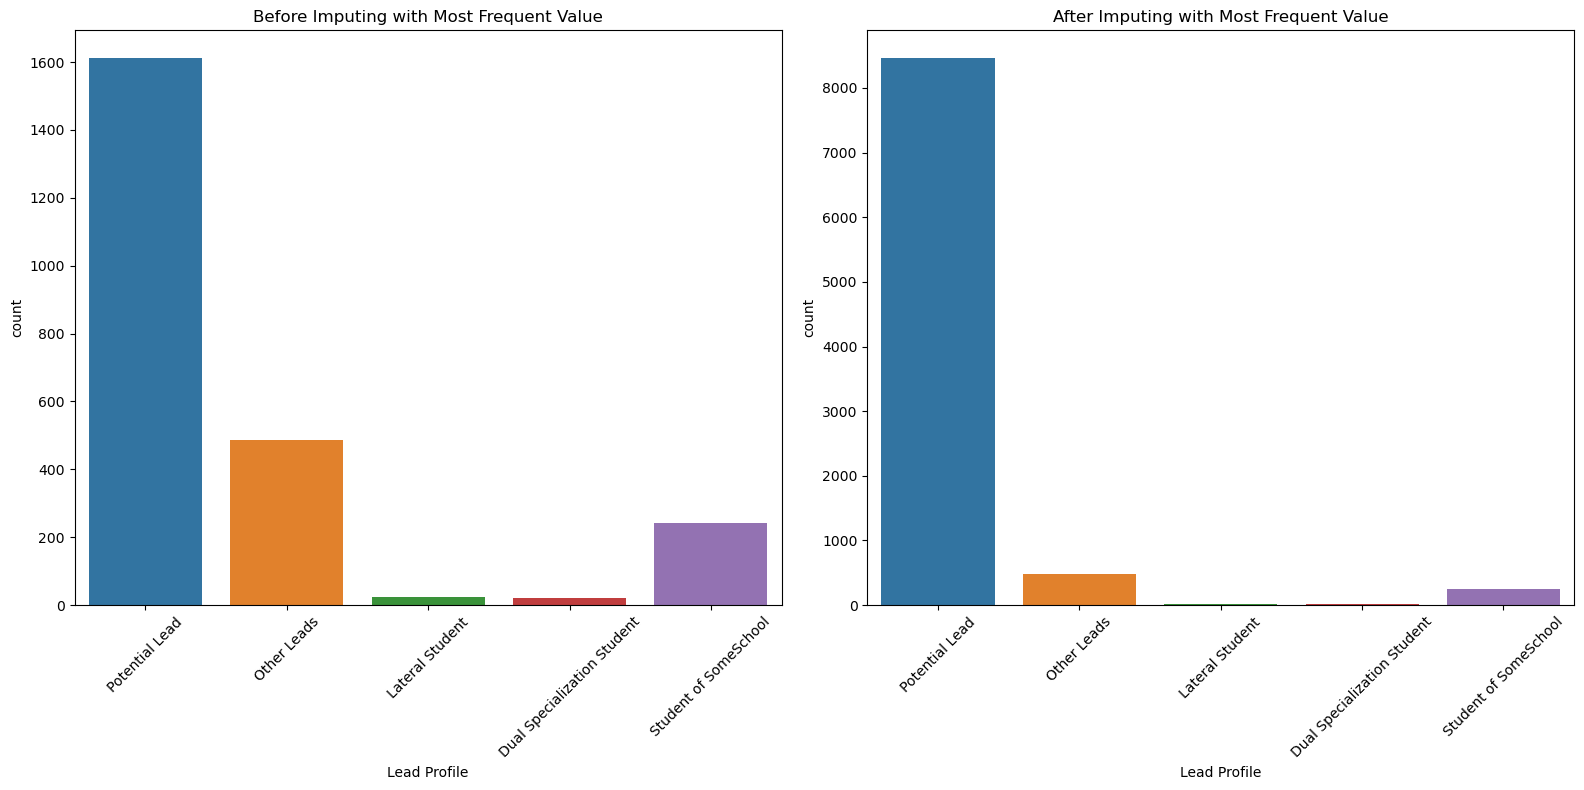

In [22]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.title("Before Imputing with Most Frequent Value")
sns.countplot(data = ld, x = 'Lead Profile')
plt.xticks(rotation=45)
plt.subplot(122)
plt.title("After Imputing with Most Frequent Value")
sns.countplot(data = ld.fillna(value = ld['Lead Profile'].mode()[0]), x = 'Lead Profile')
plt.xticks(rotation=45)
plt.tight_layout()

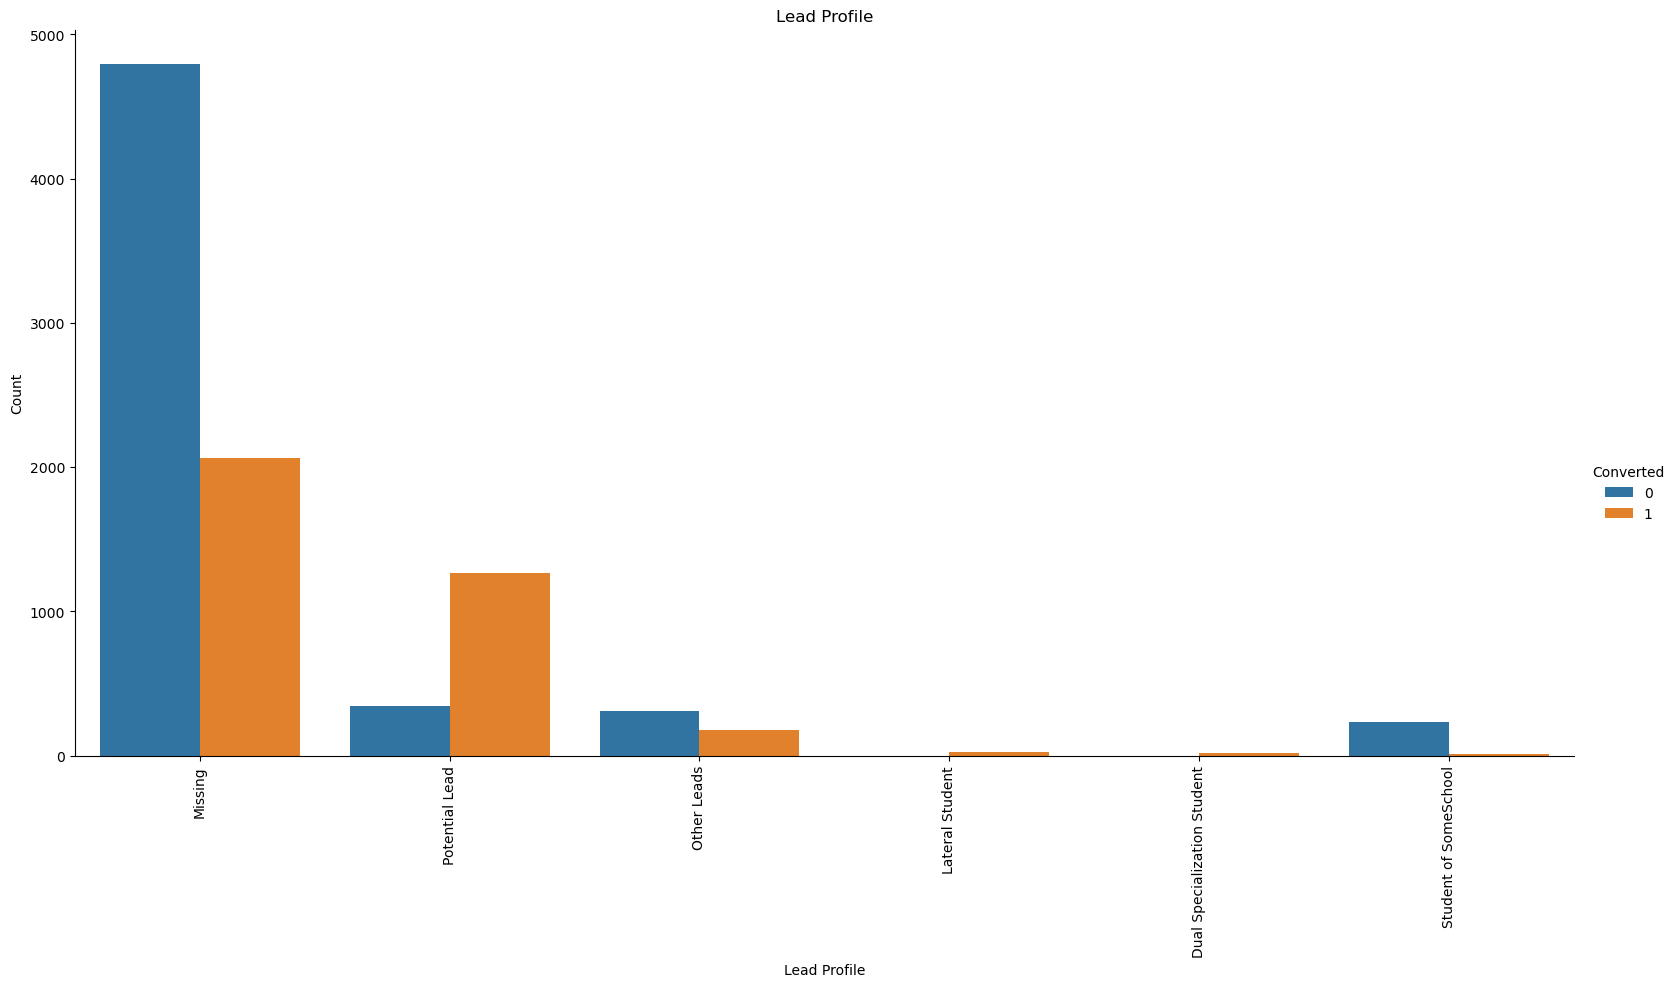

In [23]:
ld_copy = ld.copy()
ld_copy['Lead Profile'].fillna('Missing', inplace=True)
sns.catplot(data=ld_copy, x='Lead Profile', kind='count', hue = 'Converted', aspect = 2, height=8).set(title = 'Lead Profile')
plt.xticks(rotation=90)
plt.xlabel('Lead Profile')
plt.ylabel('Count')
plt.show()

Imputing 'Lead Profile' with mode is creating an imbalance in the data which disregards any underlying patterns or relationships that might exist within the data.


##### Lead Quality

In [24]:
#Checking unique values in Lead Quality
vc = ld["Lead Quality"].value_counts(dropna=False)
prc = (vc / len(ld)) * 100
res = pd.DataFrame({'Counts': vc, 'Percentages': prc})
res = res.sort_values(by='Counts', ascending=False)
res

Counts  Percentages
NaN                  4767    51.590909
Might be             1560    16.883117
Not Sure             1092    11.818182
High in Relevance     637     6.893939
Worst                 601     6.504329
Low in Relevance      583     6.309524

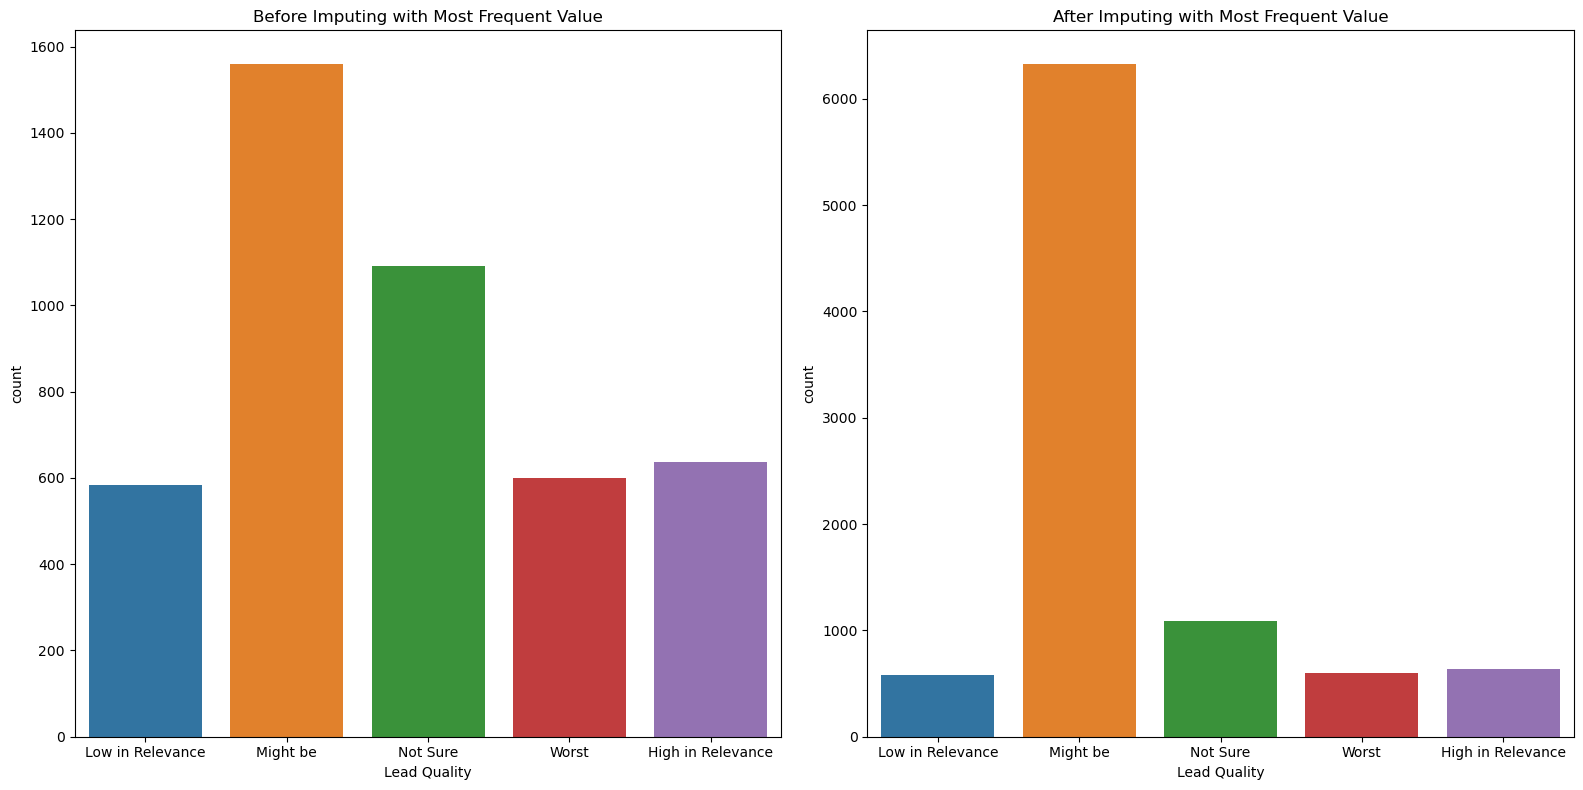

In [25]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.title("Before Imputing with Most Frequent Value")
sns.countplot(data = ld, x = 'Lead Quality')
plt.subplot(122)
plt.title("After Imputing with Most Frequent Value")
sns.countplot(data = ld.fillna(value = ld['Lead Quality'].mode()[0]), x = 'Lead Quality')
plt.tight_layout()

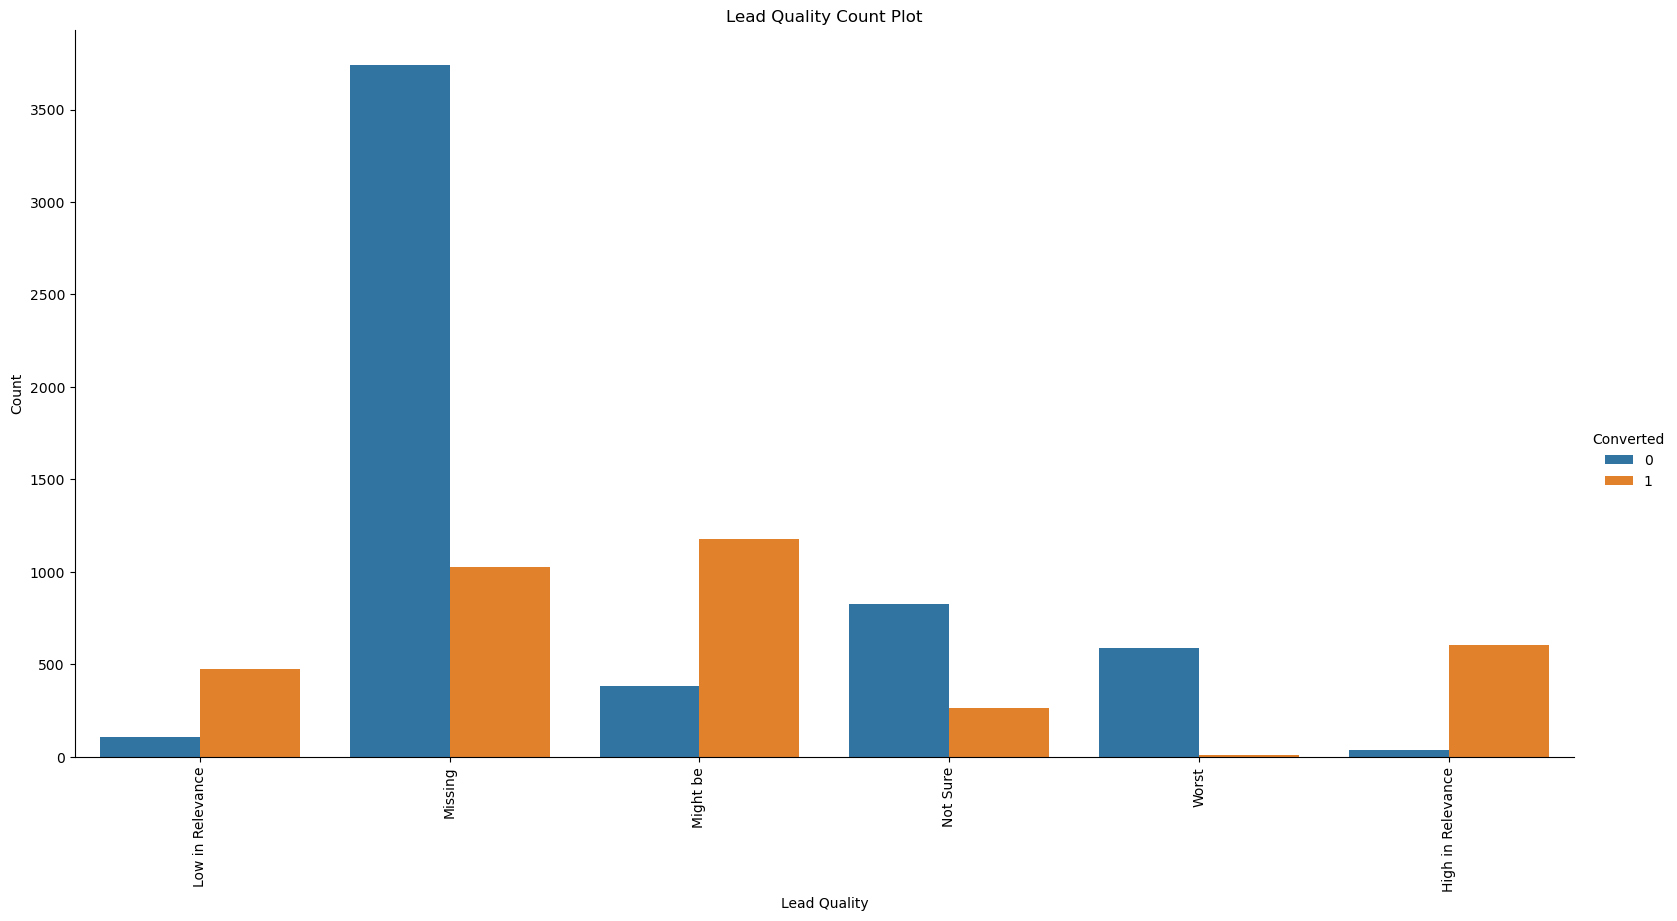

In [26]:
ld_copy = ld.copy()
ld_copy['Lead Quality'].fillna('Missing', inplace=True)
sns.catplot(data=ld_copy, x='Lead Quality', kind='count', hue = 'Converted',
            aspect = 2, height=8).set(title = 'Lead Quality Count Plot')
plt.xticks(rotation=90)
plt.xlabel('Lead Quality')
plt.ylabel('Count')
plt.show()

Imputing 'Lead Quality' with mode is creating an imbalance in the data which disregards any underlying patterns or relationships that might exist within the data.

### Dropping columns having missing values more than 40%

In [27]:
ld.drop(columns = drop_col.index, inplace = True) # Dropping the said columns

In [28]:
ld.shape

(9240, 30)

### Categorical variable Analysis of columns with Missing Values

In [29]:
print((ld.isna().mean()*100).sort_values(ascending = False)) #Checking the percentage of null values in each column

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

##### City

In [30]:
vc = ld['City'].value_counts(dropna=False)
prc = (vc / len(ld)) * 100
res = pd.DataFrame({'Counts': vc, 'Percentages': prc})
res = res.sort_values(by='Counts', ascending=False)
res

Counts  Percentages
NaN                            3669    39.707792
Mumbai                         3222    34.870130
Thane & Outskirts               752     8.138528
Other Cities                    686     7.424242
Other Cities of Maharashtra     457     4.945887
Other Metro Cities              380     4.112554
Tier II Cities                   74     0.800866

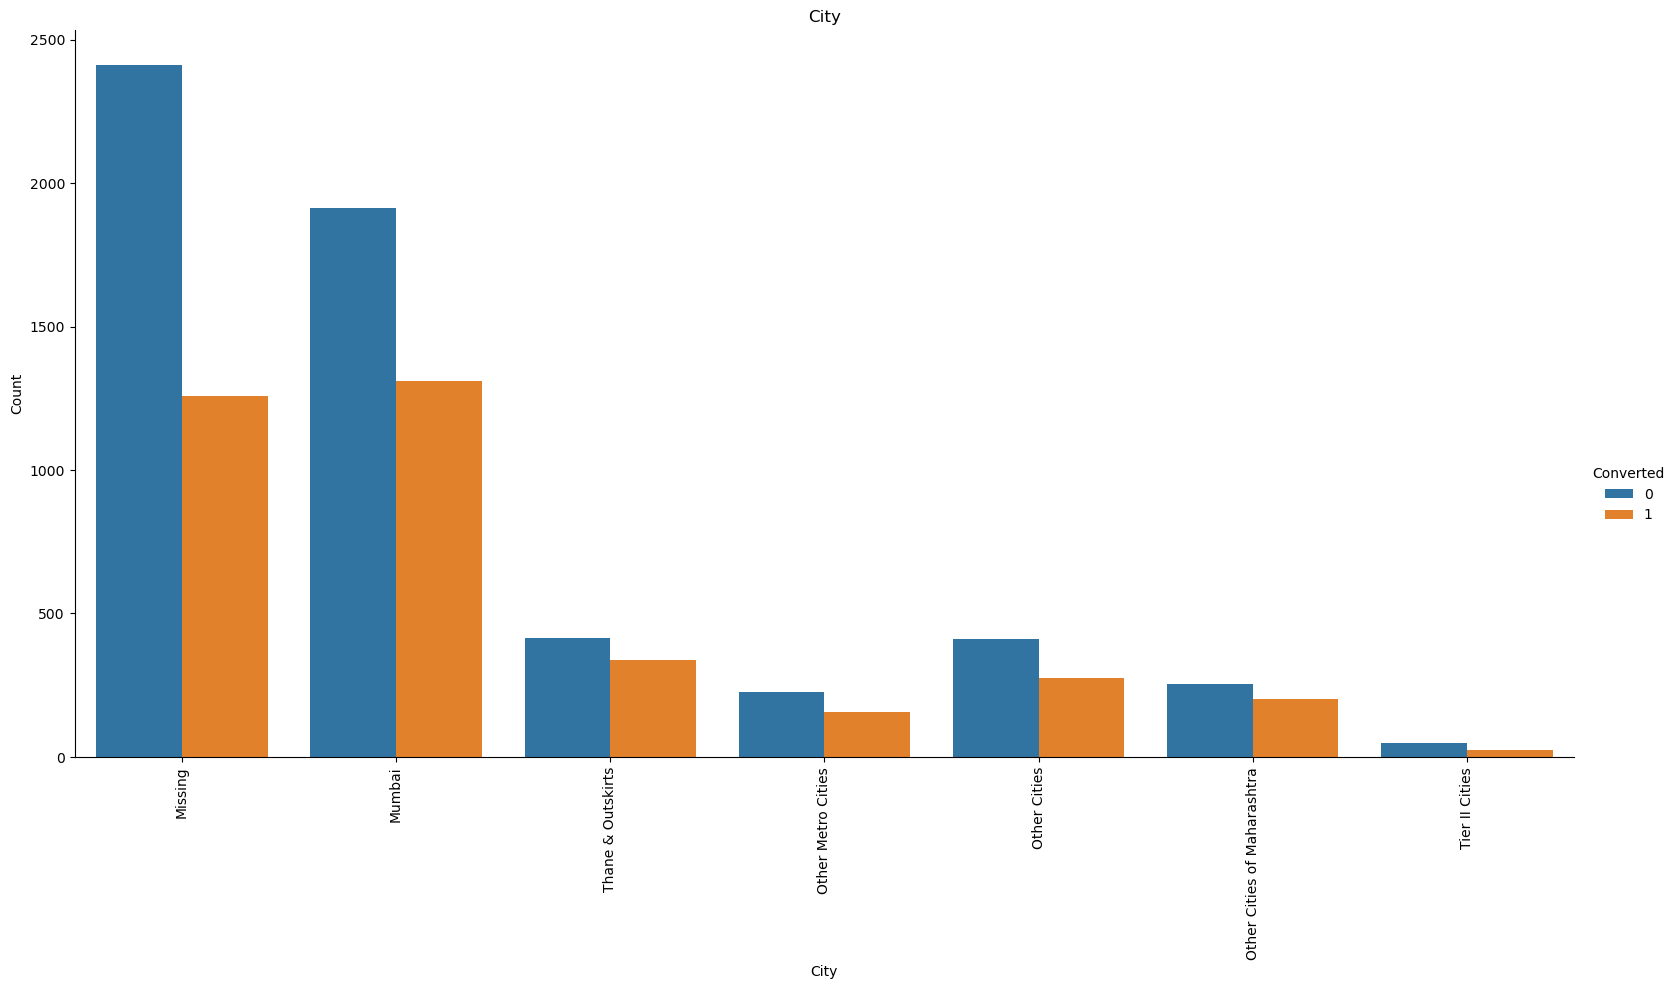

In [31]:
ld_copy = ld.copy()
ld_copy['City'].fillna('Missing', inplace=True)
sns.catplot(data=ld_copy, x='City', kind='count', hue = 'Converted',
            aspect = 2, height=8).set(title = 'City')
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

If imputed with mode i.e. Mumbai, 75% of the values will belong to Mumbai which will create bias in the analysis. Hence, it's better to drop this column.

##### Specialization

In [32]:
vc = ld['Specialization'].value_counts(dropna=False)
prc = (vc / len(ld)) * 100
res = pd.DataFrame({'Counts': vc, 'Percentages': prc})
res = res.sort_values(by='Counts', ascending=False)
res

Counts  Percentages
NaN                                  3380    36.580087
Finance Management                    976    10.562771
Human Resource Management             848     9.177489
Marketing Management                  838     9.069264
Operations Management                 503     5.443723
Business Administration               403     4.361472
IT Projects Management                366     3.961039
Supply Chain Management               349     3.777056
Banking, Investment And Insurance     338     3.658009
Media and Advertising                 203     2.196970
Travel and Tourism                    203     2.196970
International Business                178     1.926407
Healthcare Management                 159     1.720779
Hospitality Management                114     1.233766
E-COMMERCE                            112     1.212121
Retail Management                     100     1.082251
Rural and Agribusiness                 73     0.790043
E-Business                             57     0.616883
Services Excellence                    40     0.432900

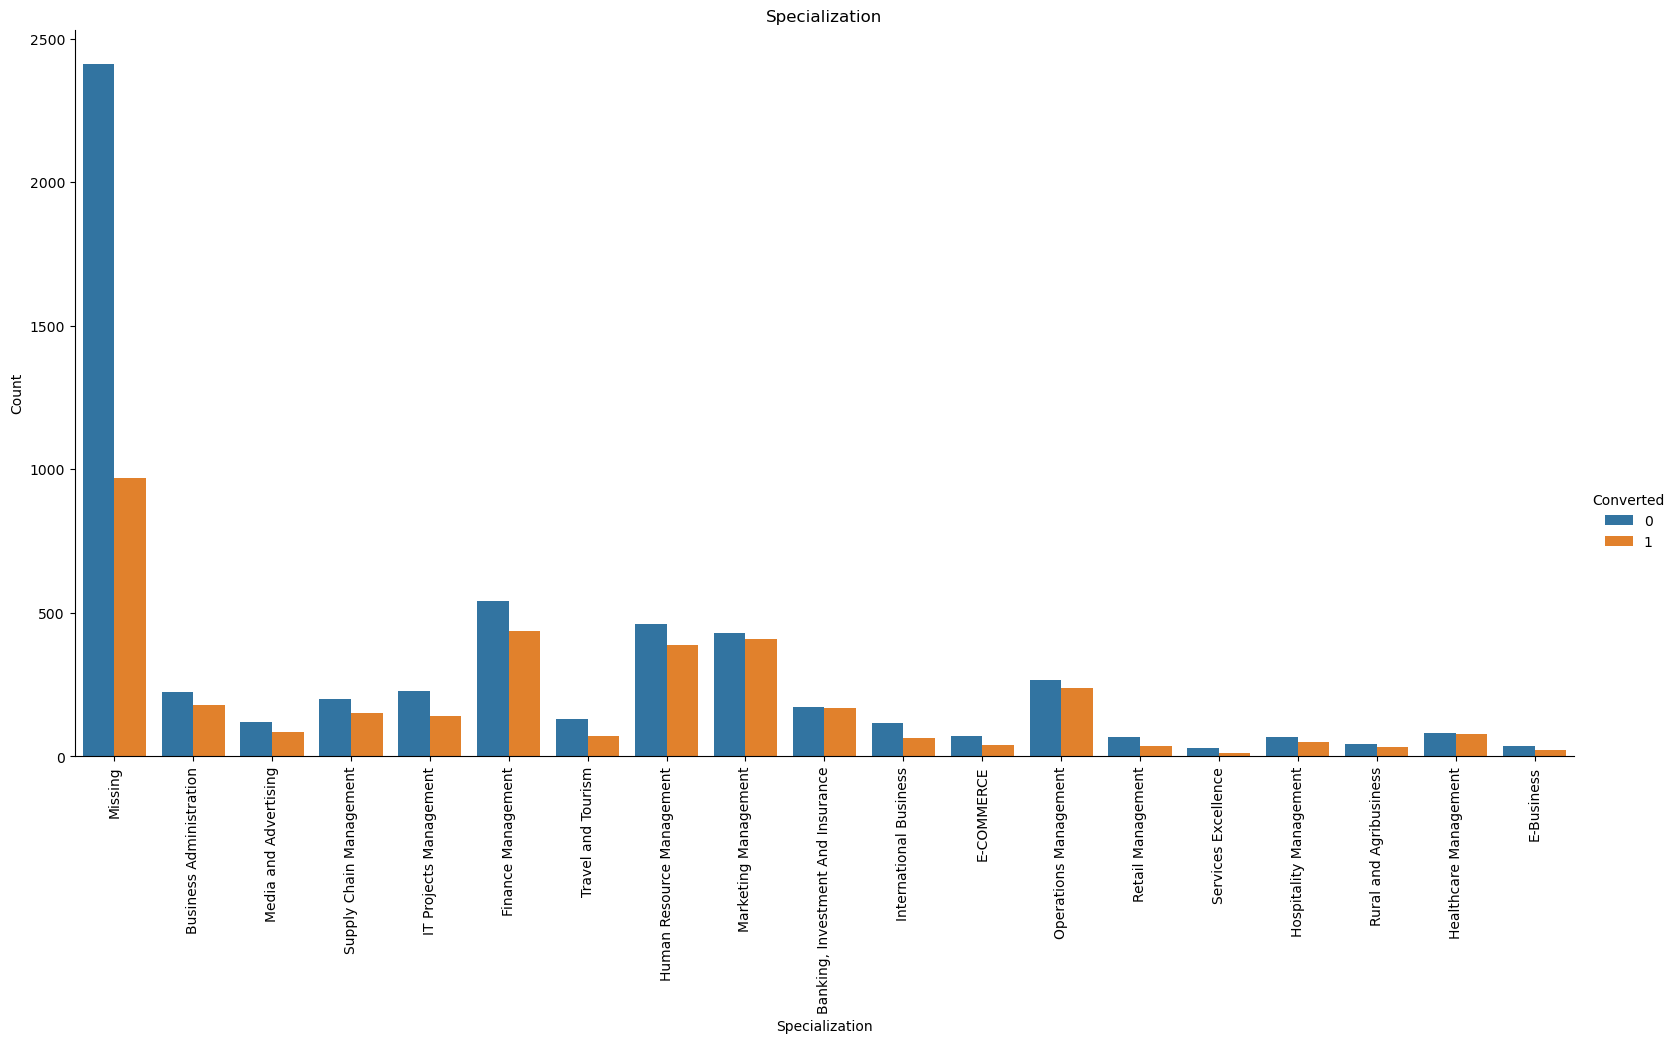

In [33]:
ld_copy = ld.copy()
ld_copy['Specialization'].fillna('Missing', inplace=True)
sns.catplot(data=ld_copy, x='Specialization', kind='count', hue = 'Converted',
            aspect = 2, height=8).set(title = 'Specialization')
plt.xticks(rotation=90)
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.show()

Combining Management Specializations as they have similar trends.

In [34]:
ld['Specialization'] = ld['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

As the distribution is even, the missing values will be assigned to 'Not Specified'.

##### Tags

In [35]:
vc = ld["Tags"].value_counts(dropna=False)
prc = (vc / len(ld)) * 100
res = pd.DataFrame({'Counts': vc, 'Percentages': prc})
res = res.sort_values(by='Counts', ascending=False)
res

Counts  Percentages
NaN                                                  3353    36.287879
Will revert after reading the email                  2072    22.424242
Ringing                                              1203    13.019481
Interested in other courses                           513     5.551948
Already a student                                     465     5.032468
Closed by Horizzon                                    358     3.874459
switched off                                          240     2.597403
Busy                                                  186     2.012987
Lost to EINS                                          175     1.893939
Not doing further education                           145     1.569264
Interested  in full time MBA                          117     1.266234
Graduation in progress                                111     1.201299
invalid number                                         83     0.898268
Diploma holder (Not Eligible)                          63     0.681818
wrong number given                                     47     0.508658
opp hangup                                             33     0.357143
number not provided                                    27     0.292208
in touch with EINS                                     12     0.129870
Lost to Others                                          7     0.075758
Still Thinking                                          6     0.064935
Want to take admission but has financial problems       6     0.064935
In confusion whether part time or DLP                   5     0.054113
Interested in Next batch                                5     0.054113
Lateral student                                         3     0.032468
Shall take in the next coming month                     2     0.021645
University not recognized                               2     0.021645
Recognition issue (DEC approval)                        1     0.010823

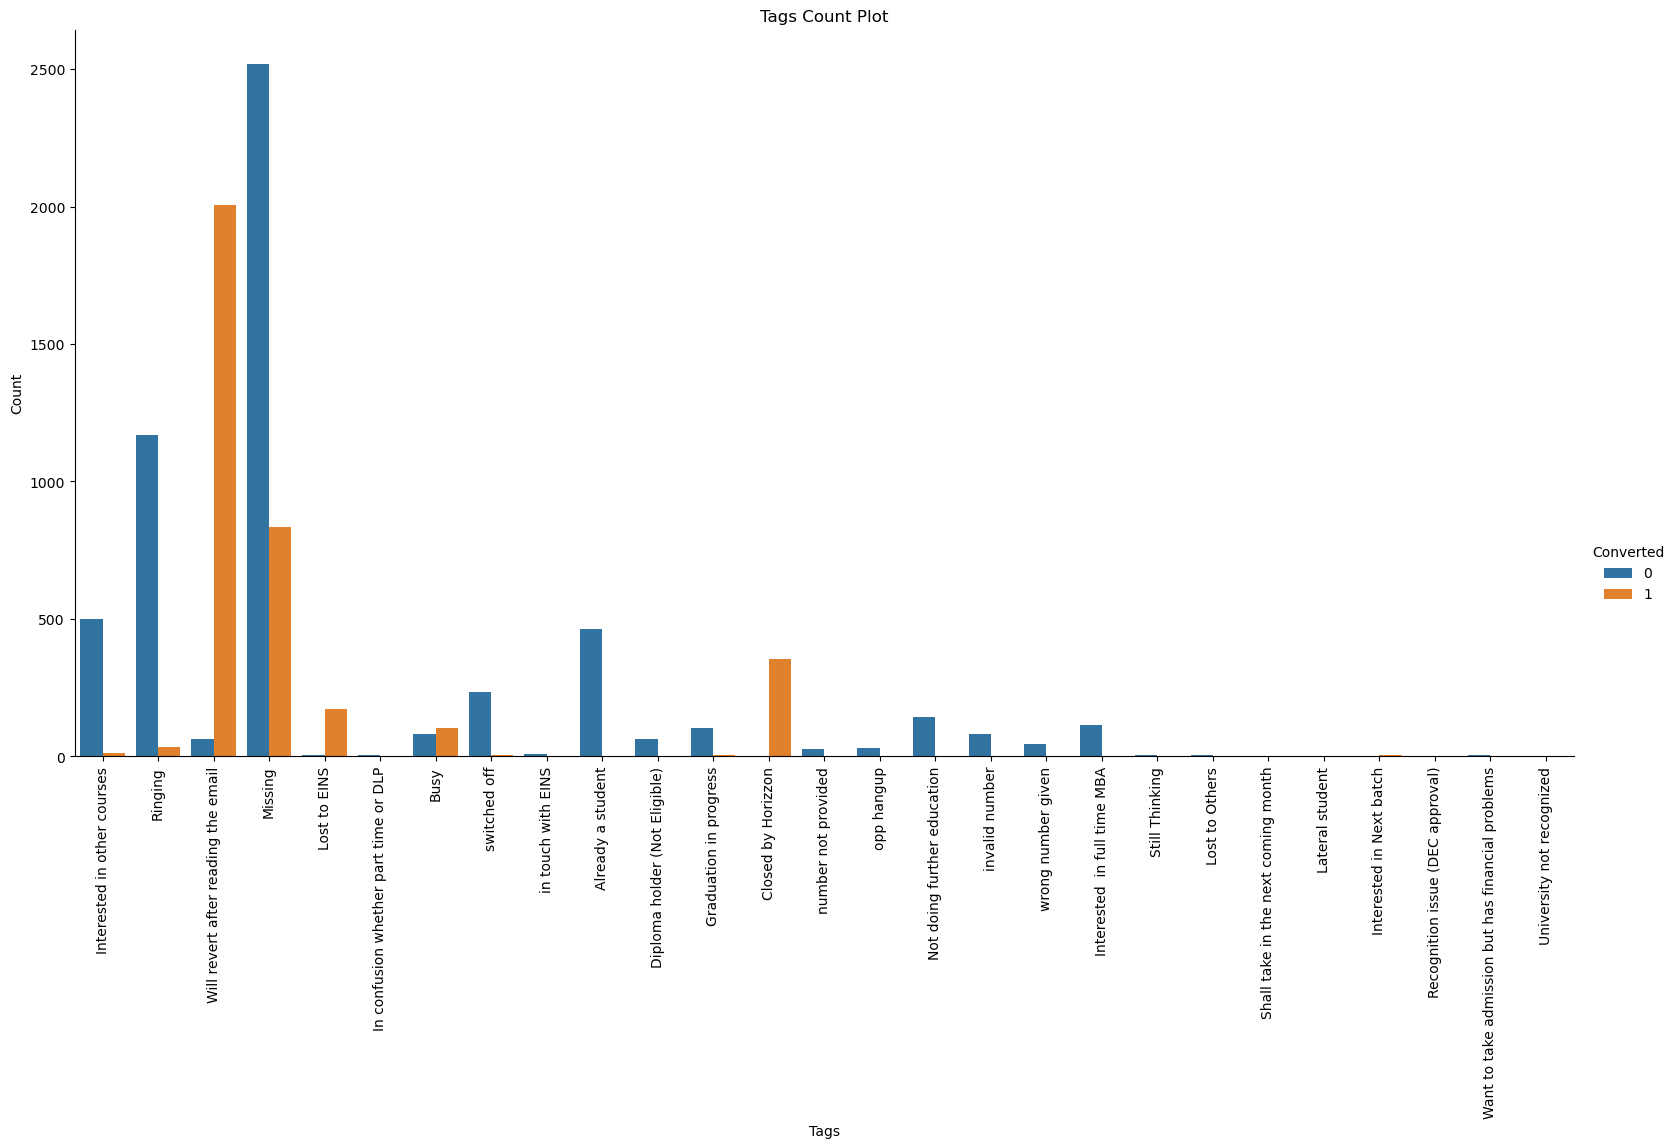

In [36]:
ld_copy = ld.copy()
ld_copy['Tags'].fillna('Missing', inplace=True)
sns.catplot(data=ld_copy, x='Tags', kind='count', hue = 'Converted', aspect = 2, height=8).set(title = 'Tags Count Plot')
plt.xticks(rotation=90)
plt.xlabel('Tags')
plt.ylabel('Count')
plt.show()

Merging Smaller Tags into Other Tags.

In [37]:
ld['Tags'] = ld['Tags'].replace(['Interested in Next batch', 'Lateral student', 'opp hangup',
                                'Shall take in the next coming month', 'Diploma holder (Not Eligible)',
                                 'Want to take admission but has financial problems', 'Graduation in progress',
                                'in touch with EINS', 'In confusion whether part time or DLP', 
                                'Still Thinking', 'University not recognized', 'Recognition issue (DEC approval)',
                                'Lost to Others', 'number not provided', 'wrong number given', 'switched off',
                                      'Already a student', 'Not doing further education', 'invalid number',
                                       'wrong number given', 'Interested  in full time MBA'], 'Other Tags')

Since there is a huge difference in conversion rates of missing values and the mode, let's assign a new value to missing values.

##### What matters most to you in choosing a course

In [38]:
vc =ld["What matters most to you in choosing a course"].value_counts(dropna=False)
prc = (vc / len(ld)) * 100
res = pd.DataFrame({'Counts': vc, 'Percentages': prc})
res = res.sort_values(by='Counts', ascending=False)
res

Counts  Percentages
Better Career Prospects      6528    70.649351
NaN                          2709    29.318182
Flexibility & Convenience       2     0.021645
Other                           1     0.010823

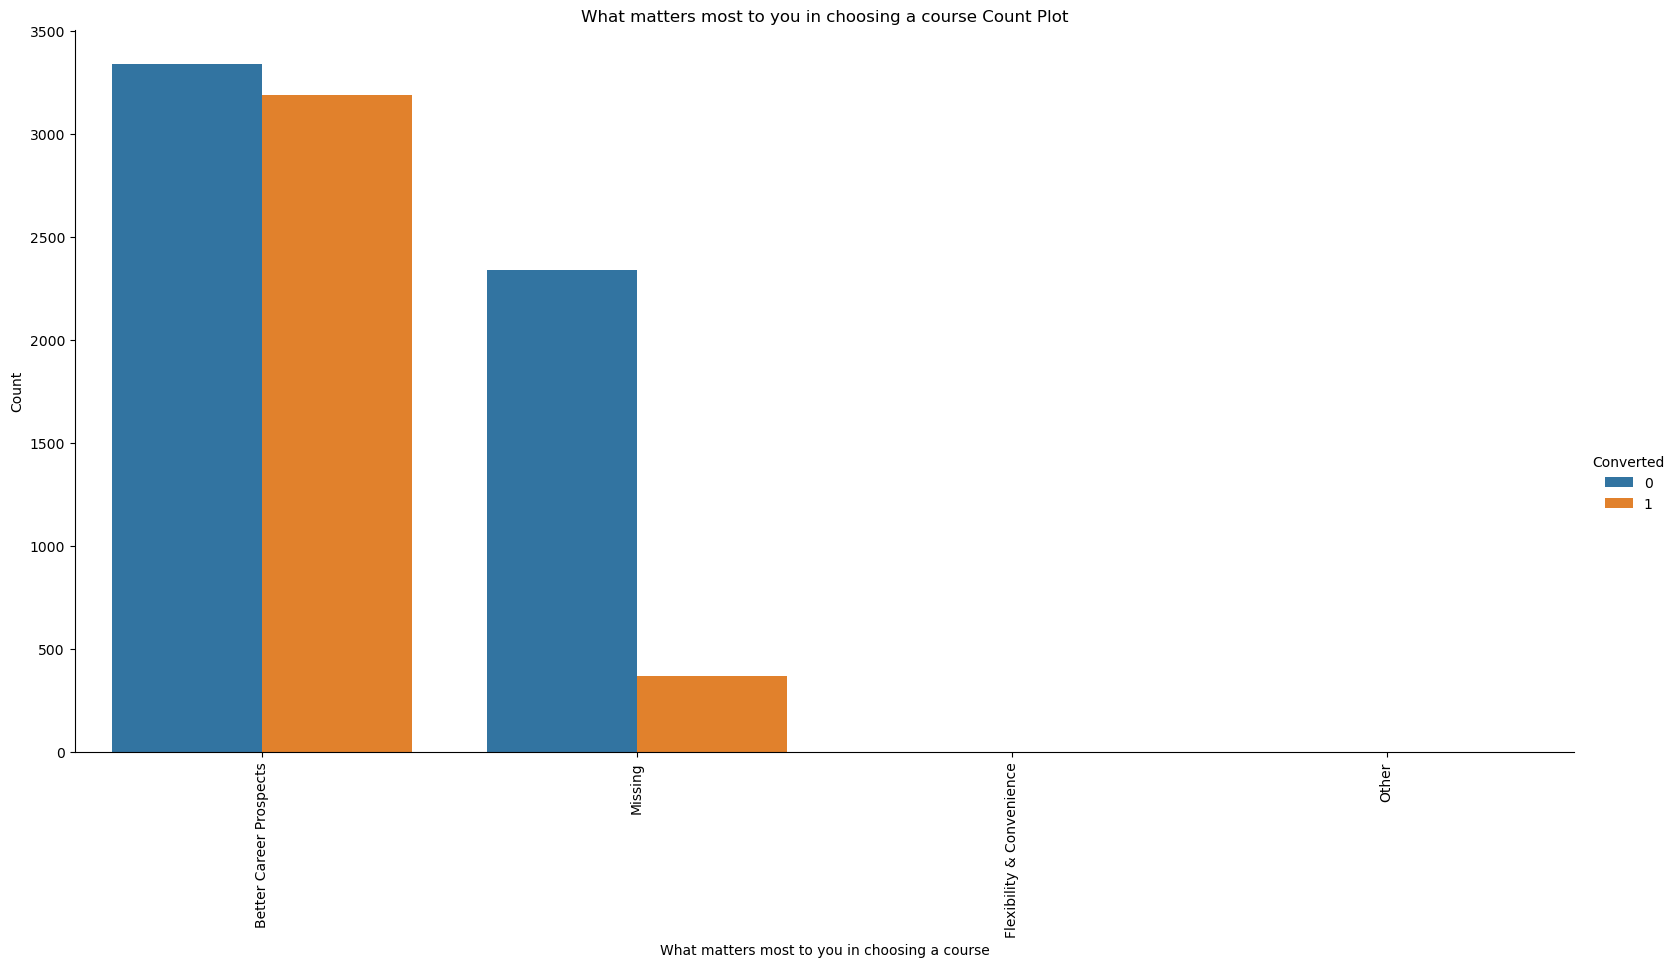

In [39]:
ld_copy = ld.copy()
ld_copy['What matters most to you in choosing a course'].fillna('Missing', inplace=True)

sns.catplot(data=ld_copy, x='What matters most to you in choosing a course', kind='count', hue = 'Converted',
            aspect = 2, height=8).set(title = 'What matters most to you in choosing a course Count Plot')
plt.xticks(rotation=90)
plt.xlabel('What matters most to you in choosing a course')
plt.ylabel('Count')
plt.show()

It's pretty evident that the data is skewed, so it's better to drop this column.

##### What is your current occupation

In [40]:
vc = ld['What is your current occupation'].value_counts(dropna=False)
prc = (vc / len(ld)) * 100
res = pd.DataFrame({'Counts': vc, 'Percentages': prc})
res = res.sort_values(by='Counts', ascending=False)
res

Counts  Percentages
Unemployed              5600    60.606061
NaN                     2690    29.112554
Working Professional     706     7.640693
Student                  210     2.272727
Other                     16     0.173160
Housewife                 10     0.108225
Businessman                8     0.086580

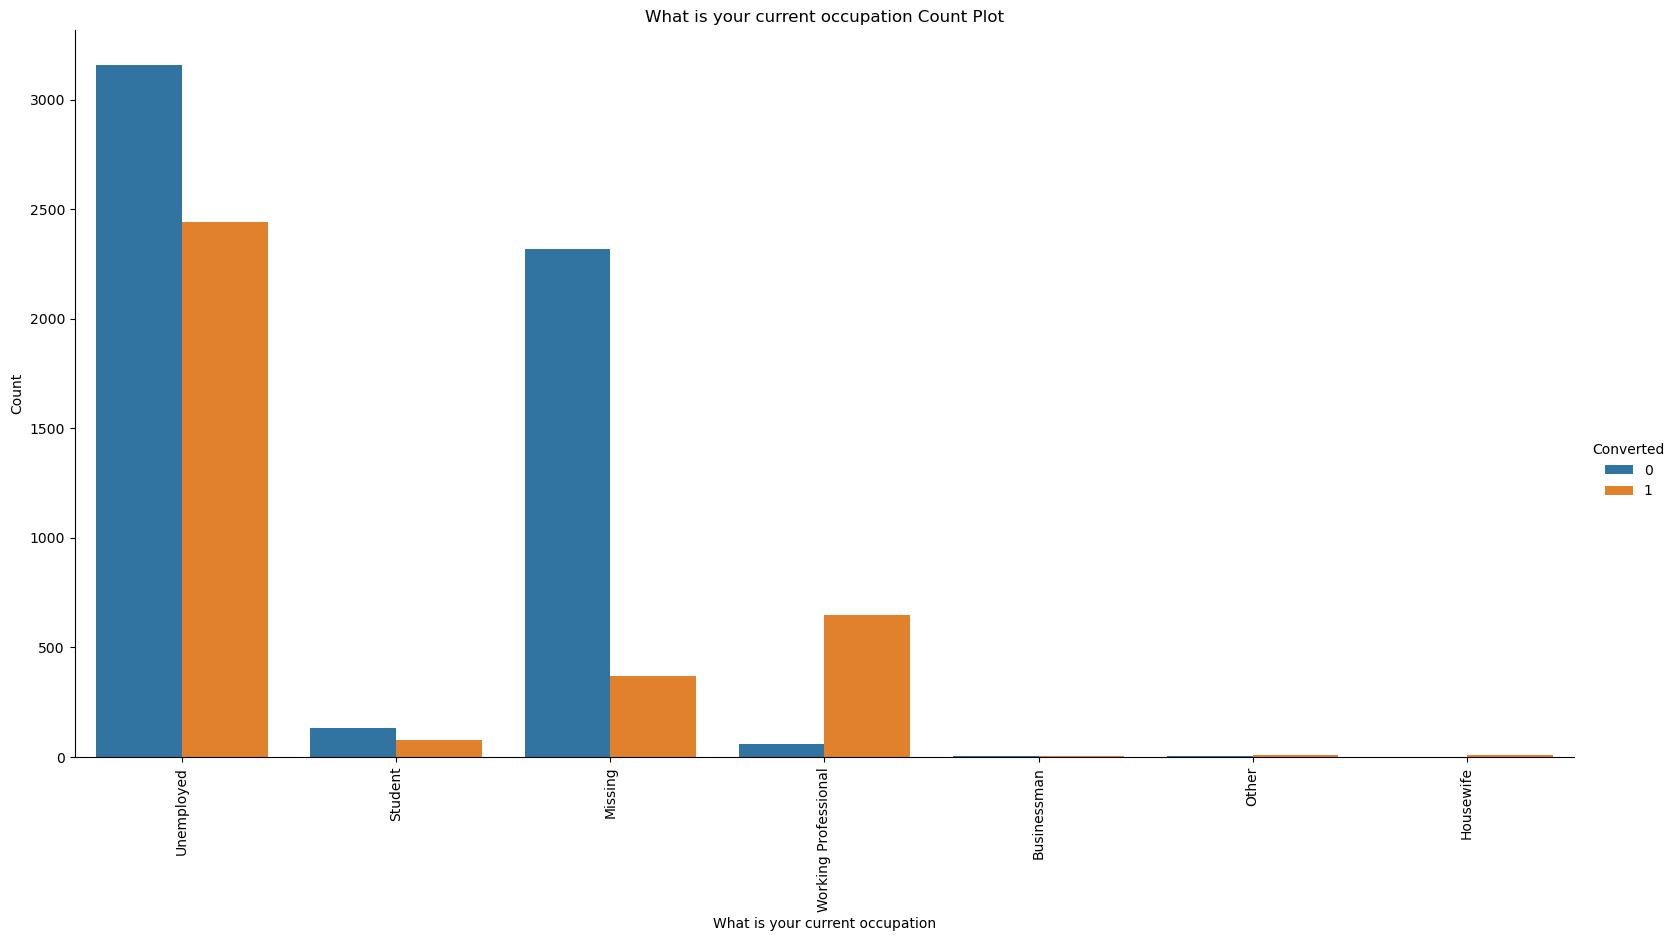

In [41]:
ld_copy = ld.copy()
ld_copy['What is your current occupation'].fillna('Missing', inplace=True)

sns.catplot(data=ld_copy, x='What is your current occupation', kind='count', hue = 'Converted',
            aspect = 2, height=8).set(title = 'What is your current occupation Count Plot')
plt.xticks(rotation=90)
plt.xlabel('What is your current occupation')
plt.ylabel('Count')
plt.show()

About 60% of values are 'Unemployed'. If missing values are imputed with mode then data will become more skewed. Let's impute the value as "Unknown". 

##### Country

In [42]:
vc = ld['Country'].value_counts(dropna=False)
prc = (vc / len(ld)) * 100
res = pd.DataFrame({'Counts': vc, 'Percentages': prc})
res = res.sort_values(by='Counts', ascending=False)
res

Counts  Percentages
India                   6492    70.259740
NaN                     2461    26.634199
United States             69     0.746753
United Arab Emirates      53     0.573593
Singapore                 24     0.259740
Saudi Arabia              21     0.227273
United Kingdom            15     0.162338
Australia                 13     0.140693
Qatar                     10     0.108225
Hong Kong                  7     0.075758
Bahrain                    7     0.075758
Oman                       6     0.064935
France                     6     0.064935
unknown                    5     0.054113
Kuwait                     4     0.043290
South Africa               4     0.043290
Canada                     4     0.043290
Nigeria                    4     0.043290
Germany                    4     0.043290
Sweden                     3     0.032468
Philippines                2     0.021645
Italy                      2     0.021645
Bangladesh                 2     0.021645
Netherlands                2     0.021645
Asia/Pacific Region        2     0.021645
China                      2     0.021645
Belgium                    2     0.021645
Ghana                      2     0.021645
Uganda                     2     0.021645
Switzerland                1     0.010823
Vietnam                    1     0.010823
Russia                     1     0.010823
Denmark                    1     0.010823
Kenya                      1     0.010823
Liberia                    1     0.010823
Malaysia                   1     0.010823
Tanzania                   1     0.010823
Sri Lanka                  1     0.010823
Indonesia                  1     0.010823

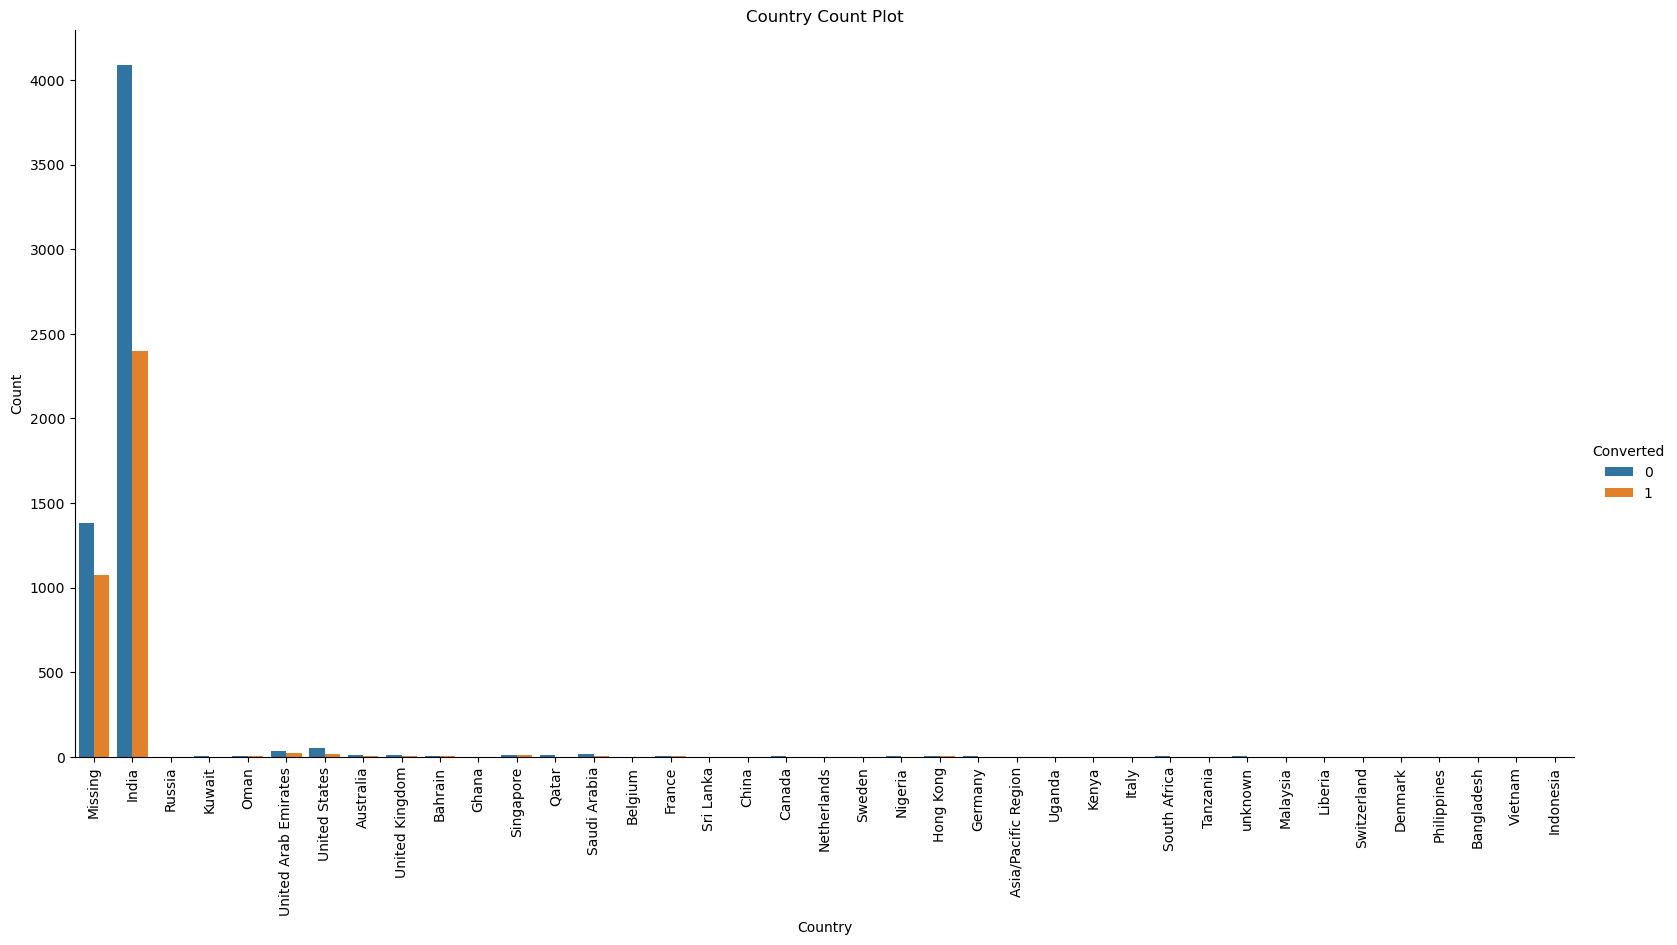

In [43]:
ld_copy = ld.copy()
ld_copy['Country'].fillna('Missing', inplace=True)

sns.catplot(data=ld_copy, x='Country', kind='count', hue = 'Converted', aspect = 2, height=8).set(title = 'Country Count Plot')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

If imputed with mode i.e. India, 96% of the values will belong to India which will create bias in the analysis. Hence, it's better to drop this column.

##### Last Activity

In [44]:
vc = ld['Last Activity'].value_counts(dropna=False)
prc = (vc / len(ld)) * 100
res = pd.DataFrame({'Counts': vc, 'Percentages': prc})
res = res.sort_values(by='Counts', ascending=False)
res

Counts  Percentages
Email Opened                    3437    37.196970
SMS Sent                        2745    29.707792
Olark Chat Conversation          973    10.530303
Page Visited on Website          640     6.926407
Converted to Lead                428     4.632035
Email Bounced                    326     3.528139
Email Link Clicked               267     2.889610
Form Submitted on Website        116     1.255411
NaN                              103     1.114719
Unreachable                       93     1.006494
Unsubscribed                      61     0.660173
Had a Phone Conversation          30     0.324675
Approached upfront                 9     0.097403
View in browser link Clicked       6     0.064935
Email Received                     2     0.021645
Email Marked Spam                  2     0.021645
Visited Booth in Tradeshow         1     0.010823
Resubscribed to emails             1     0.010823

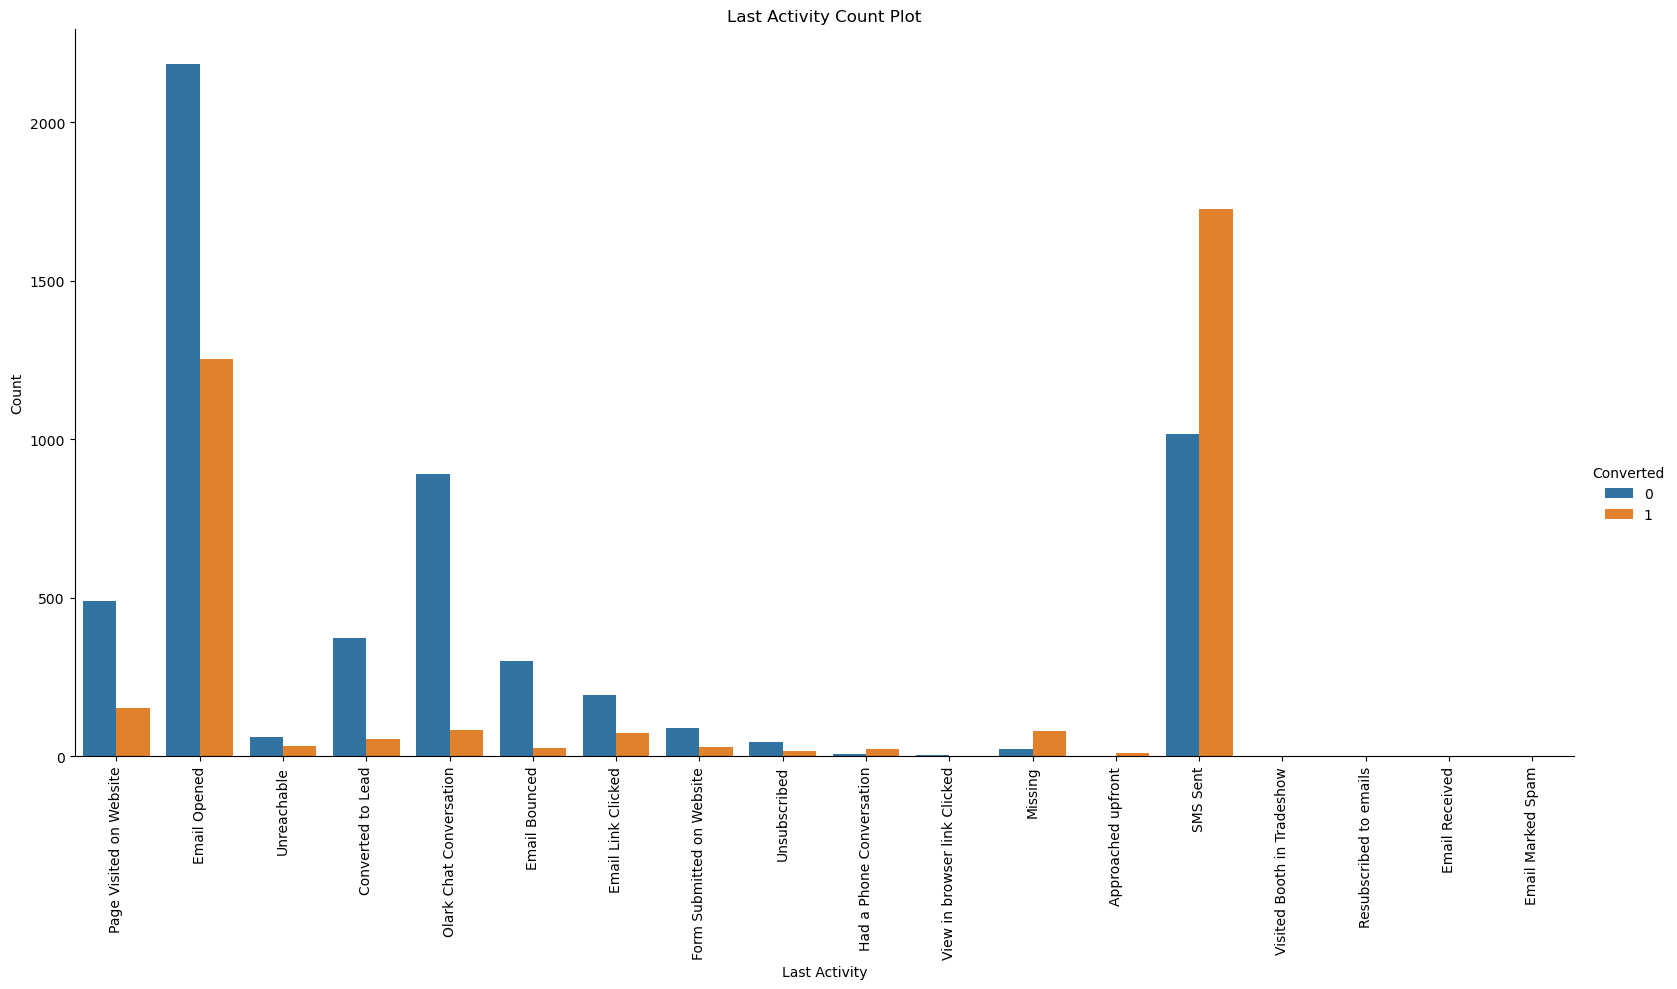

In [45]:
ld_copy = ld.copy()
ld_copy['Last Activity'].fillna('Missing', inplace=True)

sns.catplot(data=ld_copy, x='Last Activity', kind='count', hue = 'Converted', aspect = 2, height=8).set(title = 'Last Activity Count Plot')
plt.xticks(rotation=90)
plt.xlabel('Last Activity')
plt.ylabel('Count')
plt.show()

Merging Smaller Last Activities into Other Activity.

In [46]:
ld['Last Activity'] = ld['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 
                                                   'Email Marked Spam'], 'Other Activity')

The missing values can be imputed with mode.

##### Lead Source

In [47]:
vc = ld['Lead Source'].value_counts(dropna=False)
prc = (vc / len(ld)) * 100
res = pd.DataFrame({'Counts': vc, 'Percentages': prc})
res = res.sort_values(by='Counts', ascending=False)
res

Counts  Percentages
Google               2868    31.038961
Direct Traffic       2543    27.521645
Olark Chat           1755    18.993506
Organic Search       1154    12.489177
Reference             534     5.779221
Welingak Website      142     1.536797
Referral Sites        125     1.352814
Facebook               55     0.595238
NaN                    36     0.389610
bing                    6     0.064935
google                  5     0.054113
Click2call              4     0.043290
Press_Release           2     0.021645
Social Media            2     0.021645
Live Chat               2     0.021645
youtubechannel          1     0.010823
testone                 1     0.010823
Pay per Click Ads       1     0.010823
welearnblog_Home        1     0.010823
WeLearn                 1     0.010823
blog                    1     0.010823
NC_EDM                  1     0.010823

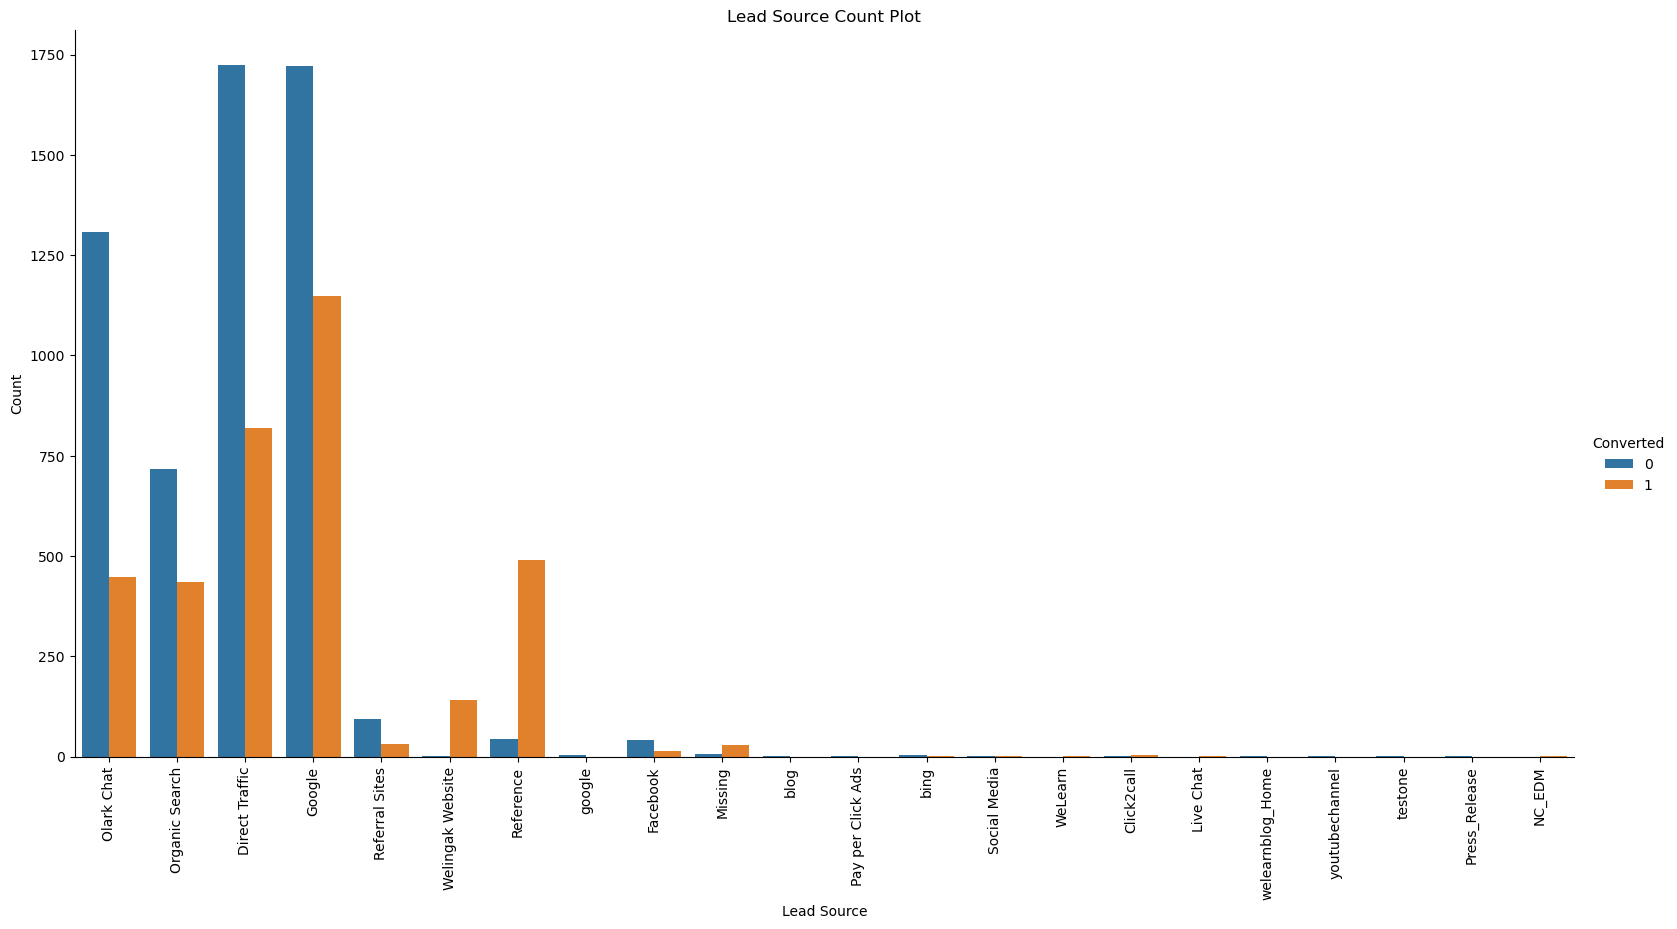

In [48]:
ld_copy = ld.copy()
ld_copy['Lead Source'].fillna('Missing', inplace=True)

sns.catplot(data=ld_copy, x='Lead Source', kind='count', hue = 'Converted',
            aspect = 2, height=8).set(title = 'Lead Source Count Plot')
plt.xticks(rotation=90)
plt.xlabel('Lead Source')
plt.ylabel('Count')
plt.show()

Merging Smaller Lead sources into Other Sources

In [49]:
ld['Lead Source'] = ld['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other Sources')

The missing values can be imputed with mode.

### Numerical variable analysis of columns with missing values

##### Total Visits

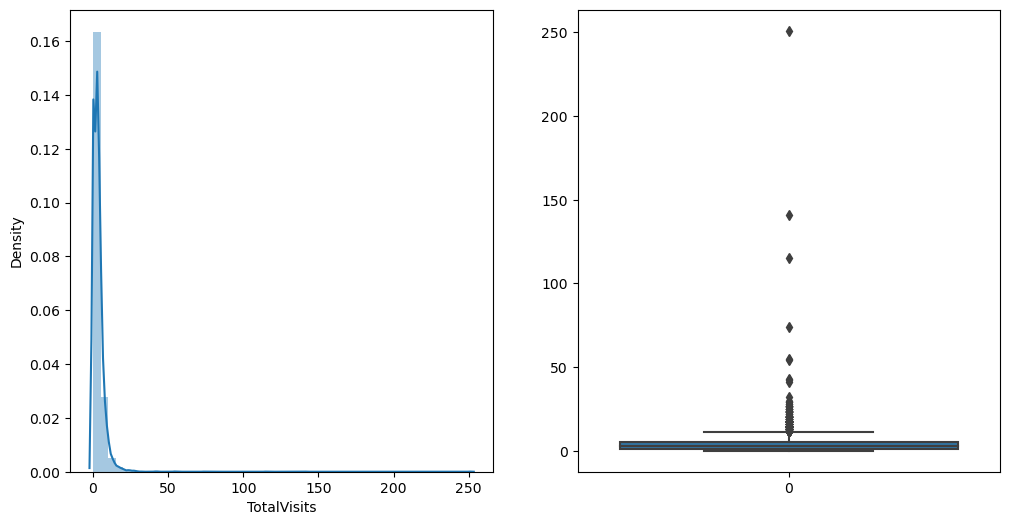

In [50]:
plt.figure(figsize = (12,6))
plt.subplot(121)
sns.distplot(ld['TotalVisits'])
plt.subplot(122)
sns.boxplot(ld['TotalVisits'])
plt.show()

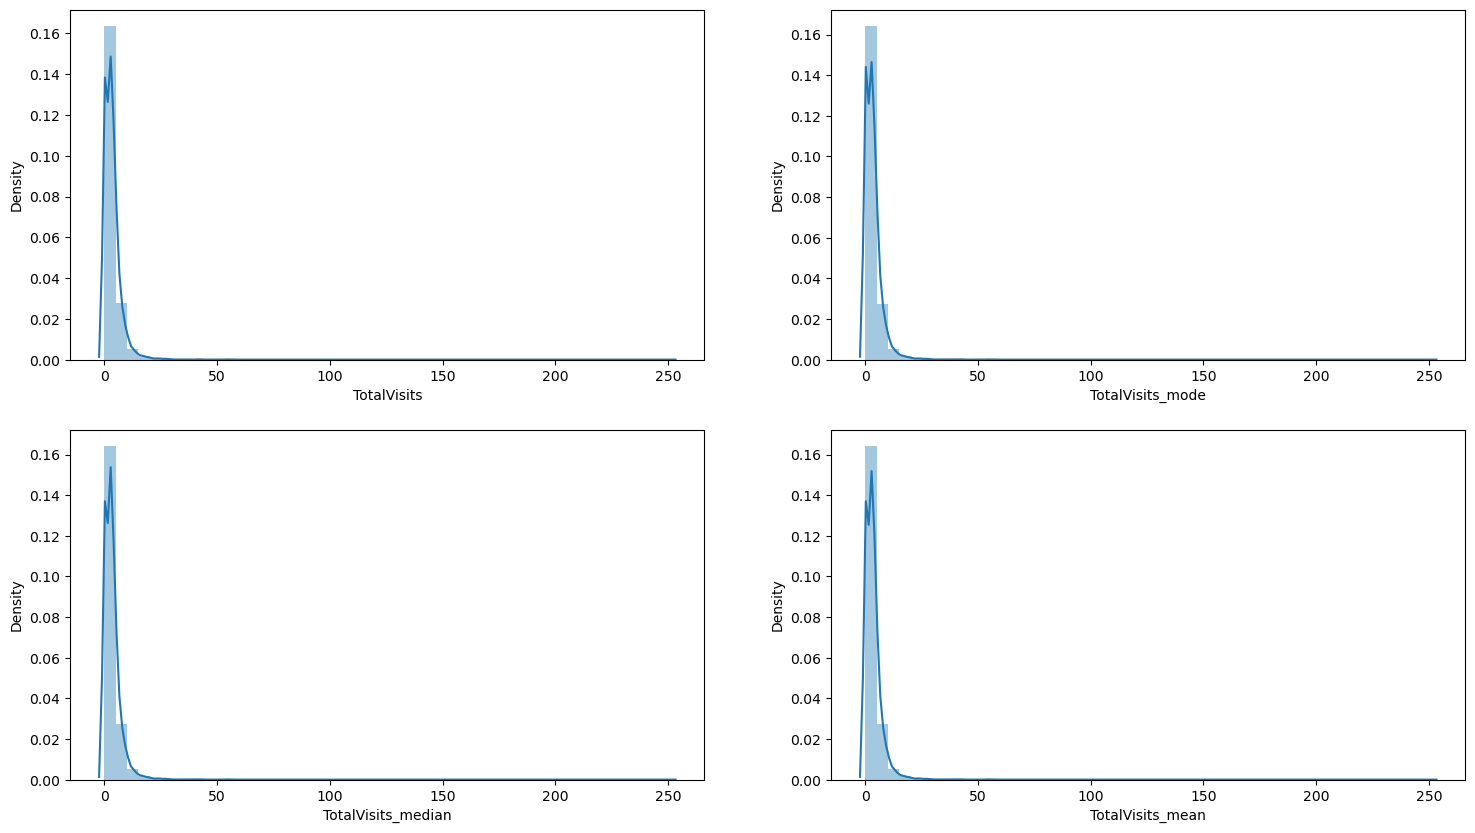

In [51]:
# Creating new dataframe for "TotalVisits" with columns imputed with mode, median and mean

imp_ld = pd.DataFrame() 
imp_ld["TotalVisits_mode"] = ld["TotalVisits"].fillna(ld["TotalVisits"].mode()[0])
imp_ld["TotalVisits_median"] = ld["TotalVisits"].fillna(ld["TotalVisits"].median())
imp_ld["TotalVisits_mean"] = ld["TotalVisits"].fillna(ld["TotalVisits"].mean())

cols = ["TotalVisits_mode", "TotalVisits_median","TotalVisits_mean"]

plt.figure(figsize=(18,10))
plt.subplot(221)
sns.distplot(ld["TotalVisits"][pd.notnull(ld["TotalVisits"])]);
for i in enumerate(cols): 
    plt.subplot(2,2,i[0]+2)
    sns.distplot(imp_ld[i[1]])

The missing values can be imputed with median.

##### Page Views Per Visit

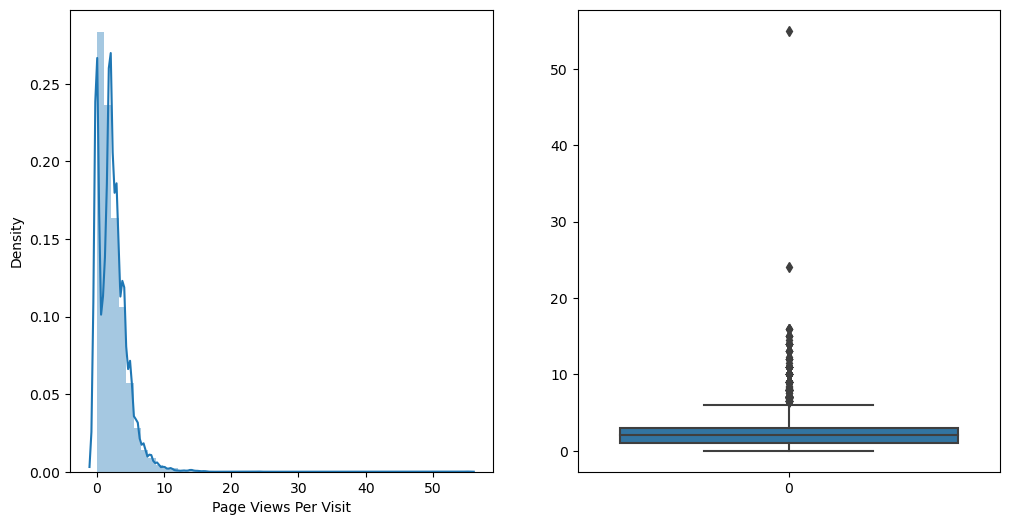

In [52]:
plt.figure(figsize = (12,6))
plt.subplot(121)
sns.distplot(ld['Page Views Per Visit'])
plt.subplot(122)
sns.boxplot(ld['Page Views Per Visit'])
plt.show()

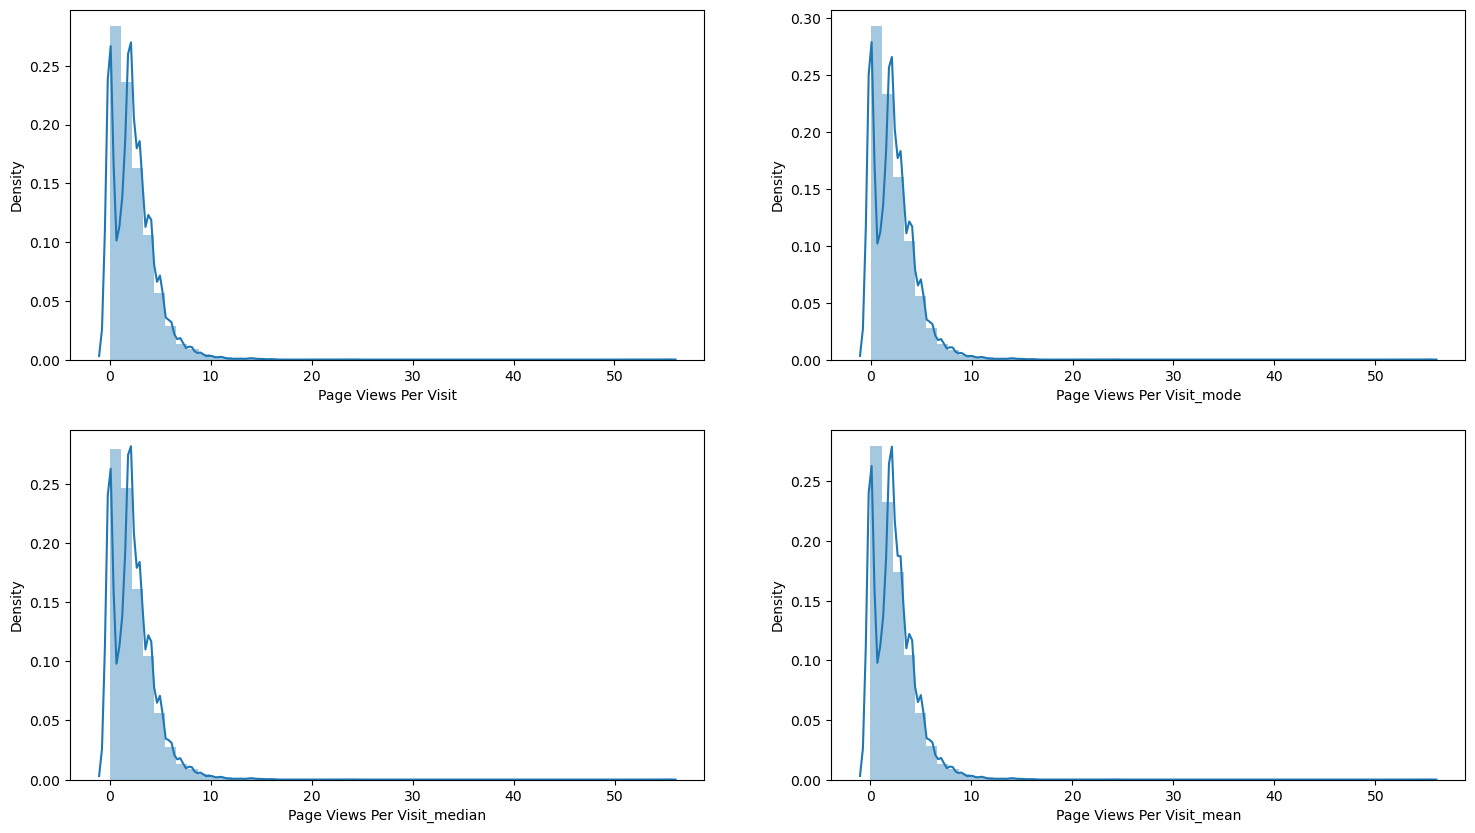

In [53]:
# Creating new dataframe for "Page Views Per Visit" with columns imputed with mode, median and mean

imp_ld = pd.DataFrame() 
imp_ld["Page Views Per Visit_mode"] = ld["Page Views Per Visit"].fillna(ld["Page Views Per Visit"].mode()[0])
imp_ld["Page Views Per Visit_median"] = ld["Page Views Per Visit"].fillna(ld["Page Views Per Visit"].median())
imp_ld["Page Views Per Visit_mean"] = ld["Page Views Per Visit"].fillna(ld["Page Views Per Visit"].mean())

cols = ["Page Views Per Visit_mode", "Page Views Per Visit_median","Page Views Per Visit_mean"]

plt.figure(figsize=(18,10))
plt.subplot(221)
sns.distplot(ld["Page Views Per Visit"][pd.notnull(ld["Page Views Per Visit"])]);
for i in enumerate(cols): 
    plt.subplot(2,2,i[0]+2)
    sns.distplot(imp_ld[i[1]])

The missing values can be imputed with median.

### Dropping columns

In [54]:
drop_cols = ['City', 'What matters most to you in choosing a course', 'Country'] #Selecting columns

In [55]:
ld.drop(drop_cols,axis=1,inplace=True)

In [56]:
ld.shape

(9240, 27)

### Imputing values

##### Specialization

In [57]:
ld['Specialization'] = ld['Specialization'].fillna('Not Specified')

##### Tags

In [58]:
ld['Tags'] = ld['Tags'].fillna('Not Specified')

##### What is your current occupation

In [59]:
ld['What is your current occupation'] = ld['What is your current occupation'].fillna('Unknown')

##### Last Activity

In [60]:
ld['Last Activity'].fillna(ld['Last Activity'].mode()[0], inplace=True)

##### Lead Source

In [61]:
ld['Lead Source'].fillna(ld['Lead Source'].mode()[0], inplace=True)

There is a category 'google' which is same as 'Google'.

In [62]:
ld['Lead Source'] = ld['Lead Source'].replace(['google'], 'Google')

##### TotalVisits

In [63]:
ld['TotalVisits'].fillna(ld['TotalVisits'].median(), inplace=True)

##### Page Views Per Visit

In [64]:
ld['Page Views Per Visit'].fillna(ld['Page Views Per Visit'].median(), inplace=True)

In [65]:
# Checing for missing values
print((ld.isna().mean()*100))

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

In [66]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9240 non-null   object 
 4   Do Not Email                              9240 non-null   object 
 5   Do Not Call                               9240 non-null   object 
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9240 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9240 non-null   float64
 10  Last Activity                       

### Removing variables with single values

In [67]:
def cat_info(df, categorical_column):
    res = pd.DataFrame(columns=["columns","values","unique_values","null_values","null_percent"])
    
    temp=pd.DataFrame()
    for value in categorical_column:
        temp["columns"] = [value]
        temp["values"] = [df[value].unique()]
        temp["unique_values"] = df[value].nunique()
        temp["null_values"] = df[value].isna().sum()
        temp["null_percent"] = (df[value].isna().sum()/len(df)*100).round(1)
        res = res.append(temp)
    
    res.sort_values("null_values", ascending =False, inplace=True)
    res.set_index("columns", inplace=True)
    return res

In [68]:
cat = cat_info(ld, ld.select_dtypes(exclude =["number"]).columns.values)
cat

values  \
columns                                                                                       
Prospect ID                               [7927b2df-8bba-4d29-b9a2-b6e0beafe620, 2a27243...   
Lead Origin                               [API, Landing Page Submission, Lead Add Form, ...   
A free copy of Mastering The Interview                                            [No, Yes]   
I agree to pay the amount through cheque                                               [No]   
Get updates on DM Content                                                              [No]   
Update me on Supply Chain Content                                                      [No]   
Tags                                      [Interested in other courses, Ringing, Will re...   
Receive More Updates About Our Courses                                                 [No]   
Through Recommendations                                                           [No, Yes]   
Digital Advertisement                                                             [No, Yes]   
Newspaper                                                                         [No, Yes]   
X Education Forums                                                                [No, Yes]   
Newspaper Article                                                                 [No, Yes]   
Magazine                                                                               [No]   
Search                                                                            [No, Yes]   
What is your current occupation           [Unemployed, Student, Unknown, Working Profess...   
Specialization                            [Not Specified, Business Administration, Media...   
Last Activity                             [Page Visited on Website, Email Opened, Unreac...   
Do Not Call                                                                       [No, Yes]   
Do Not Email                                                                      [No, Yes]   
Lead Source                               [Olark Chat, Organic Search, Direct Traffic, G...   
Last Notable Activity                     [Modified, Email Opened, Page Visited on Websi...   

                                         unique_values null_values  \
columns                                                              
Prospect ID                                       9240           0   
Lead Origin                                          5           0   
A free copy of Mastering The Interview               2           0   
I agree to pay the amount through cheque             1           0   
Get updates on DM Content                            1           0   
Update me on Supply Chain Content                    1           0   
Tags                                                 8           0   
Receive More Updates About Our Courses               1           0   
Through Recommendations                              2           0   
Digital Advertisement                                2           0   
Newspaper                                            2           0   
X Education Forums                                   2           0   
Newspaper Article                                    2           0   
Magazine                                             1           0   
Search                                               2           0   
What is your current occupation                      7           0   
Specialization                                      11           0   
Last Activity                                       11           0   
Do Not Call                                          2           0   
Do Not Email                                         2           0   
Lead Source                                          9           0   
Last Notable Activity                               16           0   

                                          null_percent  
columns                                                 
Prospect 

Some of the columns have only 1 category which is irrelevant to the model.

In [69]:
drop_col = cat[cat['unique_values']==1].index.values.tolist() 
drop_col

['I agree to pay the amount through cheque',
 'Get updates on DM Content',
 'Update me on Supply Chain Content',
 'Receive More Updates About Our Courses',
 'Magazine']

In [70]:
ld.drop(drop_col, axis=1, inplace = True)
ld.shape

(9240, 22)

### Removing unnecessary columns

'Prospect ID' and 'Lead Number' can be removed as they represent customer's uid and lead procured

In [71]:
drop_col = ['Prospect ID', 'Lead Number']
ld.drop(drop_col, axis=1, inplace = True)
ld.shape

(9240, 20)

In [72]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Do Not Call                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

---------------------------------------------------------------------------------------------------------------------------

# Exploratory Data Analysis (EDA)

### Categorical Variable Analysis

In [73]:
# Function to generate plots related to Categorical Variables

def cat_plot(feature):
    temp_count = ld[feature].value_counts()
    temp_perc = ld[feature].value_counts(normalize = True)
    df1 = pd.DataFrame({feature: temp_count.index,'Total Values': temp_count.values,'% Values': temp_perc.values * 100})
    print(df1)
    
    # Calculate the percentage of Converted=1 per category value
    cat_perc = ld[[feature, 'Converted']].groupby([feature],as_index=False).mean()
    cat_perc["Converted"] = cat_perc["Converted"]*100
    cat_perc.sort_values(by='Converted', ascending=False, inplace=True)
     
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
      
    # Subplot 1: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax1, 
                    x = feature, 
                    y='Converted', 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    palette='crest')
    
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    ax1.set_ylabel('Percent of Converted Values [%]')
    ax1.set_xlabel(feature) 
    ax1.tick_params(axis='both', which='major', labelsize=10)
    ax1.set_title(feature + "( Converted % )", fontdict={'fontsize' : 15, 'fontweight' : 5 }) 
    
    # Subplot 2: Count plot of categorical column
    s = sns.countplot(ax=ax2, 
                    x = feature, 
                    data=ld,
                    hue ="Converted",
                    order=cat_perc[feature],
                    palette='rocket_r')

    # Define common styling
    ax2.set_title(feature, fontdict={'fontsize' : 15, 'fontweight' : 5}) 
    ax2.legend(['Not Converted','Converted'])
    
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();

##### Lead Origin

               Lead Origin  Total Values   % Values
0  Landing Page Submission          4886  52.878788
1                      API          3580  38.744589
2            Lead Add Form           718   7.770563
3              Lead Import            55   0.595238
4           Quick Add Form             1   0.010823


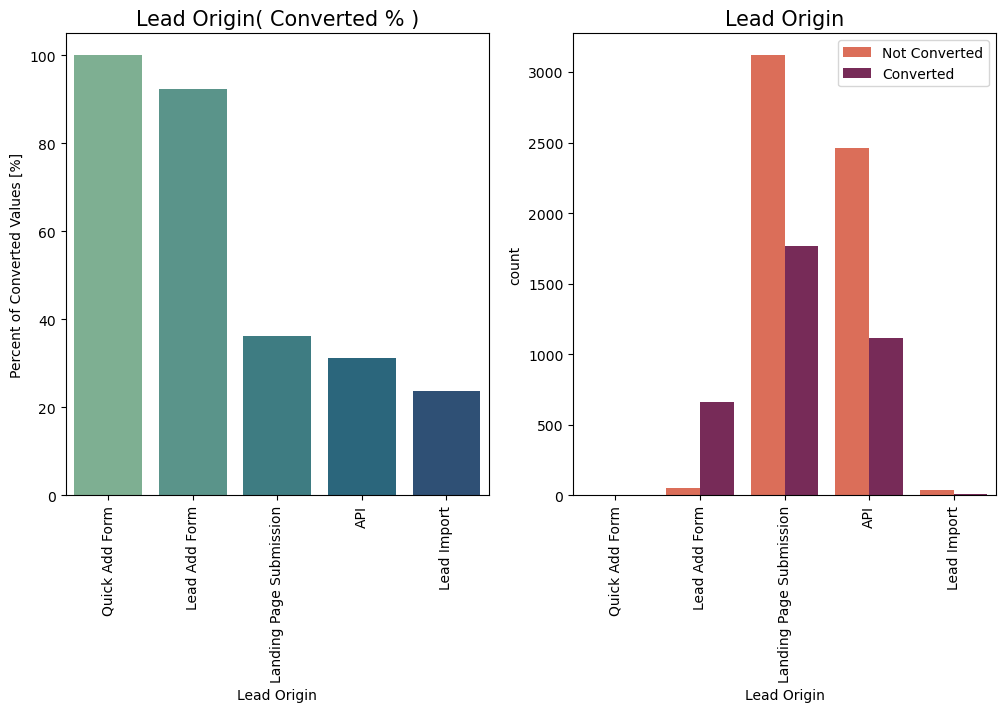

In [74]:
cat_plot('Lead Origin')

Most Leads originated from submissions on the landing page and around 38% of those are converted followed by API, where around 30% are converted. Even though Lead Origins from Quick Add Form are 100% Converted, there was just 1 lead from that category. Leads from the Lead Add Form are the next highest conversions in this category at around 90% of 718 leads.
Lead Import are very less in count and conversion rate is also the lowest.

##### Lead Source

        Lead Source  Total Values   % Values
0            Google          2909  31.482684
1    Direct Traffic          2543  27.521645
2        Olark Chat          1755  18.993506
3    Organic Search          1154  12.489177
4         Reference           534   5.779221
5  Welingak Website           142   1.536797
6    Referral Sites           125   1.352814
7          Facebook            55   0.595238
8     Other Sources            23   0.248918


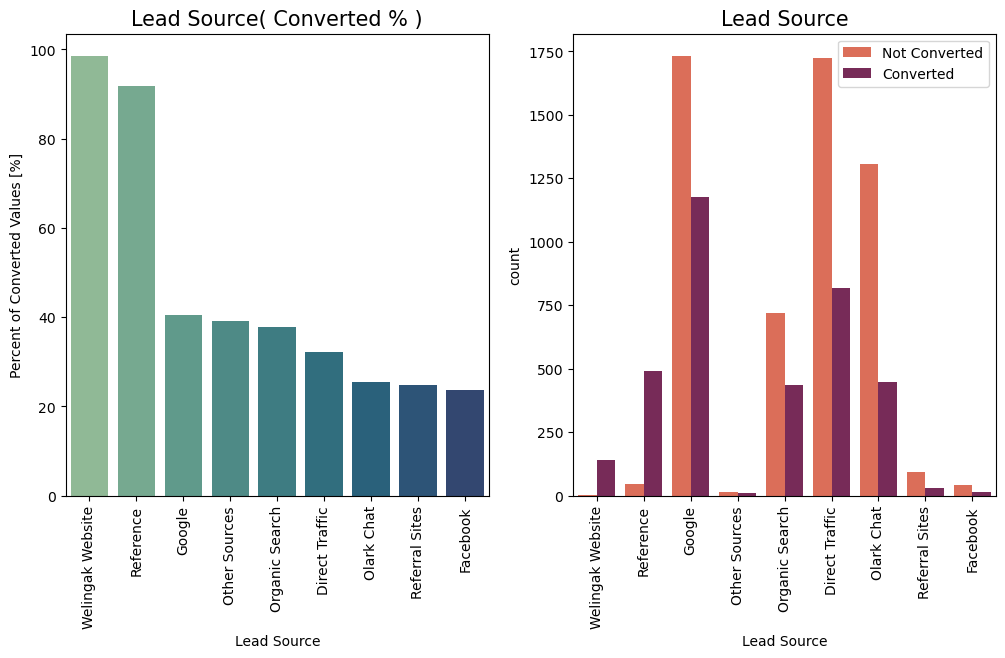

In [75]:
cat_plot('Lead Source')

The source of most leads was Google, and 40% of the leads converted, followed by Direct Traffic,Organic search and Olark chat where around 35%, 38% and 30% converted respectively. A lead that came from a reference has over 90% conversion from the total of 534.Welingak Website has almost 100% lead conversion rate. This option should be explored more to increase lead conversion.


##### Last Activity

                Last Activity  Total Values   % Values
0                Email Opened          3540  38.311688
1                    SMS Sent          2745  29.707792
2     Olark Chat Conversation           973  10.530303
3     Page Visited on Website           640   6.926407
4           Converted to Lead           428   4.632035
5               Email Bounced           326   3.528139
6          Email Link Clicked           267   2.889610
7   Form Submitted on Website           116   1.255411
8                 Unreachable            93   1.006494
9                Unsubscribed            61   0.660173
10             Other Activity            51   0.551948


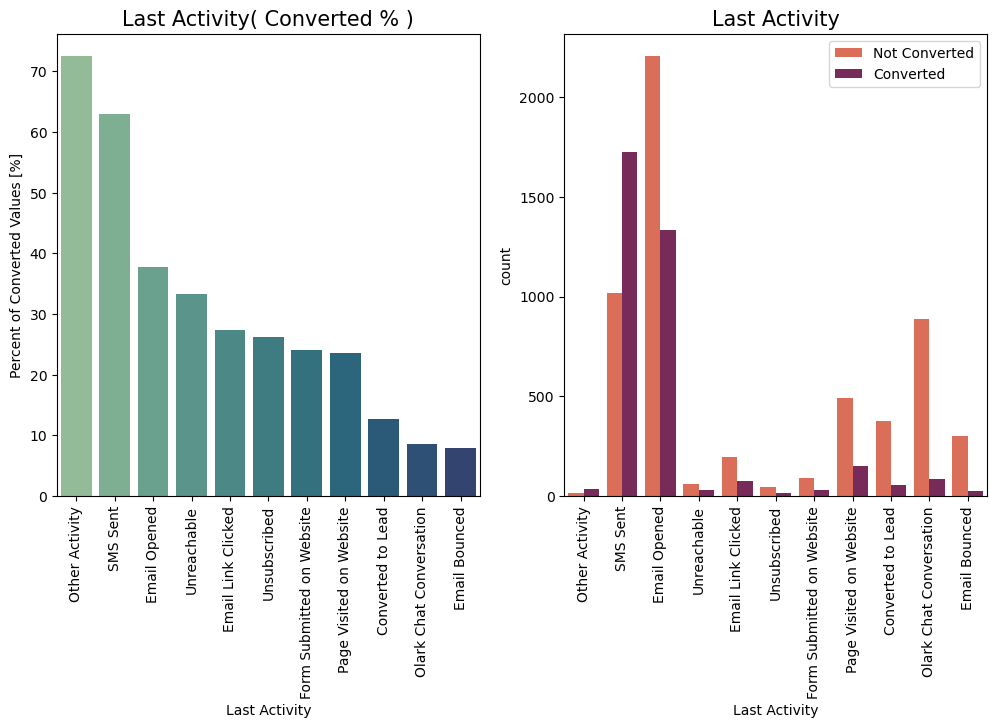

In [76]:
cat_plot('Last Activity')

Most of the lead have their Email opened as their last activity. After combining smaller Last Activity types as Other Activity, the lead conversion is very high (~70%). Conversion rate for leads with last activity as SMS Sent is almost 60%


##### Specialization

                       Specialization  Total Values   % Values
0          Management_Specializations          4253  46.028139
1                       Not Specified          3380  36.580087
2             Business Administration           403   4.361472
3   Banking, Investment And Insurance           338   3.658009
4               Media and Advertising           203   2.196970
5                  Travel and Tourism           203   2.196970
6              International Business           178   1.926407
7                          E-COMMERCE           112   1.212121
8              Rural and Agribusiness            73   0.790043
9                          E-Business            57   0.616883
10                Services Excellence            40   0.432900


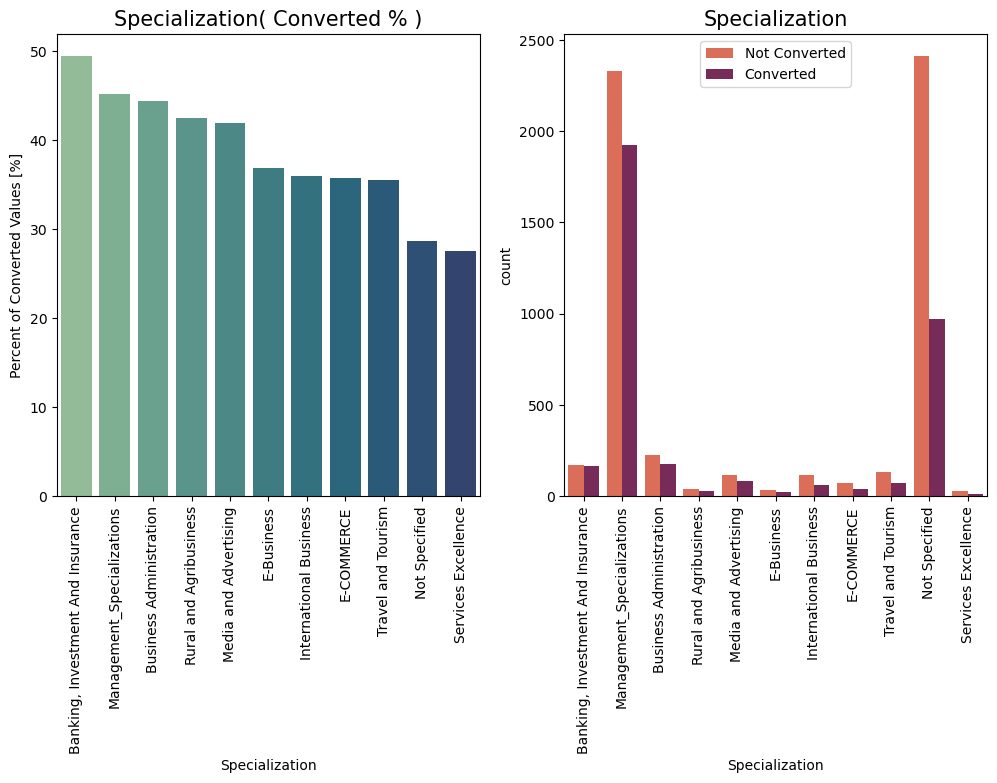

In [77]:
cat_plot('Specialization')

Most of the leads have not mentioned a specialization and around 28% of those converted. Leads related to management have high conversion rates.


##### What is your current occupation         

  What is your current occupation  Total Values   % Values
0                      Unemployed          5600  60.606061
1                         Unknown          2690  29.112554
2            Working Professional           706   7.640693
3                         Student           210   2.272727
4                           Other            16   0.173160
5                       Housewife            10   0.108225
6                     Businessman             8   0.086580


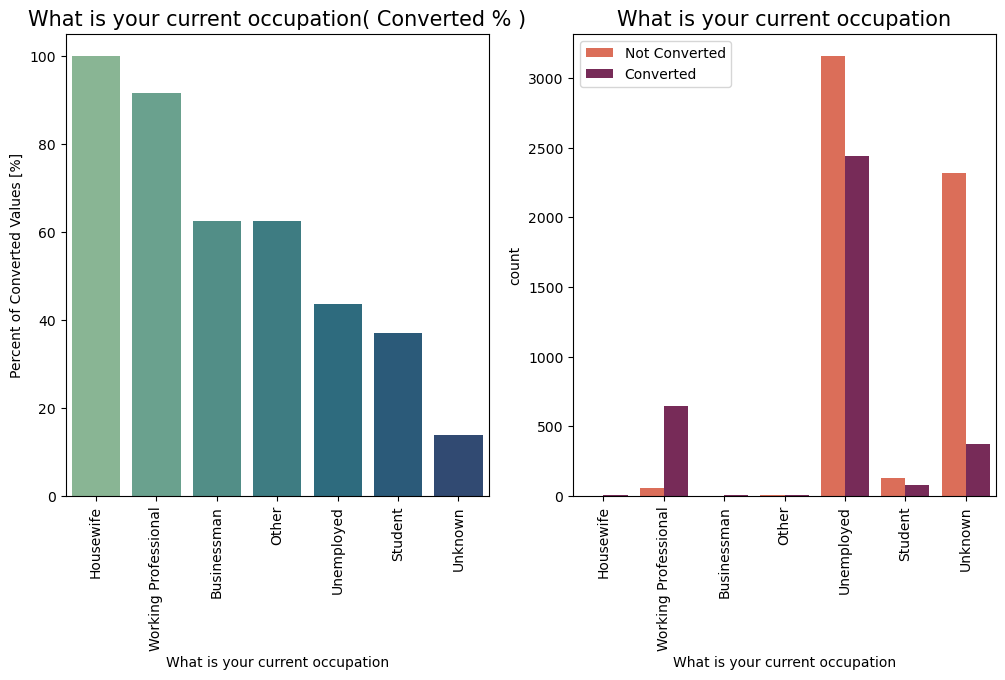

In [78]:
cat_plot('What is your current occupation')

Working professionals, Businessmen and Other category have high conversion rate. Though Housewives are less in numbers, they have 100% conversion rate. Unemployed people have been contacted in the highest number, the conversion rate is low (~40%).

##### Tags

                                  Tags  Total Values   % Values
0                        Not Specified          3353  36.287879
1  Will revert after reading the email          2072  22.424242
2                           Other Tags          1380  14.935065
3                              Ringing          1203  13.019481
4          Interested in other courses           513   5.551948
5                   Closed by Horizzon           358   3.874459
6                                 Busy           186   2.012987
7                         Lost to EINS           175   1.893939


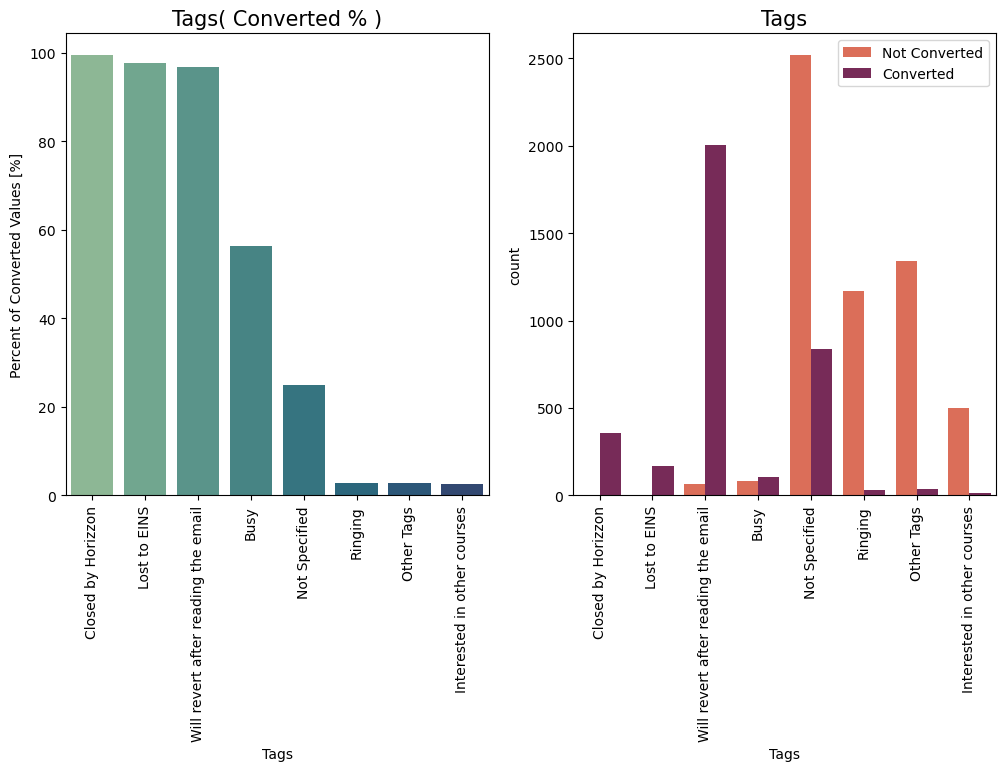

In [79]:
cat_plot('Tags')

Revert after email has best conversion rates. 'Closed by Horizzon' and 'Lost to EINS' have highest conversion rates though their count is low. 

##### Last Notable Activity

           Last Notable Activity  Total Values   % Values
0                       Modified          3407  36.872294
1                   Email Opened          2827  30.595238
2                       SMS Sent          2172  23.506494
3        Page Visited on Website           318   3.441558
4        Olark Chat Conversation           183   1.980519
5             Email Link Clicked           173   1.872294
6                  Email Bounced            60   0.649351
7                   Unsubscribed            47   0.508658
8                    Unreachable            32   0.346320
9       Had a Phone Conversation            14   0.151515
10             Email Marked Spam             2   0.021645
11            Approached upfront             1   0.010823
12        Resubscribed to emails             1   0.010823
13  View in browser link Clicked             1   0.010823
14     Form Submitted on Website             1   0.010823
15                Email Received             1   0.010823


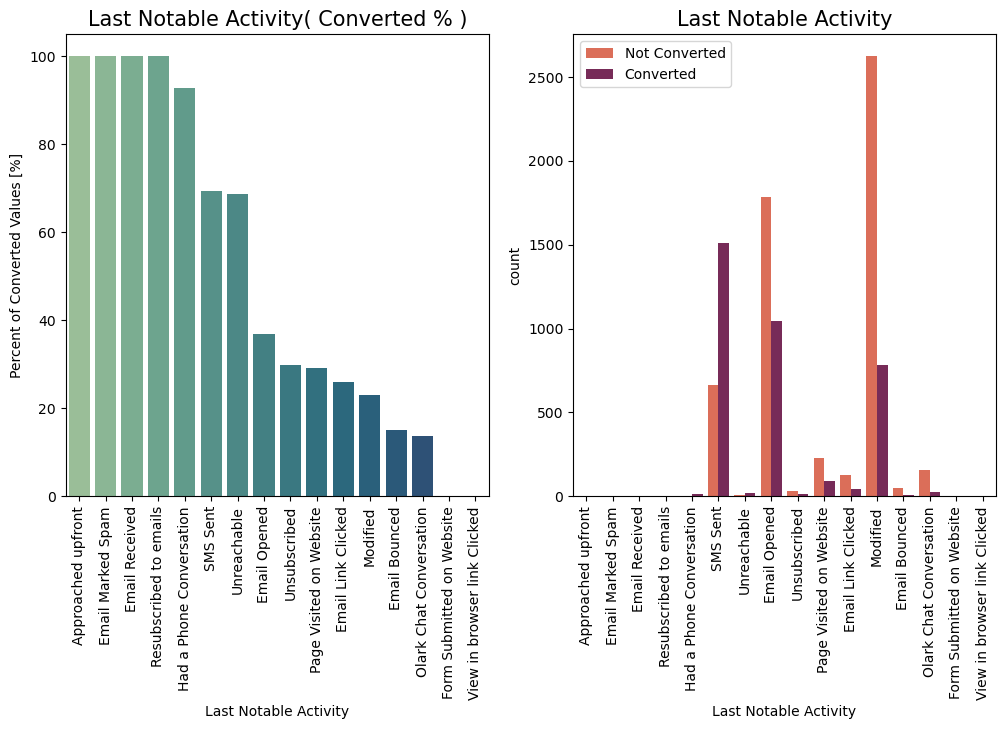

In [80]:
cat_plot('Last Notable Activity')

Merging Smaller Last Notable Activities into Other.

In [81]:
ld['Last Notable Activity'] = ld['Last Notable Activity'].replace(['Had a Phone Conversation', 'Email Marked Spam',
                                                                         'Unreachable','Unsubscribed',
                                                                         'Email Bounced', 'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 'Form Submitted on Website', 
                                                                       'Email Received'],'Other')

     Last Notable Activity  Total Values   % Values
0                 Modified          3407  36.872294
1             Email Opened          2827  30.595238
2                 SMS Sent          2172  23.506494
3  Page Visited on Website           318   3.441558
4  Olark Chat Conversation           183   1.980519
5       Email Link Clicked           173   1.872294
6                    Other           160   1.731602


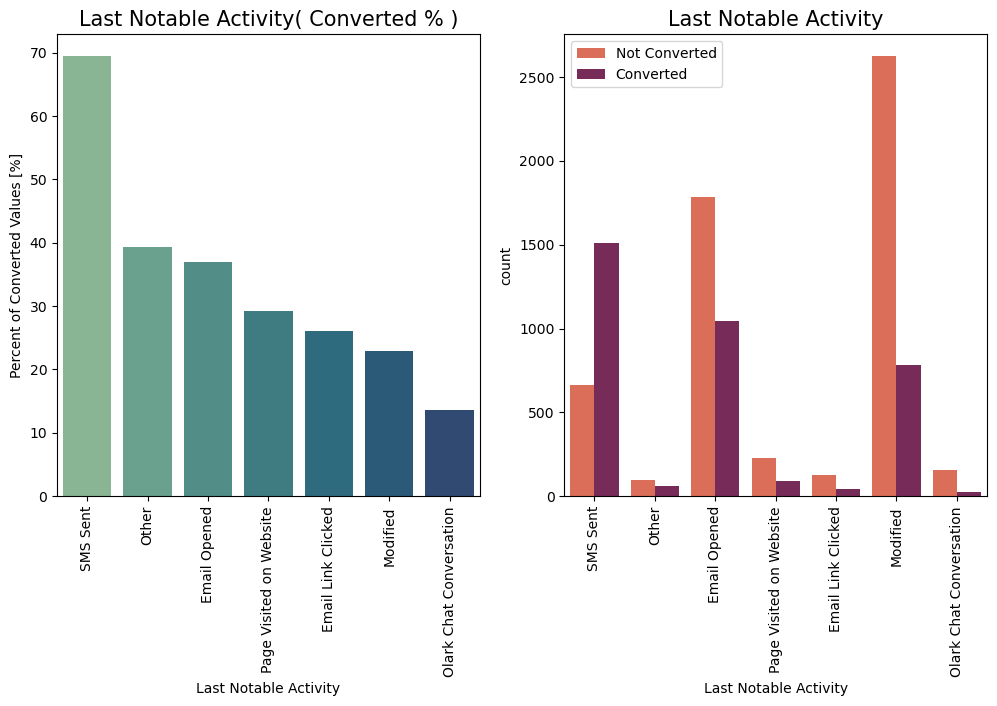

In [82]:
cat_plot('Last Notable Activity')

Most turnout have beem through SMS and Emails

##### Do Not Email, Do Not Call, Search, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, A free copy of Mastering The Interview

The above mentioned columns have been mentioned at once because they all have only 2 categories. Let's check their skewness of data.

In [83]:
def pp(df,col):
    circ=plt.Circle( (0,0), 0.4, color='white')
    converted = df[col].value_counts().rename_axis('unique_values').to_frame('counts')
    plt.pie(converted.counts, labels = ["No","Yes"],colors = ['#A9DACC', '#275670'],autopct='%1.2f%%')
    plt.gcf().gca().add_artist(circ)
    plt.title(col)

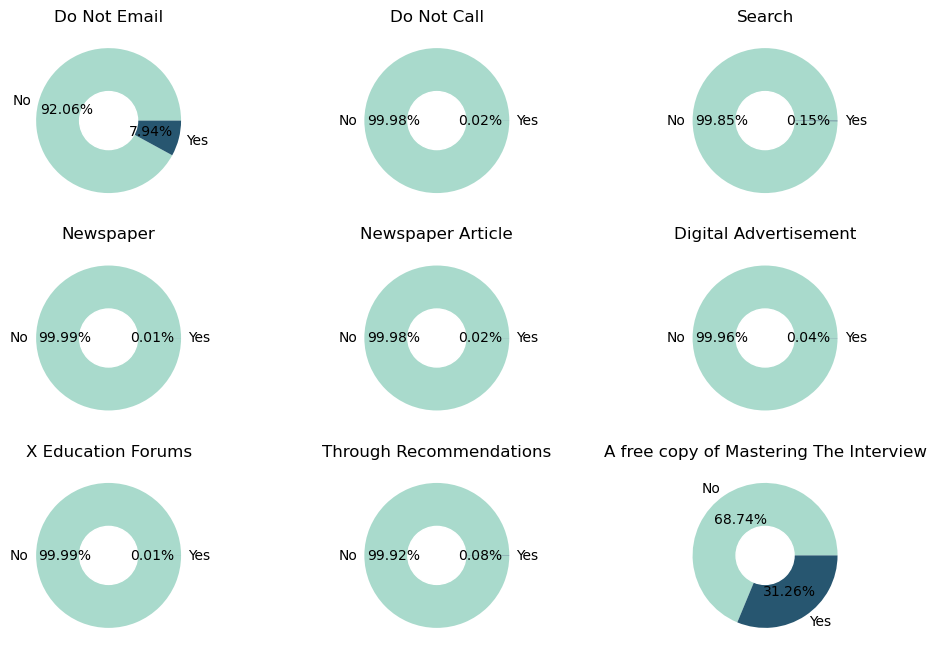

In [84]:
# Lets lookinto the data distribution of the following columns
col = ['Do Not Email','Do Not Call','Search', 'Newspaper', 'Newspaper Article', 'Digital Advertisement', 'X Education Forums', 'Through Recommendations', 'A free copy of Mastering The Interview']
plt.figure(figsize = (12,8))
i=1
for each_col in col:
    plt.subplot(3,3,i)
    pp(ld,each_col)
    i+=1

Let's see if 'Do Not Email' and 'A free copy of Mastering The Interview' can provide some relevant insights.

##### Do Not Email

  Do Not Email  Total Values   % Values
0           No          8506  92.056277
1          Yes           734   7.943723


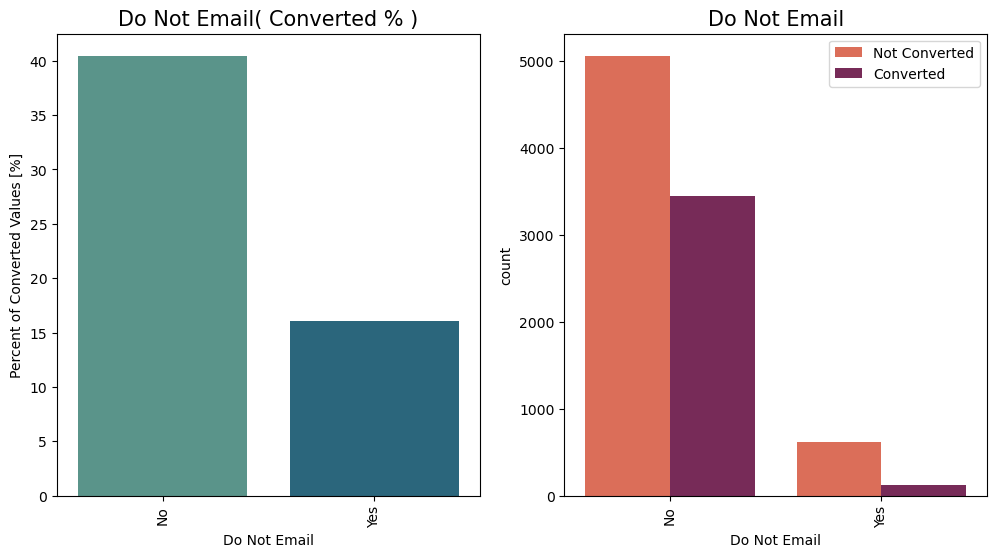

In [85]:
cat_plot('Do Not Email')

Majority of the people are ok with receiving email (~92%).People who are ok with email has conversion rate of 40%. People who have opted out of receive email has lower rate of conversion (only 15%).


##### A free copy of Mastering The Interview

  A free copy of Mastering The Interview  Total Values   % Values
0                                     No          6352  68.744589
1                                    Yes          2888  31.255411


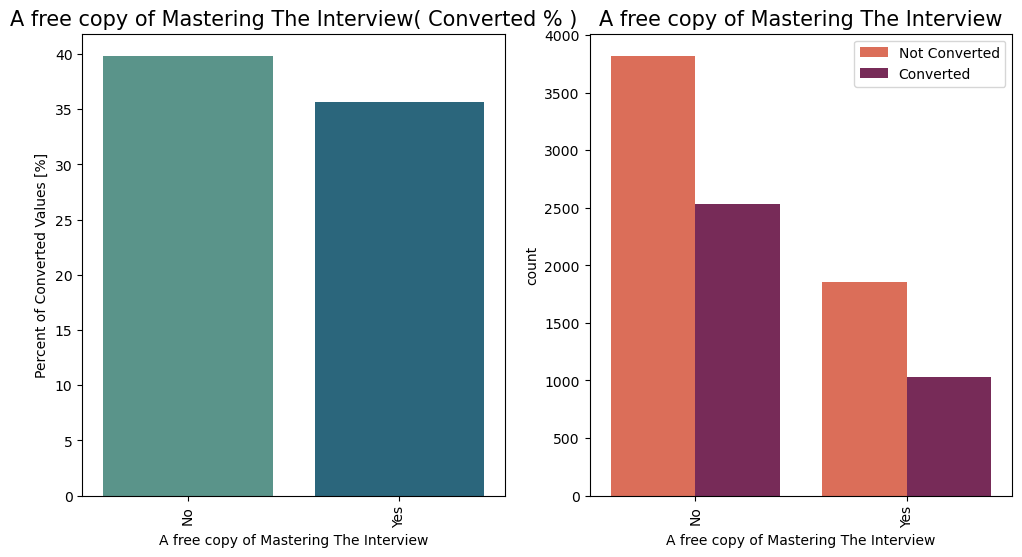

In [86]:
cat_plot('A free copy of Mastering The Interview')

Those who opted not to take the free copy have higher conversion rates.

In [87]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Do Not Call                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

In [88]:
ctr = ['Do Not Email', 'A free copy of Mastering The Interview']

# Remove columns from the 'col' list
for col_name in ctr:
    col.remove(col_name)
# Removing all columns in col
ld.drop(col,axis = 1, inplace = True)
ld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Tags                                    9240 non-null   obje

### Numerical Variable Analysis

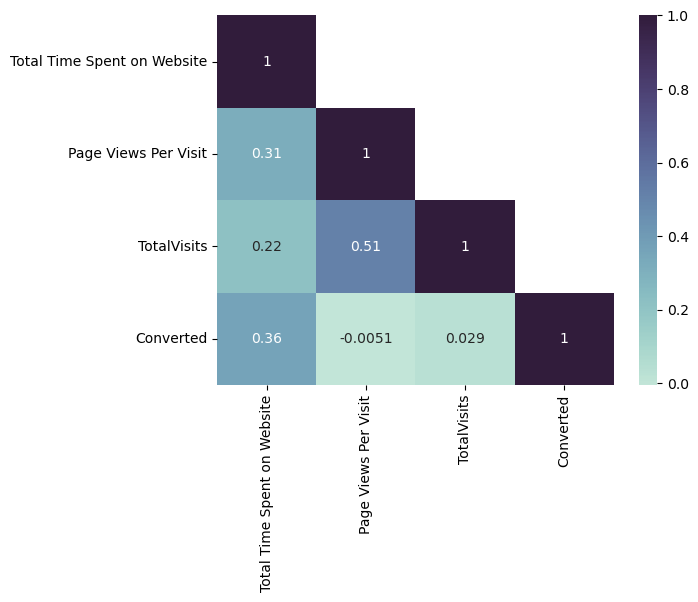

In [89]:
ld_num = ld[['Total Time Spent on Website', 'Page Views Per Visit', 'TotalVisits', 'Converted']]
cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True) #Setting palette colour
mask = np.triu(ld_num.corr())
np.fill_diagonal(mask, False)
sns.heatmap(ld_num.corr(), annot = True, cmap = cmap, mask = mask)
plt.show()

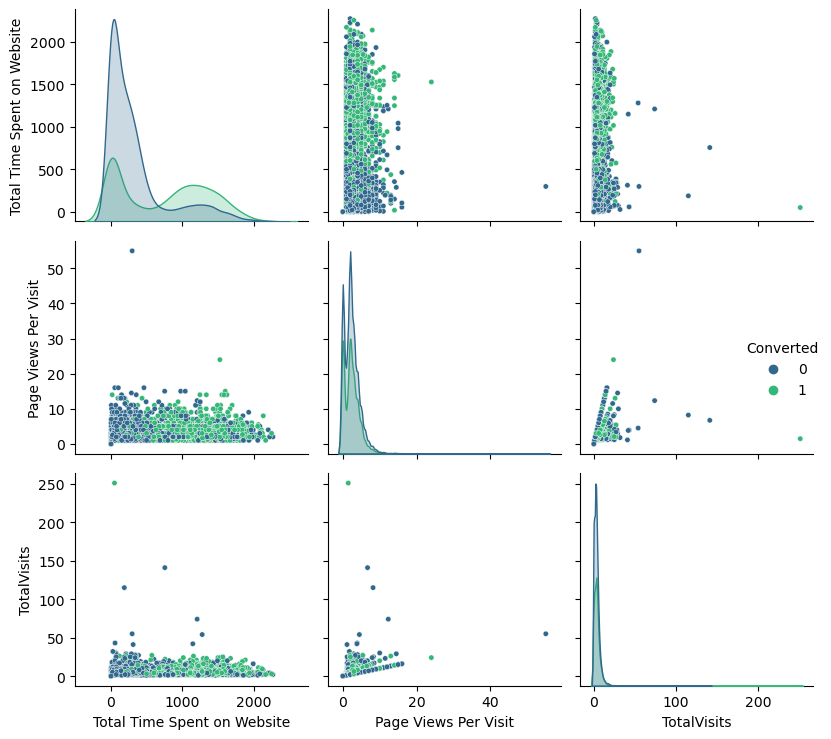

In [90]:
#Generating pairplot to check the relationships between numeric variables variables
sns.pairplot(ld_num, plot_kws={"s": 15}, hue = 'Converted', palette = 'viridis') 
plt.tight_layout()
plt.show()

Data distribution is uneven.

---------------------------------------------------------------------------------------------------------------------------

# Data Preparation

### Outlier Treatment

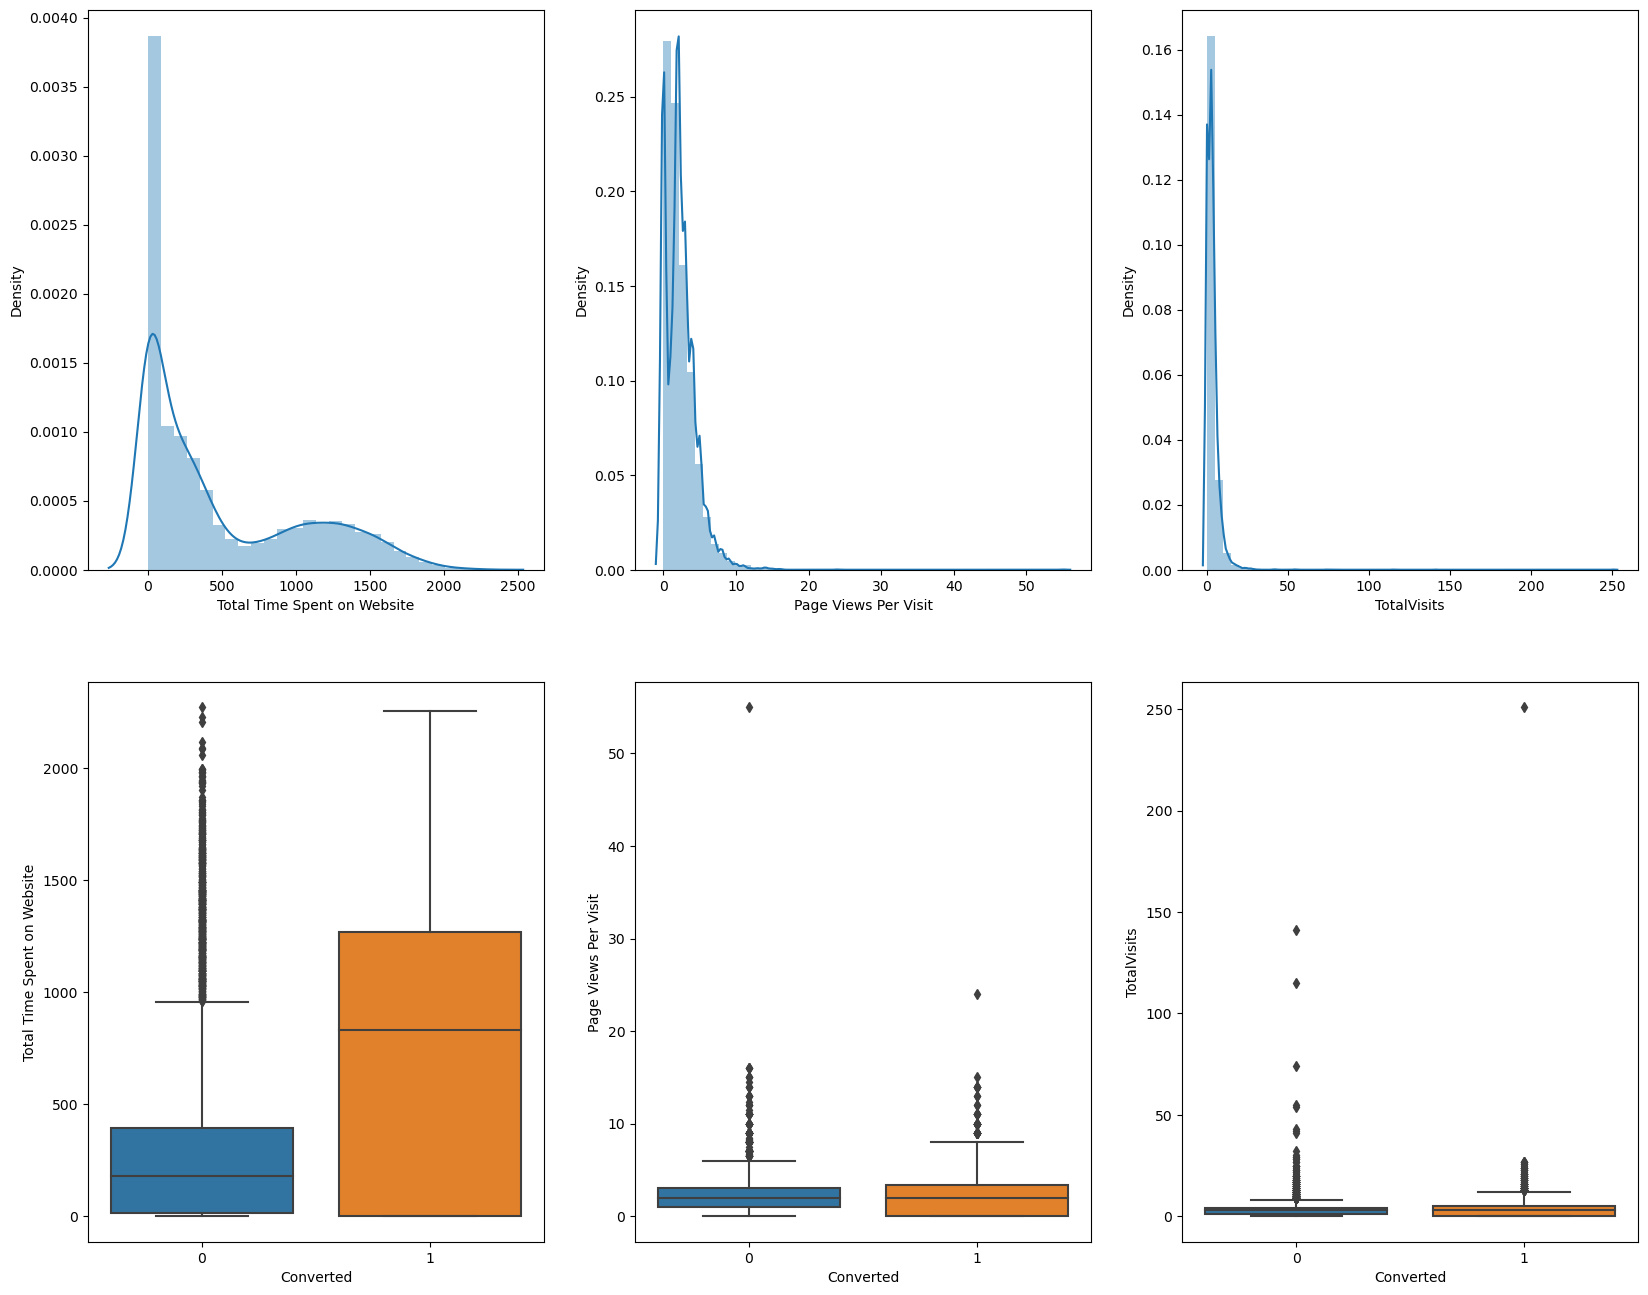

In [91]:
plt.figure(figsize=(20,16))

i=1
for col in ld_num:
    if i > 3:  # Limit to 6 subplots
        break
    plt.subplot(2,3,i)
    sns.distplot(ld[col])
    plt.subplot(2,3,3+i)
    sns.boxplot(y=ld[col], x = ld['Converted'])
    i+=1

'Page Views Per Visit' and 'TotalVisits' contain some outliers.

##### TotalVisits

In [92]:
ld['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

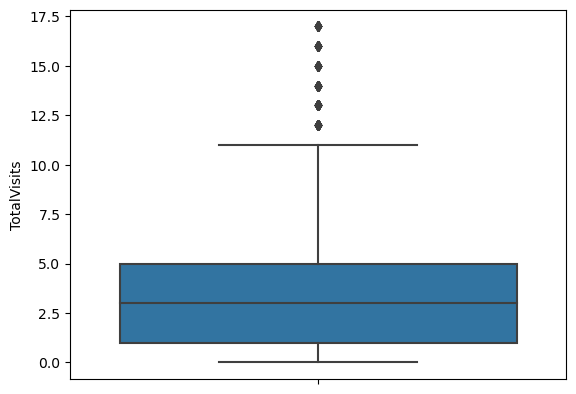

In [93]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = ld.TotalVisits.quantile(0.99)
ld = ld[(ld.TotalVisits <= Q3)]
Q1 = ld.TotalVisits.quantile(0.01)
ld = ld[(ld.TotalVisits >= Q1)]
sns.boxplot(y=ld['TotalVisits'])
plt.show()

##### Page Views Per Visit

In [94]:
ld['Page Views Per Visit'].describe()

count    9157.000000
mean        2.332225
std         2.047285
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

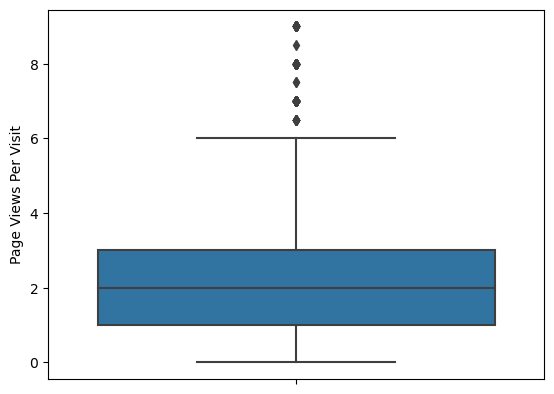

In [95]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = ld['Page Views Per Visit'].quantile(0.99)
ld = ld[ld['Page Views Per Visit'] <= Q3]
Q1 = ld['Page Views Per Visit'].quantile(0.01)
ld = ld[ld['Page Views Per Visit'] >= Q1]
sns.boxplot(y=ld['Page Views Per Visit'])
plt.show()

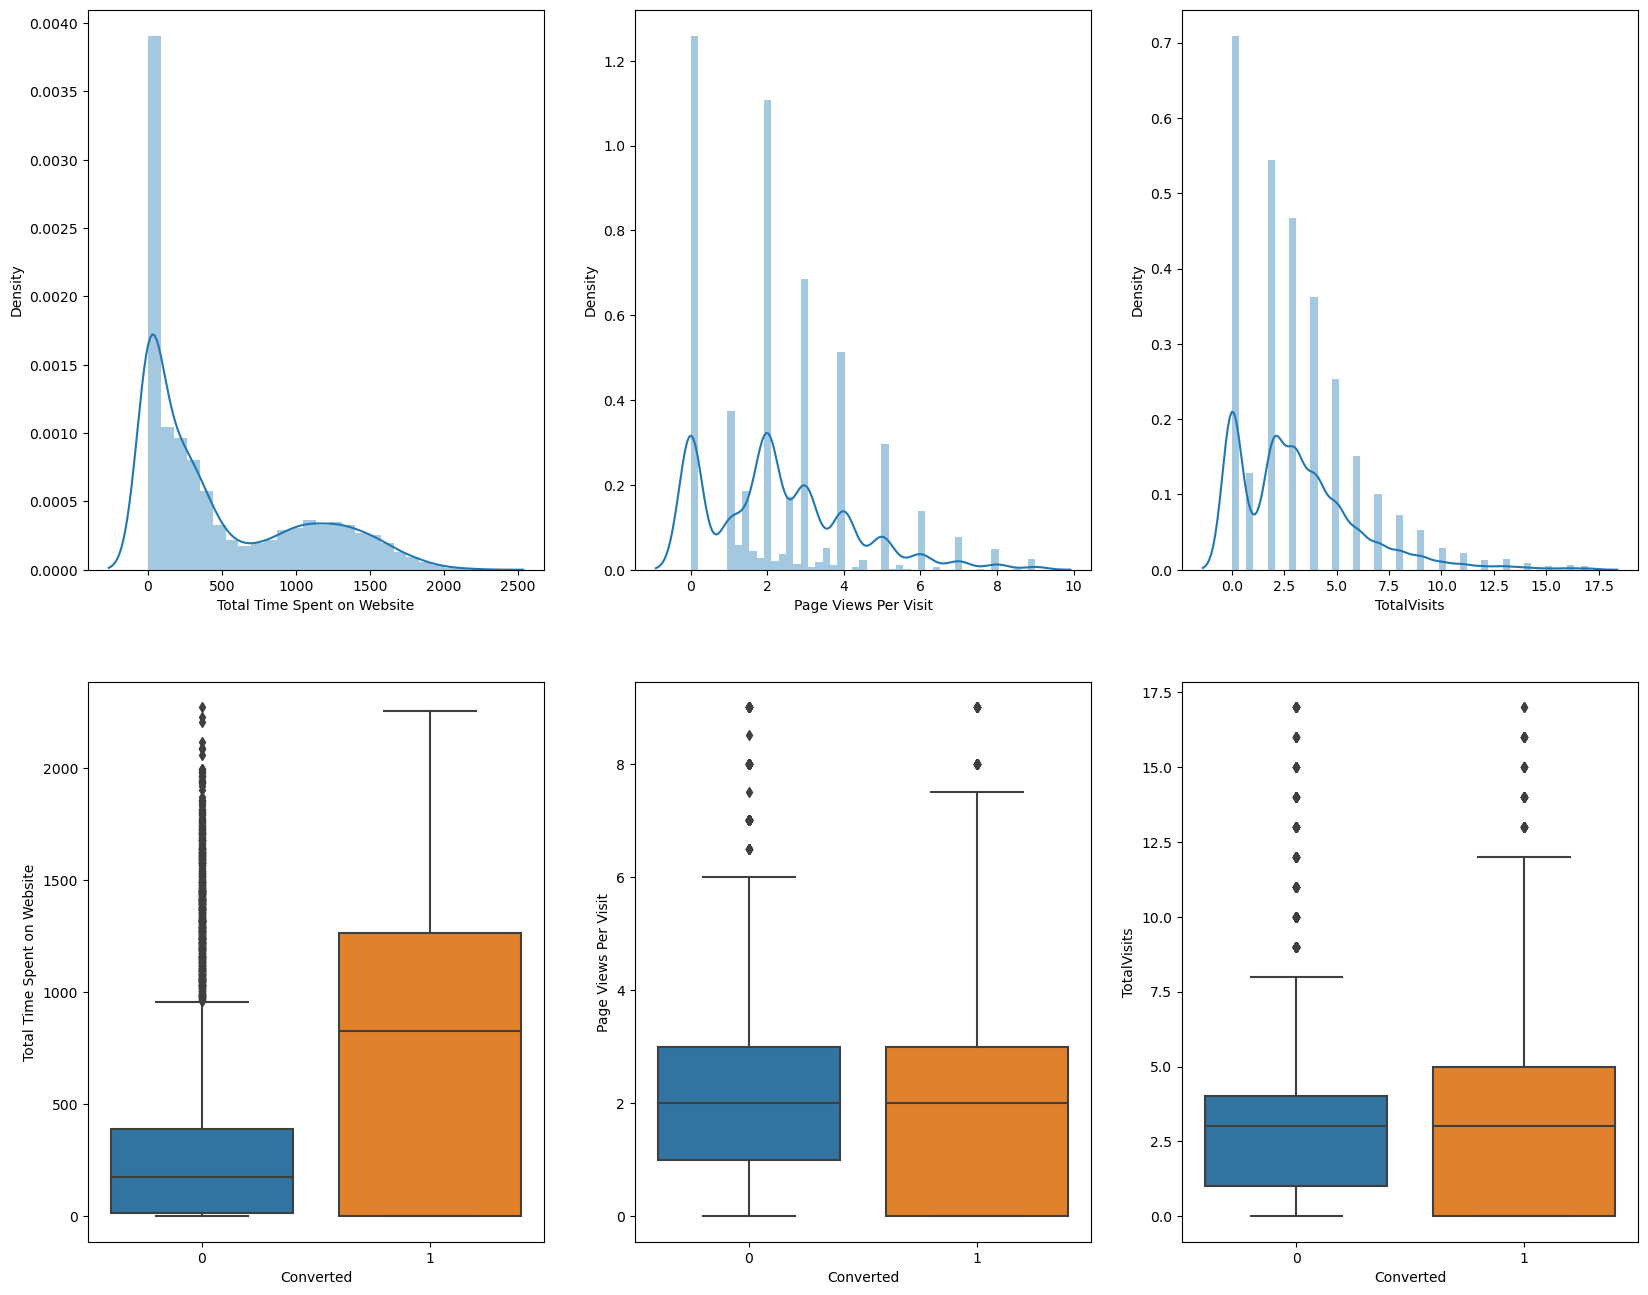

In [96]:
plt.figure(figsize=(20,16))

i=1
for col in ld_num:
    if i > 3:  # Limit to 6 subplots
        break
    plt.subplot(2,3,i)
    sns.distplot(ld[col])
    plt.subplot(2,3,3+i)
    sns.boxplot(y=ld[col], x = ld['Converted'])
    i+=1

In [97]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9090 non-null   object 
 1   Lead Source                             9090 non-null   object 
 2   Do Not Email                            9090 non-null   object 
 3   Converted                               9090 non-null   int64  
 4   TotalVisits                             9090 non-null   float64
 5   Total Time Spent on Website             9090 non-null   int64  
 6   Page Views Per Visit                    9090 non-null   float64
 7   Last Activity                           9090 non-null   object 
 8   Specialization                          9090 non-null   object 
 9   What is your current occupation         9090 non-null   object 
 10  Tags                                    9090 non-null   obje

### Conversion to Binary Variables

In [98]:
cat = cat_info(ld, ld.select_dtypes(exclude =["number"]).columns.values)
cat

values  \
columns                                                                                     
Lead Origin                             [API, Landing Page Submission, Lead Add Form, ...   
Lead Source                             [Olark Chat, Organic Search, Direct Traffic, G...   
Do Not Email                                                                    [No, Yes]   
Last Activity                           [Page Visited on Website, Email Opened, Unreac...   
Specialization                          [Not Specified, Business Administration, Media...   
What is your current occupation         [Unemployed, Student, Unknown, Working Profess...   
Tags                                    [Interested in other courses, Ringing, Will re...   
A free copy of Mastering The Interview                                          [No, Yes]   
Last Notable Activity                   [Modified, Email Opened, Page Visited on Websi...   

                                       unique_values null_values  null_percent  
columns                                                                         
Lead Origin                                        5           0           0.0  
Lead Source                                        9           0           0.0  
Do Not Email                                       2           0           0.0  
Last Activity                                     11           0           0.0  
Specialization                                    11           0           0.0  
What is your current occupation                    7           0           0.0  
Tags                                               8           0           0.0  
A free copy of Mastering The Interview             2           0           0.0  
Last Notable Activity                              7           0           0.0

Do Not Email has No and Yes Values

In [99]:
ld['Do Not Email'] = ld['Do Not Email'].replace({'No':0,'Yes':1})

In [100]:
ld['Do Not Email'].value_counts()

0    8383
1     707
Name: Do Not Email, dtype: int64

In [101]:
ld['A free copy of Mastering The Interview'] = ld['A free copy of Mastering The Interview'].replace({'No':0,'Yes':1})

In [102]:
ld['A free copy of Mastering The Interview'].value_counts()

0    6292
1    2798
Name: A free copy of Mastering The Interview, dtype: int64

### Dummy Variable Creation

In [103]:
dummy = pd.get_dummies(ld[['Lead Origin', 'What is your current occupation']], drop_first=True)
dummy1 = pd.get_dummies(ld['Specialization'], prefix  = 'Specialization')
dummy1 = dummy1.drop(['Specialization_Not Specified'], 1)
dummy2 = pd.get_dummies(ld['Lead Source'], prefix  = 'Lead Source')
dummy2 = dummy2.drop(['Lead Source_Other Sources'], 1)
dummy3 = pd.get_dummies(ld['Last Activity'], prefix  = 'Last Activity')
dummy3 = dummy3.drop(['Last Activity_Other Activity'], 1)
dummy4 = pd.get_dummies(ld['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy4 = dummy4.drop(['Last Notable Activity_Other'], 1)
dummy5 = pd.get_dummies(ld['Tags'], prefix  = 'Tags')
dummy5 = dummy5.drop(['Tags_Not Specified'], 1)

### Merging Dataframes

In [104]:
df = pd.concat([ld, dummy, dummy1, dummy2, dummy3, dummy4, dummy5 ], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 64 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin                                           9090 non-null   object 
 1   Lead Source                                           9090 non-null   object 
 2   Do Not Email                                          9090 non-null   int64  
 3   Converted                                             9090 non-null   int64  
 4   TotalVisits                                           9090 non-null   float64
 5   Total Time Spent on Website                           9090 non-null   int64  
 6   Page Views Per Visit                                  9090 non-null   float64
 7   Last Activity                                         9090 non-null   object 
 8   Specialization                                        9090

### Removing unncessary columns

In [105]:
df.drop(['Lead Origin', 'Lead Source', 'What is your current occupation', 
                             'Last Activity', 'Specialization', 
                            'Last Notable Activity', 'Tags'],axis = 1, inplace = True)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 57 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9090 non-null   int64  
 1   Converted                                             9090 non-null   int64  
 2   TotalVisits                                           9090 non-null   float64
 3   Total Time Spent on Website                           9090 non-null   int64  
 4   Page Views Per Visit                                  9090 non-null   float64
 5   A free copy of Mastering The Interview                9090 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9090 non-null   uint8  
 7   Lead Origin_Lead Add Form                             9090 non-null   uint8  
 8   Lead Origin_Lead Import                               9090

Dummy dataset 'df' has 56 columns.

### Splitting data into Train and Test Datasets

In [107]:
Y = df['Converted']
X=df.drop('Converted', axis=1)

In [108]:
# Splitting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [109]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6363 entries, 302 to 5730
Data columns (total 56 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6363 non-null   int64  
 1   TotalVisits                                           6363 non-null   float64
 2   Total Time Spent on Website                           6363 non-null   int64  
 3   Page Views Per Visit                                  6363 non-null   float64
 4   A free copy of Mastering The Interview                6363 non-null   int64  
 5   Lead Origin_Landing Page Submission                   6363 non-null   uint8  
 6   Lead Origin_Lead Add Form                             6363 non-null   uint8  
 7   Lead Origin_Lead Import                               6363 non-null   uint8  
 8   Lead Origin_Quick Add Form                            63

In [110]:
scaler = StandardScaler()
num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
302      -0.289166     1.336782                    -0.428736   
6087      3.458217    -1.094877                    -0.887355   
1033     -0.289166     0.642022                    -0.025151   
7656      3.458217     0.989402                    -0.241619   
3241     -0.289166     0.294642                     0.897591   

      Page Views Per Visit  A free copy of Mastering The Interview  \
302               0.044021                               -0.659091   
6087             -1.206716                               -0.659091   
1033              1.477269                               -0.659091   
7656              2.014065                                1.517242   
3241             -0.492776                                1.517242   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
302                                     0                          0   
6087                                    0                          0   
1033                                    0                          0   
7656                                    1                          0   
3241                                    1                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
302                         0                           0   
6087                        0                           0   
1033                        0                           0   
7656                        0                           0   
3241                        0                           0   

      What is your current occupation_Housewife  ...  \
302                                           0  ...   
6087                                          0  ...   
1033                                          0  ...   
7656                                          0  ...   
3241                                          0  ...   

      Last Notable Activity_Olark Chat Conversation  \
302                                               0   
6087                                              0   
1033                                              0   
7656                                              0   
3241                                              0   

      Last Notable Activity_Page Visited on Website  \
302                                               0   
6087                                              0   
1033                                              0   
7656                                              0   
3241                                              0   

      Last Notable Activity_SMS Sent  Tags_Busy  Tags_Closed by Horizzon  \
302                                0          0                        0   
6087                               0          0                        0   
1033                               0          0                        0   
7656                               1          0                        0   
3241                               1          0                        0   

      Tags_Interested in other courses  Tags_Lost to EINS  Tags_Other Tags  \
302                                  0                  0                0   
6087                                 0                  0                0   
1033                                 0                  0                0   
7656                                 0                  0                0   
3241                                 0                  0                0   

      Tags_Ringing  Tags_Will revert after reading the email  
302              0                                         0  
6087             0                                         0  
1033             0                                         0  
7656             1                                         0  
3241             0                                         1  

[5 rows x 56 columns]

---------------------------------------------------------------------------------------------------------------------------

#  Building Model

### Recursive Feature Elimination (RFE)

In [111]:
lr = LogisticRegression()

rfe = RFE(lr, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, Y_train)

In [112]:
rfe.support_

array([False, False,  True, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True])

In [113]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 17),
 ('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 27),
 ('A free copy of Mastering The Interview', False, 31),
 ('Lead Origin_Landing Page Submission', False, 12),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 39),
 ('Lead Origin_Quick Add Form', False, 23),
 ('What is your current occupation_Housewife', False, 11),
 ('What is your current occupation_Other', False, 15),
 ('What is your current occupation_Student', False, 42),
 ('What is your current occupation_Unemployed', False, 24),
 ('What is your current occupation_Unknown', True, 1),
 ('What is your current occupation_Working Professional', False, 8),
 ('Specialization_Banking, Investment And Insurance', False, 32),
 ('Specialization_Business Administration', False, 28),
 ('Specialization_E-Business', False, 35),
 ('Specialization_E-COMMERCE', False, 13),
 ('Specialization_International Business', False, 38),
 ('Spec

In [114]:
rc = X_train.columns[rfe.support_]
rc

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Unknown',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_SMS Sent', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [115]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'L

In [116]:
# Creating X_train dataframe with RFE selected variables
X_train_1 = X_train[rc]

### Building Functions

In [117]:
def glm(f): # to run ols regression on every new model
    X_train_sm = sm.add_constant(f)
    logm = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial()).fit()
    return logm.summary()
def glm_1(f): # to run ols regression on every new model
    X_train_sm = sm.add_constant(f)
    logm = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial()).fit()
    return logm, X_train_sm
def vif(X_train): # to calculate vif of the model
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return (vif)

### Model 1

In [118]:
glm(X_train_1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1111.3
Date:                Thu, 24 Aug 2023   Deviance:                       2222.6
Time:                        23:58:12   Pearson chi2:                 1.24e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6248
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.5789      0.134      4.308      0.000       0.316       0.842
Total Time Spent on Website                       0.8896      0.057     15.734      0.000       0.779       1.000
Lead Origin_Lead Add Form                         1.0214      0.354      2.887      0.004       0.328       1.715
What is your current occupation_Unknown          -2.7508      0.160    -17.195      0.000      -3.064      -2.437
Lead Source_Welingak Website                      3.0379      1.082      2.807      0.005       0.916       5.159
Last Activity_Email Bounced                      -1.8090      0.447     -4.050      0.000      -2.684      -0.933
Last Activity_SMS Sent                            1.9487      0.127     15.356      0.000       1.700       2.197
Last Notable Activity_Modified                   -1.4876      0.134    -11.115      0.000      -1.750      -1.225
Last Notable Activity_Olark Chat Conversation    -1.8378      0.482     -3.810      0.000      -2.783      -0.892
Tags_Busy                                        -1.5837      0.257     -6.170      0.000      -2.087      -1.081
Tags_Closed by Horizzon                           4.7051      0.743      6.332      0.000       3.249       6.161
Tags_Interested in other courses                 -4.0402      0.429     -9.409      0.000      -4.882      -3.199
Tags_Lost to EINS                                 6.2537      0.798      7.838      0.000       4.690       7.818
Tags_Other Tags                                  -4.6505      0.258    -18.011      0.000      -5.157      -4.144
Tags_Ringing                                     -5.2277      0.264    -19.790      0.000      -5.745      -4.710
Tags_Will revert after reading the email          2.3531      0.202     11.656      0.000       1.957       2.749
=================================================================================================================
"""

In [119]:
vif(X_train_1)

Features   VIF
6                  Last Notable Activity_Modified  1.92
1                       Lead Origin_Lead Add Form  1.78
5                          Last Activity_SMS Sent  1.57
14       Tags_Will revert after reading the email  1.55
2         What is your current occupation_Unknown  1.49
3                    Lead Source_Welingak Website  1.31
9                         Tags_Closed by Horizzon  1.31
12                                Tags_Other Tags  1.23
0                     Total Time Spent on Website  1.20
10               Tags_Interested in other courses  1.14
13                                   Tags_Ringing  1.13
4                     Last Activity_Email Bounced  1.09
7   Last Notable Activity_Olark Chat Conversation  1.06
11                              Tags_Lost to EINS  1.06
8                                       Tags_Busy  1.05

### Model 2

In [120]:
X_train_2 = X_train_1.drop('Lead Origin_Lead Add Form', axis = 1)

In [121]:
X_train_2

Total Time Spent on Website  What is your current occupation_Unknown  \
302                     -0.428736                                        1   
6087                    -0.887355                                        1   
1033                    -0.025151                                        0   
7656                    -0.241619                                        0   
3241                     0.897591                                        0   
...                           ...                                      ...   
360                     -0.887355                                        0   
81                      -0.252626                                        0   
8171                     1.130570                                        0   
7048                     1.374555                                        0   
5730                    -0.832321                                        0   

      Lead Source_Welingak Website  Last Activity_Email Bounced  \
302                              0                            0   
6087                             0                            1   
1033                             0                            0   
7656                             0                            0   
3241                             0                            0   
...                            ...                          ...   
360                              0                            0   
81                               1                            0   
8171                             0                            0   
7048                             0                            0   
5730                             0                            0   

      Last Activity_SMS Sent  Last Notable Activity_Modified  \
302                        0                               0   
6087                       0                               1   
1033                       0                               0   
7656                       1                               0   
3241                       1                               0   
...                      ...                             ...   
360                        0                               1   
81                         0                               1   
8171                       0                               0   
7048                       0                               0   
5730                       0                               0   

      Last Notable Activity_Olark Chat Conversation  Tags_Busy  \
302                                               0          0   
6087                                              0          0   
1033                                              0          0   
7656                                              0          0   
3241                                              0          0   
...                                             ...        ...   
360                                               0          0   
81                                                0          0   
8171                                              1          0   
7048                                              0          0   
5730                                              0          0   

      Tags_Closed by Horizzon  Tags_Interested in other courses  \
302                         0                                 0   
6087                        0                                 0   
1033                        0                                 0   
7656                        0                                 0   
3241                        0                                 0   
...                       ...                               ...   
360                         0                                 1   
81                          0                                 0   
8171                        0                                 0   
7048                        0   

In [122]:
glm(X_train_2)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1116.0
Date:                Thu, 24 Aug 2023   Deviance:                       2231.9
Time:                        23:58:12   Pearson chi2:                 1.28e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6243
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.5979      0.134      4.463      0.000       0.335       0.860
Total Time Spent on Website                       0.8703      0.056     15.472      0.000       0.760       0.981
What is your current occupation_Unknown          -2.7710      0.160    -17.369      0.000      -3.084      -2.458
Lead Source_Welingak Website                      4.0174      1.027      3.910      0.000       2.004       6.031
Last Activity_Email Bounced                      -1.7791      0.440     -4.040      0.000      -2.642      -0.916
Last Activity_SMS Sent                            1.9618      0.126     15.530      0.000       1.714       2.209
Last Notable Activity_Modified                   -1.4851      0.134    -11.119      0.000      -1.747      -1.223
Last Notable Activity_Olark Chat Conversation    -1.8764      0.488     -3.845      0.000      -2.833      -0.920
Tags_Busy                                        -1.6027      0.257     -6.244      0.000      -2.106      -1.100
Tags_Closed by Horizzon                           5.2193      0.730      7.150      0.000       3.789       6.650
Tags_Interested in other courses                 -4.0373      0.429     -9.405      0.000      -4.879      -3.196
Tags_Lost to EINS                                 6.2544      0.794      7.876      0.000       4.698       7.811
Tags_Other Tags                                  -4.6607      0.258    -18.076      0.000      -5.166      -4.155
Tags_Ringing                                     -5.2183      0.264    -19.773      0.000      -5.736      -4.701
Tags_Will revert after reading the email          2.5194      0.197     12.770      0.000       2.133       2.906
=================================================================================================================
"""

In [123]:
vif(X_train_2)

Features   VIF
5                  Last Notable Activity_Modified  1.91
4                          Last Activity_SMS Sent  1.56
1         What is your current occupation_Unknown  1.49
13       Tags_Will revert after reading the email  1.40
11                                Tags_Other Tags  1.23
9                Tags_Interested in other courses  1.14
12                                   Tags_Ringing  1.13
0                     Total Time Spent on Website  1.12
8                         Tags_Closed by Horizzon  1.10
3                     Last Activity_Email Bounced  1.09
6   Last Notable Activity_Olark Chat Conversation  1.06
2                    Lead Source_Welingak Website  1.05
7                                       Tags_Busy  1.05
10                              Tags_Lost to EINS  1.05

---------------------------------------------------------------------------------------------------------------------------

# Model Interpretation on Train Dataset

### Evaluation Matrix Definitions 

<center><b> Confusion Matrix</b></center>

|                             | Predicted Negative (0)   | Predicted Positive (1)   |
|-----------------------------|--------------------------|--------------------------|
| Actual Negative (0)         | True Negative (TN)       | False Positive (FP)      |
| Actual Positive (1)         | False Negative (FN)      | True Positive (TP)       |


#### Accuracy = $\frac{\textbf{TP} \, + \, \textbf{TN}}{\textbf{TP} \, + \, \textbf{TN} \, + \, \textbf{FP} \, + \, \textbf{FN}}$

#### Sensitivity = $\frac{\textbf{TP}}{\textbf{TP} \, + \, \textbf{FN}}$

#### Specificity = $\frac{\textbf{TN}}{\textbf{TN} \, + \, \textbf{FP}}$

#### Precision = $\frac{\textbf{TP}}{\textbf{TP} \, + \, \textbf{FP}}$

#### Recall = $\frac{\textbf{TP}}{\textbf{TP} \, + \, \textbf{FN}}$

#### F Measure (F1) = $2 \, \cdot \, \frac{(\textbf{Precision} \, \cdot \, \textbf{Recall})}{\textbf{Precision} \, + \, \textbf{Recall}}$

#### TPR (True Positive Rate) = $\frac{\textbf{TP}}{\textbf{TP} \, + \, \textbf{FN}}$

#### TNR (True Negative Rate) = $\frac{\textbf{TN}}{\textbf{TN} \, + \, \textbf{FP}}$

#### FPR (False Positive Rate) = $\frac{\textbf{FP}}{\textbf{TN} \, + \, \textbf{FP}}$

#### FNR (False Negative Rate) = $\frac{\textbf{FN}}{\textbf{TP} \, + \, \textbf{FN}}$


In [124]:
# Create a matrix to Print the Accuracy, Sensitivity and Specificity
def metric(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    speci = TN/(TN+FP)
    sensi = TP/(TP+FN)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    FPR = FP/(TN + FP)
    FNR = FN/(TP + FN)
    pos_pred_val = TP /(TP+FP)
    neg_pred_val = TN /(TN+FN)
    
    print ("Model Accuracy value is              : ", round(accuracy*100,2),"%")
    print ("Model Sensitivity value is           : ", round(sensi*100,2),"%")
    print ("Model Specificity value is           : ", round(speci*100,2),"%")
    print ("Model Precision value is             : ", round(precision*100,2),"%")
    print ("Model Recall value is                : ", round(recall*100,2),"%")
    print ("Model True Positive Rate (TPR)       : ", round(TPR*100,2),"%")
    print ("Model False Positive Rate (FPR)      : ", round(FPR*100,2),"%")
    print ("Model Poitive Prediction Value is    : ", round(pos_pred_val*100,2),"%")
    print ("Model Negative Prediction value is   : ", round(neg_pred_val*100,2),"%")

### Predicted Probability Calculation

In [125]:
fin, X_train_sm = glm_1(X_train_2)

In [126]:
# Getting the predicted values on the train set
Y_train_pred = fin.predict(X_train_sm)
Y_train_pred[:10]

302     0.072679
6087    0.002006
1033    0.640142
7656    0.053711
3241    0.997157
5738    0.052515
7366    0.001796
3680    0.014581
4170    0.996951
43      0.069723
dtype: float64

In [127]:
Y_train_pred = Y_train_pred.values.reshape(-1)
Y_train_pred[:10]

array([0.07267869, 0.00200604, 0.64014247, 0.05371125, 0.99715748,
       0.05251475, 0.00179638, 0.01458118, 0.99695123, 0.06972268])

In [128]:
#Creating a dataframe with the actual Converted flag and the Predicted probabilities
Y_train_pred_final = pd.DataFrame({'Conv_act':Y_train.values, 'Conv_pred':Y_train_pred})
Y_train_pred_final['Prospect_IND'] = Y_train.index
Y_train_pred_final.head()

Conv_act  Conv_pred  Prospect_IND
0         0   0.072679           302
1         0   0.002006          6087
2         0   0.640142          1033
3         0   0.053711          7656
4         1   0.997157          3241

In [129]:
#Finding Optimal Cutoff Point

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    Y_train_pred_final[i]= Y_train_pred_final.Conv_pred.map(lambda x: 1 if x > i else 0)
Y_train_pred_final.head()

Conv_act  Conv_pred  Prospect_IND  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0         0   0.072679           302    1    0    0    0    0    0    0    0   
1         0   0.002006          6087    1    0    0    0    0    0    0    0   
2         0   0.640142          1033    1    1    1    1    1    1    1    0   
3         0   0.053711          7656    1    0    0    0    0    0    0    0   
4         1   0.997157          3241    1    1    1    1    1    1    1    1   

   0.8  0.9  
0    0    0  
1    0    0  
2    0    0  
3    0    0  
4    1    1

In [130]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity','Precision','Recall'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(Y_train_pred_final['Conv_act'], Y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    prec, rec, thresholds = precision_recall_curve(Y_train_pred_final['Conv_act'], Y_train_pred_final[i])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci, prec[1], rec[1]]
cutoff_df

Probability  Accuracy  Sensitivity  Specificity  Precision    Recall
0.0          0.0  0.381581     1.000000     0.000000   1.000000  0.000000
0.1          0.1  0.888575     0.969934     0.838374   0.787362  0.969934
0.2          0.2  0.920321     0.955519     0.898602   0.853255  0.955519
0.3          0.3  0.929436     0.934102     0.926557   0.886977  0.934102
0.4          0.4  0.936351     0.920511     0.946125   0.913363  0.920511
0.5          0.5  0.934151     0.894563     0.958577   0.930193  0.894563
0.6          0.6  0.931636     0.874794     0.966709   0.941907  0.874794
0.7          0.7  0.930379     0.855437     0.976620   0.957584  0.855437
0.8          0.8  0.920635     0.817957     0.983990   0.969253  0.817957
0.9          0.9  0.900047     0.755354     0.989327   0.977612  0.755354

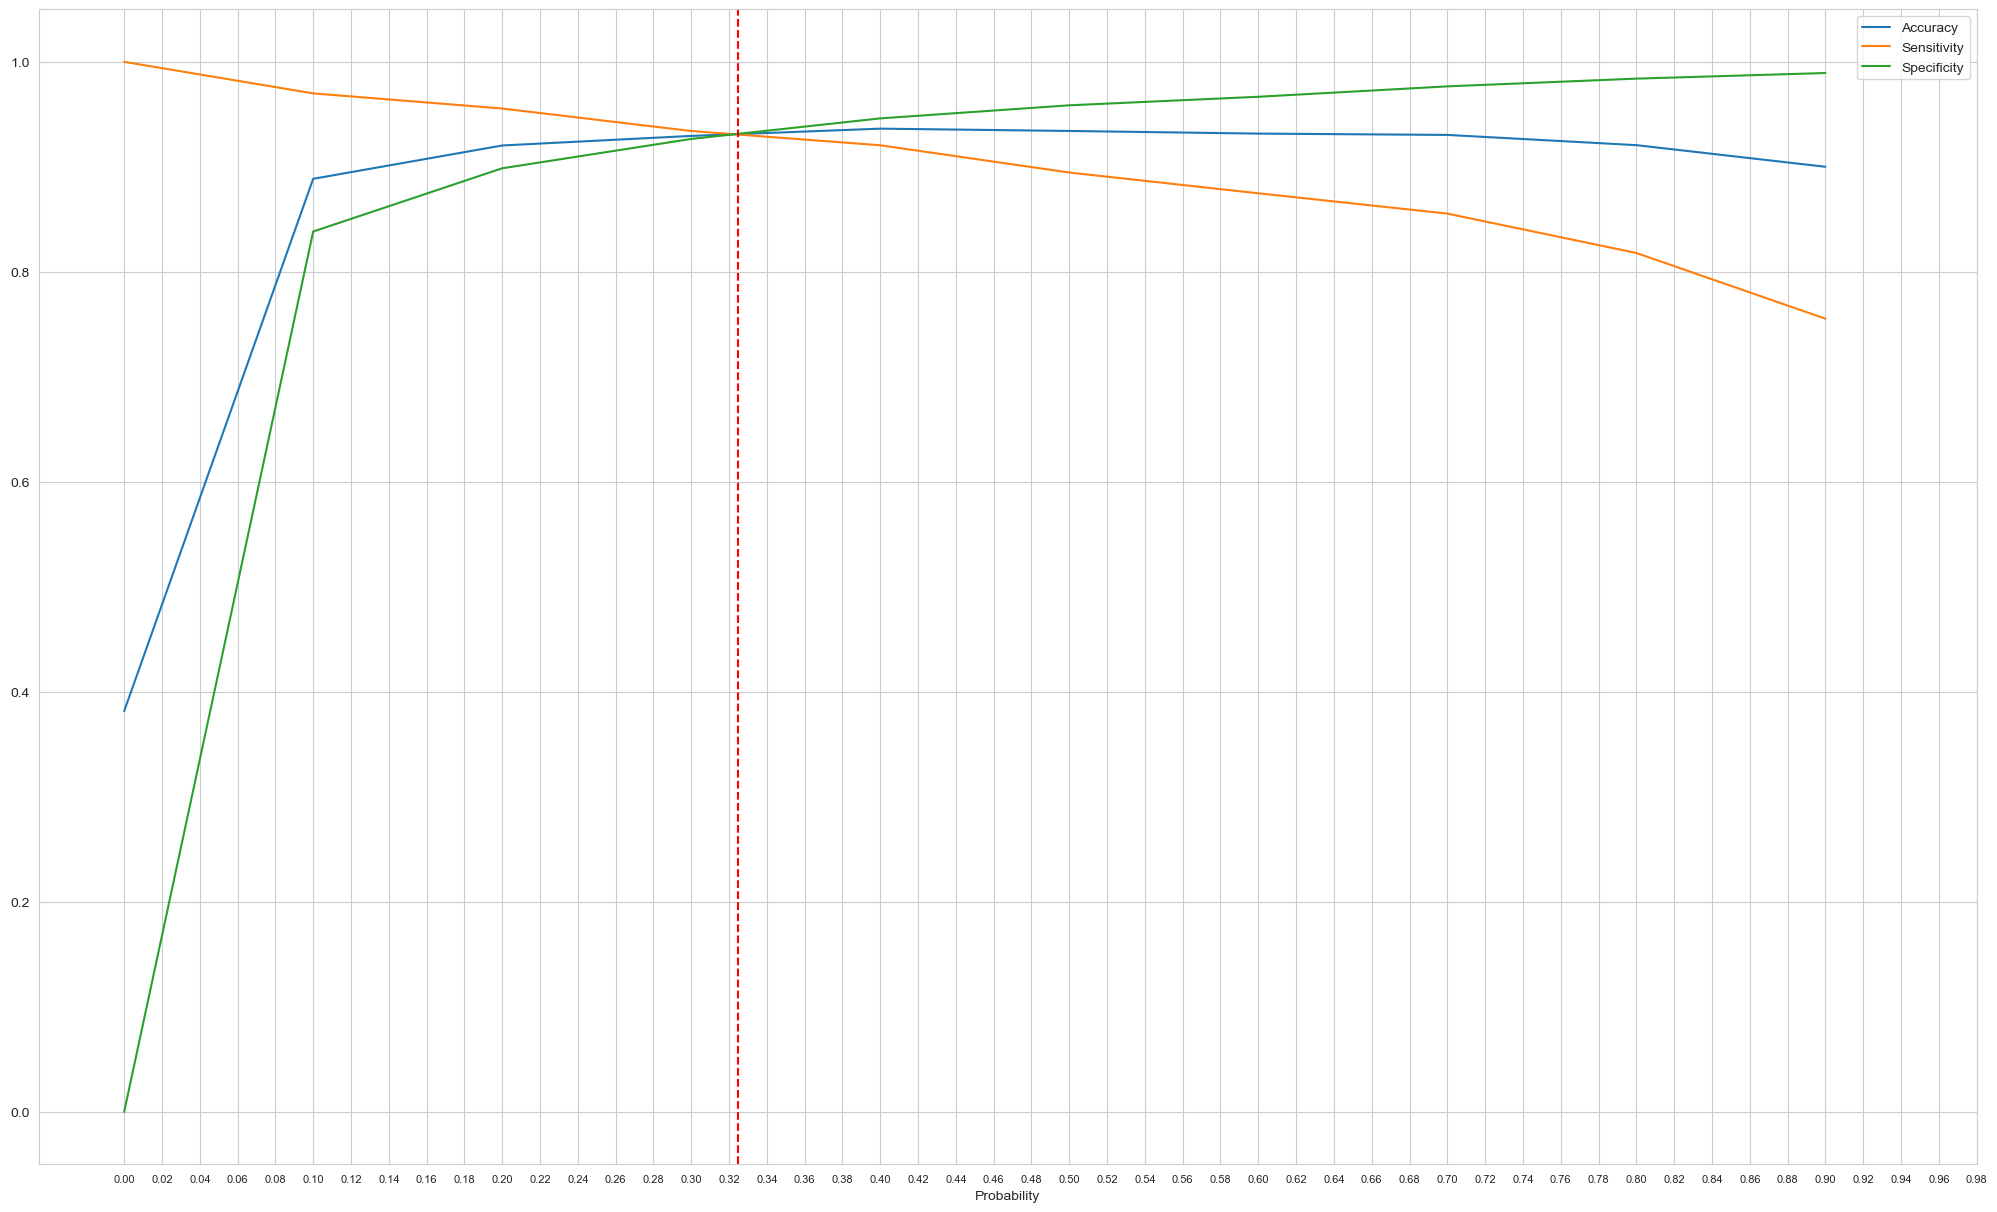

In [131]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
sns.set_style("whitegrid")
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.xticks(np.arange(0,1,step=0.02),size=8)
plt.axvline(x=0.325, color='r', linestyle='--') # additing axline
plt.gcf().set_size_inches(25, 15)
plt.show()

From the above graph, 0.325 seems to be ideal cut-off point.

In [132]:
Y_train_pred_final['pred_1'] = Y_train_pred_final['Conv_pred'].map( lambda x: 1 if x > 0.325 else 0)
Y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) # deleting the unnecessary columns
Y_train_pred_final.head()

Conv_act  Conv_pred  Prospect_IND  pred_1
0         0   0.072679           302       0
1         0   0.002006          6087       0
2         0   0.640142          1033       1
3         0   0.053711          7656       0
4         1   0.997157          3241       1

In [133]:
# Let's assign Lead_score for the leads in Train Data Set
Y_train_pred_final['lead_score_1']=(Y_train_pred_final['Conv_pred']*100).astype("int64")
Y_train_pred_final.sort_values(by='Conv_pred',ascending=False)

Conv_act  Conv_pred  Prospect_IND  pred_1  lead_score_1
2442         1   0.999974          4830       1            99
2927         1   0.999974          4693       1            99
2207         1   0.999974          2354       1            99
2800         1   0.999966          4062       1            99
4374         1   0.999950          6620       1            99
...        ...        ...           ...     ...           ...
3506         0   0.000210          1590       0             0
1122         0   0.000210          2477       0             0
2595         0   0.000208            72       0             0
178          0   0.000181          2898       0             0
1284         0   0.000174          3678       0             0

[6363 rows x 5 columns]

### Confusion Matrix

In [134]:
# Function for Confusion Matrix :
def cm( actual, predicted, cmap ): 
    cm = metrics.confusion_matrix( actual, predicted) 
    sns.heatmap(cm, annot=True, fmt='.0f', cmap=cmap,
    xticklabels = ["Not Converted", "Converted"] ,
    yticklabels = ["Not Converted", "Converted"] ) 
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels') 
    plt.show()

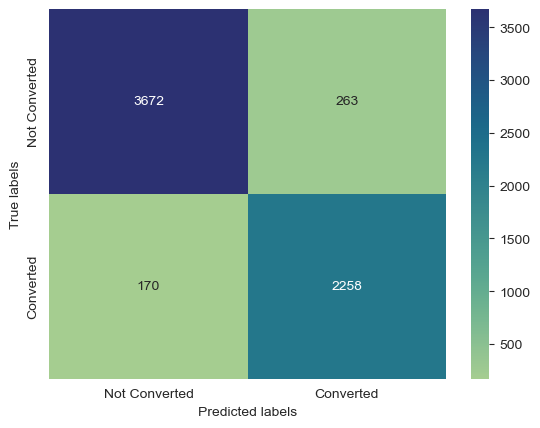

In [135]:
#Plotting the Confusion Matrix
cm(Y_train_pred_final['Conv_act'], Y_train_pred_final['pred_1'], "crest")

In [136]:
conf_matrix = confusion_matrix(Y_train_pred_final['Conv_act'], Y_train_pred_final['pred_1'] )
metric(conf_matrix)

Model Accuracy value is              :  93.2 %
Model Sensitivity value is           :  93.0 %
Model Specificity value is           :  93.32 %
Model Precision value is             :  89.57 %
Model Recall value is                :  93.0 %
Model True Positive Rate (TPR)       :  93.0 %
Model False Positive Rate (FPR)      :  6.68 %
Model Poitive Prediction Value is    :  89.57 %
Model Negative Prediction value is   :  95.58 %


In [137]:
# Classification Record : Precision, Recall and F1 Score
print( metrics.classification_report( Y_train_pred_final['Conv_act'], Y_train_pred_final['pred_1'] ) )

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      3935
           1       0.90      0.93      0.91      2428

    accuracy                           0.93      6363
   macro avg       0.93      0.93      0.93      6363
weighted avg       0.93      0.93      0.93      6363



In [138]:
print("F1 Score: {}".format(f1_score(Y_train_pred_final['Conv_act'], Y_train_pred_final['pred_1'])))

F1 Score: 0.9125075772883411


The model with cut off value at 0.325 is providing an Accuracy of 93.2%, Sensitivity of 93%. Sensitivity in this case indicates how many leads the model identify correctly out of all potential leads which are converting.

### ROC Curve


An ROC curve demonstrates several things:

• It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity)

• The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

• The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.



In [139]:
# Function to plot ROC Curve
def roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs,drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [140]:
# Recording the values FPR, TPR and Thresholds:
fpr, tpr, thresholds = metrics.roc_curve(Y_train_pred_final['Conv_act'],
                                         Y_train_pred_final['Conv_pred'] , drop_intermediate = False )

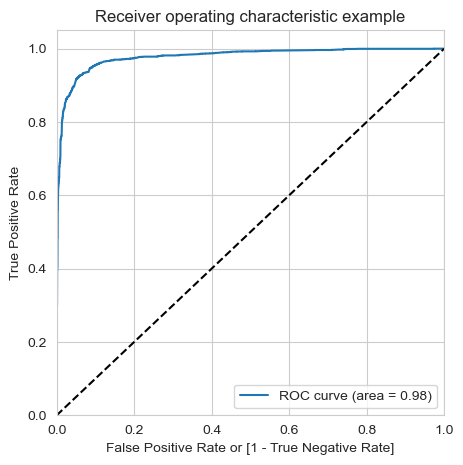

In [141]:
roc(Y_train_pred_final['Conv_act'], Y_train_pred_final['Conv_pred'])

ROC Curve aread is 0.98, which indicates that the model is very good. 

### Precision - Recall Trade off

Precision- Recall trade is used to see if balancing these values provides better output.
Precision means out of all leads which are predicted at 1, how many have truly converted.
Recall means out of all leads that have converted, how many of them were correctly identifies as 1. This is the same value as sensitivity.

In [142]:
p, r, t = precision_recall_curve(Y_train_pred_final['Conv_act'], Y_train_pred_final['Conv_pred'])

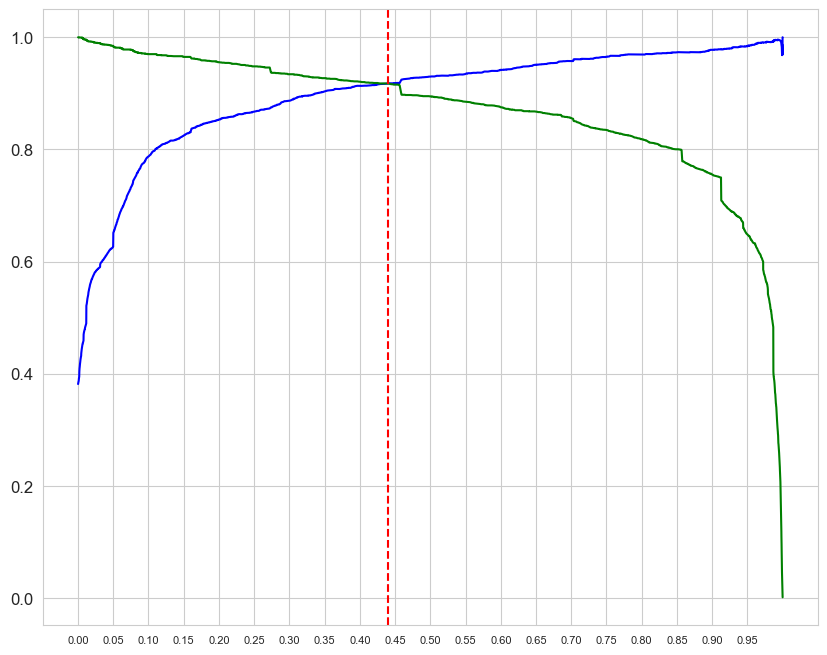

In [143]:
# Plotting the Precision-Recall Trade off Curve
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
plt.plot(t, p[:-1], "b-")
plt.plot(t, r[:-1], "g-")
plt.axvline(x=0.44, color='r', linestyle='--') # additing axline
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.yticks(size=12)
plt.show()

Based on Precision- Recall Trade off curve, the cutoff point seems to 0.44. 

In [144]:
# plotting the Train dataset again with 0.44 as cutoff
Y_train_pred_final['pred_2'] = Y_train_pred_final['Conv_pred'].map( lambda x: 1 if x > 0.44 else 0)
Y_train_pred_final.head()

Conv_act  Conv_pred  Prospect_IND  pred_1  lead_score_1  pred_2
0         0   0.072679           302       0             7       0
1         0   0.002006          6087       0             0       0
2         0   0.640142          1033       1            64       1
3         0   0.053711          7656       0             5       0
4         1   0.997157          3241       1            99       1

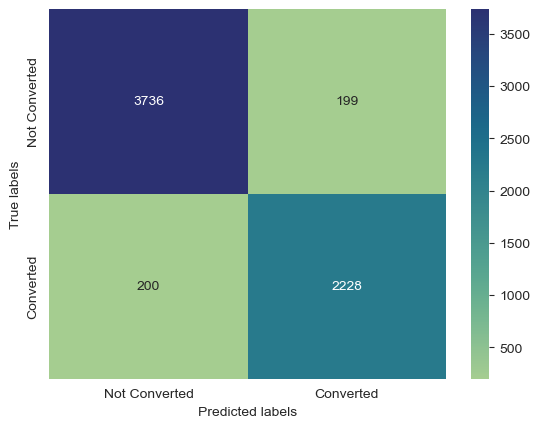

In [145]:
#Plotting the Confusion Matrix
cm(Y_train_pred_final['Conv_act'], Y_train_pred_final['pred_2'], "crest")

In [146]:
#Data based on cutoff received from Precision-Recall Trade off
conf_matrix = confusion_matrix(Y_train_pred_final['Conv_act'], Y_train_pred_final['pred_2'] )
metric(conf_matrix)

Model Accuracy value is              :  93.73 %
Model Sensitivity value is           :  91.76 %
Model Specificity value is           :  94.94 %
Model Precision value is             :  91.8 %
Model Recall value is                :  91.76 %
Model True Positive Rate (TPR)       :  91.76 %
Model False Positive Rate (FPR)      :  5.06 %
Model Poitive Prediction Value is    :  91.8 %
Model Negative Prediction value is   :  94.92 %


In [147]:
# Classification Record : Precision, Recall and F1 Score
print( metrics.classification_report(Y_train_pred_final['Conv_act'], Y_train_pred_final['pred_2']))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3935
           1       0.92      0.92      0.92      2428

    accuracy                           0.94      6363
   macro avg       0.93      0.93      0.93      6363
weighted avg       0.94      0.94      0.94      6363



---------------------------------------------------------------------------------------------------------------------------

# Model Interpretation on Test Dataset

In [148]:
# Scaling the test dataset :
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])
X_test.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
6906     -0.293294     0.306196                     1.891958   
1873     -0.293294    -0.386173                    -0.542475   
771      -0.293294     1.344750                    -0.790628   
4495     -0.293294     0.306196                    -0.618551   
9061     -0.293294    -0.386173                     2.359282   

      Page Views Per Visit  A free copy of Mastering The Interview  \
6906             -0.154745                               -0.685047   
1873             -0.154745                               -0.685047   
771               2.446282                               -0.685047   
4495              0.885666                                1.459755   
9061             -0.154745                                1.459755   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
6906                                    1                          0   
1873                                    1                          0   
771                                     0                          0   
4495                                    1                          0   
9061                                    1                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
6906                        0                           0   
1873                        0                           0   
771                         0                           0   
4495                        0                           0   
9061                        0                           0   

      What is your current occupation_Housewife  ...  \
6906                                          0  ...   
1873                                          0  ...   
771                                           0  ...   
4495                                          0  ...   
9061                                          0  ...   

      Last Notable Activity_Olark Chat Conversation  \
6906                                              0   
1873                                              0   
771                                               0   
4495                                              0   
9061                                              0   

      Last Notable Activity_Page Visited on Website  \
6906                                              0   
1873                                              0   
771                                               0   
4495                                              0   
9061                                              0   

      Last Notable Activity_SMS Sent  Tags_Busy  Tags_Closed by Horizzon  \
6906                               1          0                        0   
1873                               0          0                        0   
771                                0          0                        0   
4495                               0          0                        0   
9061                               0          0                        0   

      Tags_Interested in other courses  Tags_Lost to EINS  Tags_Other Tags  \
6906                                 0                  0                0   
1873                                 1                  0                0   
771                                  0                  0                0   
4495                                 0                  0                0   
9061                                 0                  1                0   

      Tags_Ringing  Tags_Will revert after reading the email  
6906             0                                         1  
1873             0                                         0  
771              1                                         0  
4495             1                                         0  
9061             0                                         0  

[5 rows x 56 columns]

In [149]:
rc1 = rc.drop('Lead Origin_Lead Add Form',1)

In [150]:
X_test = X_test[rc1]
X_test.head()

Total Time Spent on Website  What is your current occupation_Unknown  \
6906                     1.891958                                        0   
1873                    -0.542475                                        0   
771                     -0.790628                                        0   
4495                    -0.618551                                        0   
9061                     2.359282                                        1   

      Lead Source_Welingak Website  Last Activity_Email Bounced  \
6906                             0                            0   
1873                             0                            0   
771                              0                            0   
4495                             0                            0   
9061                             0                            0   

      Last Activity_SMS Sent  Last Notable Activity_Modified  \
6906                       1                               0   
1873                       1                               1   
771                        0                               0   
4495                       0                               0   
9061                       0                               1   

      Last Notable Activity_Olark Chat Conversation  Tags_Busy  \
6906                                              0          0   
1873                                              0          0   
771                                               0          0   
4495                                              0          0   
9061                                              0          0   

      Tags_Closed by Horizzon  Tags_Interested in other courses  \
6906                        0                                 0   
1873                        0                                 1   
771                         0                                 0   
4495                        0                                 0   
9061                        0                                 0   

      Tags_Lost to EINS  Tags_Other Tags  Tags_Ringing  \
6906                  0                0             0   
1873                  0                0             0   
771                   0                0             1   
4495                  0                0             1   
9061                  1                0             0   

      Tags_Will revert after reading the email  
6906                                         1  
1873                                         0  
771                                          0  
4495                                         0  
9061                                         0

In [151]:
#adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.columns
# Predicting the final test model 
Y_test_pred = fin.predict(X_test_sm)
#checking the top 10 rows
Y_test_pred[:10]

6906    0.998802
1873    0.031223
771     0.004925
4495    0.005716
9061    0.990525
4929    0.183270
2308    0.020875
1034    0.037935
9033    0.004894
7008    0.986892
dtype: float64

In [152]:
# Converting y_pred to a dataframe 
Y_test_pred = pd.DataFrame(Y_test_pred)
Y_test_pred.head()

0
6906  0.998802
1873  0.031223
771   0.004925
4495  0.005716
9061  0.990525

In [153]:
# Converting Y_test to dataframe
Y_test_df = pd.DataFrame(Y_test)
Y_test_df.head()

Converted
6906          1
1873          0
771           0
4495          0
9061          1

In [154]:
# Putting CustID to index
Y_test_df['Prospect_IND'] = Y_test_df.index

# Removing index for both dataframes to append them side by side 
Y_test_pred.reset_index(drop=True, inplace=True)
Y_test_df.reset_index(drop=True, inplace=True)

# Appending Y_test_df and Y_pred_1
Y_pred_final = pd.concat([Y_test_df, Y_test_pred],axis=1)
Y_pred_final.head()

Converted  Prospect_IND         0
0          1          6906  0.998802
1          0          1873  0.031223
2          0           771  0.004925
3          0          4495  0.005716
4          1          9061  0.990525

In [155]:
# Renaming the column 
Y_pred_final= Y_pred_final.rename(columns={ 0 : 'Conv_pred'})
Y_pred_final= Y_pred_final.rename(columns={ 'Converted' : 'Conv_act'})

# Rearranging the columns
Y_pred_final = Y_pred_final.reindex(['Prospect_IND','Conv_act','Conv_pred'], axis=1)
Y_pred_final.head()

Prospect_IND  Conv_act  Conv_pred
0          6906         1   0.998802
1          1873         0   0.031223
2           771         0   0.004925
3          4495         0   0.005716
4          9061         1   0.990525

In [156]:
# using Cutoff point of 0.325 from Sentivity - Specificity - Accuracy cut-off points 
Y_pred_final['predn'] = Y_pred_final.Conv_pred.map(lambda x: 1 if x > 0.325 else 0)
Y_pred_final.head()

Prospect_IND  Conv_act  Conv_pred  predn
0          6906         1   0.998802      1
1          1873         0   0.031223      0
2           771         0   0.004925      0
3          4495         0   0.005716      0
4          9061         1   0.990525      1

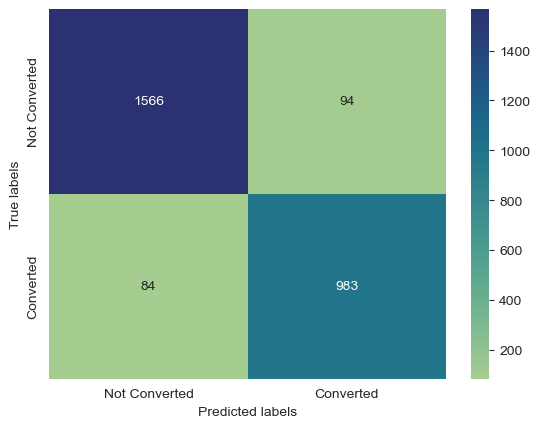

In [157]:
#Plotting the Confusion Matrix
cm(Y_pred_final['Conv_act'], Y_pred_final['predn'], "crest")

In [158]:
conf_matrix = confusion_matrix(Y_pred_final['Conv_act'], Y_pred_final['predn'])
metric(conf_matrix)

Model Accuracy value is              :  93.47 %
Model Sensitivity value is           :  92.13 %
Model Specificity value is           :  94.34 %
Model Precision value is             :  91.27 %
Model Recall value is                :  92.13 %
Model True Positive Rate (TPR)       :  92.13 %
Model False Positive Rate (FPR)      :  5.66 %
Model Poitive Prediction Value is    :  91.27 %
Model Negative Prediction value is   :  94.91 %


The sensitivity value on Test data is 92.13% vs 93% in Train data. The accuracy values is 93.47%. It shows that model is performing well in test data set.

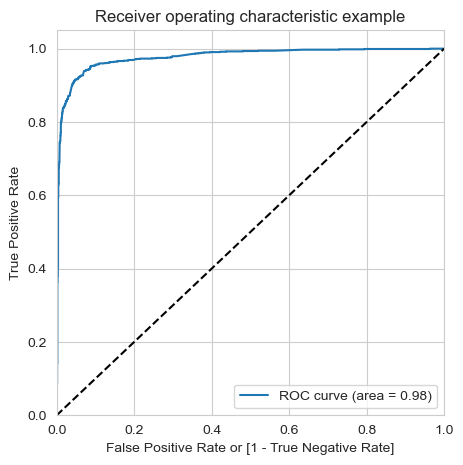

In [159]:
# Invoking the function to draw ROC curve
roc(Y_pred_final['Conv_act'], Y_pred_final['Conv_pred'])

In [160]:
# Classification Record : Precision, Recall and F1 Score
print( metrics.classification_report(Y_pred_final['Conv_act'], Y_pred_final['predn']))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1660
           1       0.91      0.92      0.92      1067

    accuracy                           0.93      2727
   macro avg       0.93      0.93      0.93      2727
weighted avg       0.93      0.93      0.93      2727



In [161]:
# Let's assign Lead_score for the leads in Test Data Set : 
Y_pred_final['lead_score']=(Y_pred_final['Conv_pred']*100).astype("int64")
Y_pred_final.sort_values(by='Conv_pred',ascending=False)

Prospect_IND  Conv_act  Conv_pred  predn  lead_score
1985          2584         1   0.999929      1          99
58            4812         1   0.999929      1          99
484            177         1   0.999928      1          99
33            3615         1   0.999915      1          99
859           7489         1   0.999890      1          99
...            ...       ...        ...    ...         ...
1254          2471         0   0.000235      0           0
2627          2849         0   0.000226      0           0
616            705         0   0.000222      0           0
1037          8012         0   0.000217      0           0
1648          2300         0   0.000212      0           0

[2727 rows x 5 columns]

In [162]:
# checking the data from bottom 
Y_pred_final.tail(5)

Prospect_IND  Conv_act  Conv_pred  predn  lead_score
2722          1939         0   0.281979      0          28
2723          1540         1   0.911695      1          91
2724          5198         1   0.093768      0           9
2725          8660         0   0.011850      0           1
2726          6219         0   0.077372      0           7

Let's use the lead_score column to determine which prospective leads should be given the highest priority. The likelihood that the lead will convert increases with the score. In order to increase the likelihood that people will be contacted further to become potential customers, the score cut-off should be raised if there are few sales professionals available. By altering the cut-off point to a higher value, the model's precision value is increased in the same way.

---------------------------------------------------------------------------------------------------------------------------

# Conclusion

### Model Features 

In [163]:
# Let's look into final model features and coefficients 
pd.options.display.float_format = '{:.2f}'.format
final_parameters = fin.params[1:]
final_parameters.sort_values(ascending = False)

Tags_Lost to EINS                                6.25
Tags_Closed by Horizzon                          5.22
Lead Source_Welingak Website                     4.02
Tags_Will revert after reading the email         2.52
Last Activity_SMS Sent                           1.96
Total Time Spent on Website                      0.87
Last Notable Activity_Modified                  -1.49
Tags_Busy                                       -1.60
Last Activity_Email Bounced                     -1.78
Last Notable Activity_Olark Chat Conversation   -1.88
What is your current occupation_Unknown         -2.77
Tags_Interested in other courses                -4.04
Tags_Other Tags                                 -4.66
Tags_Ringing                                    -5.22
dtype: float64

In [164]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

top_predictors = final_parameters
top_predictors = 100.0 * (top_predictors / top_predictors.max())
top_predictors

Total Time Spent on Website                      13.92
What is your current occupation_Unknown         -44.30
Lead Source_Welingak Website                     64.23
Last Activity_Email Bounced                     -28.45
Last Activity_SMS Sent                           31.37
Last Notable Activity_Modified                  -23.74
Last Notable Activity_Olark Chat Conversation   -30.00
Tags_Busy                                       -25.63
Tags_Closed by Horizzon                          83.45
Tags_Interested in other courses                -64.55
Tags_Lost to EINS                               100.00
Tags_Other Tags                                 -74.52
Tags_Ringing                                    -83.43
Tags_Will revert after reading the email         40.28
dtype: float64

<Figure size 1200x800 with 0 Axes>

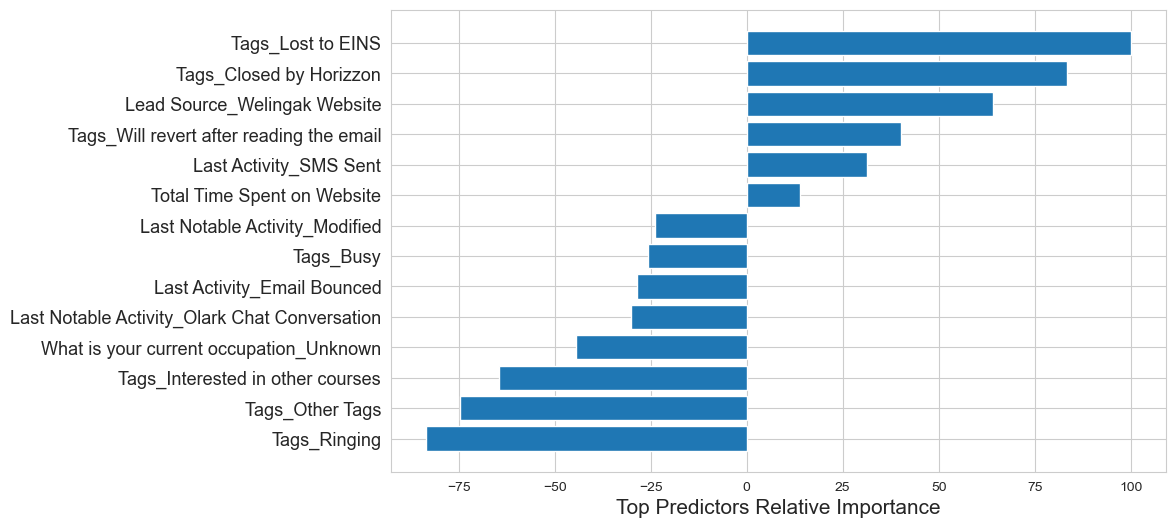

In [165]:
# Plotting the predictors based on their relative importance
top_predictors_sort = np.argsort(top_predictors,kind='quicksort',order='list of str')
fig = plt.figure(figsize = (12,8))
pos = np.arange(top_predictors_sort.shape[0]) + .5

fig1 = plt.figure(figsize=(10,6))
ax = fig1.add_subplot(1, 1, 1)
ax.barh(pos, top_predictors[top_predictors_sort])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[rc1].columns)[top_predictors_sort], fontsize=13)
ax.set_xlabel('Top Predictors Relative Importance', fontsize=15)
plt.show()

### Model Summary


#### Interpretation Logistic regression model with multiple predictor variables

In general, we can have multiple predictor variables in a logistic regression model as below:

$logit(p) = \log\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1 \cdot X_1 + \ldots + \beta_n \cdot X_n$


Each estimated coefficient, when applied to our example dataset, is the expected change in the log odds of being a potential lead given a unit increase in the related predictor variable while keeping the other predictor variables fixed at a specific value. Each exponentiated coefficient represents a change in probabilities in the multiplicative scale for a unit increase in the relevant predictor variable while holding other variable.

logit(p) = log(p/(1-p)) = (0.87) * Total Time Spent on Website + (-2.77) * What is your current occupation_Unknown + (4.02) * Lead Source_Welingak Website + (-1.78) * Last Activity_Email Bounced + (1.96) * Last Activity_SMS Sent + (-1.49) * Last Notable Activity_Modified + (-1.88) * Last Notable Activity_Olark Chat Conversation + (-1.60) * Tags_Busy + (5.22) * Tags_Closed by Horizzon + (-4.04) * Tags_Interested in other courses + (6.25) * Tags_Lost to EINS + (-4.66) * Tags_Other Tags + (-5.22) * Tags_Ringing + (2.52) * Tags_Will revert after reading the email